# 사용하기 전, 단순하게 한 층으로만 구현했을 경우

In [1]:
sentence = ("if you want to build a ship, don't drum up people together to "
           "collect wood and don't assign them tasks and work, but rather "
           "teach them to long for the endless immensity of the sea")

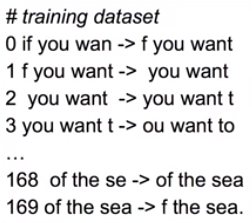

In [2]:
from IPython.display import Image
Image('D:/jupyter/idea.png')

## 1. Making dataset

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

# parameter setting
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10 # Any arbitrary number
batch_size = len(sentence)-sequence_length

x_data = []
y_data = []
for i in range(0, len(sentence)-sequence_length):
    x_str = sentence[i:i+sequence_length]
    y_str = sentence[i+1:i+sequence_length+1]
    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]
    
    x_data.append(x)
    y_data.append(y)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [5]:
np.array(x_data).shape

(169, 10)

## 2. RNN model generation

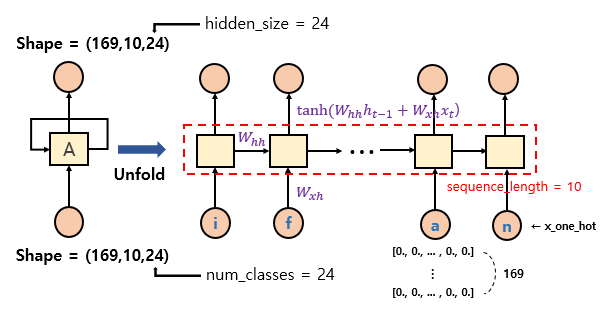

In [6]:
from IPython.display import Image
Image('D:/jupyter/stacked+sotfmax_RNN_fromTensorflow.png')

In [7]:
X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

x_one_hot = keras.utils.to_categorical(x_data, num_classes)

# cell generation
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)

# dynamic function generation
outputs, _states = tf.nn.dynamic_rnn(cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)
weights = tf.ones([batch_size, sequence_length])

# cost function generation
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=0.1).minimize(mean_loss)

# prediction
#prediction = tf.argmax(outputs, axis=1)

W1017 16:34:27.753482 21612 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1017 16:34:27.755392 21612 deprecation.py:323] From <ipython-input-7-933bbb5e47d9>:7: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1017 16:34:27.781360 21612 deprecation.py:323] From <ipython-input-7-933bbb5e47d9>:11: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`,

## 3. Training and print results

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
    _, loss, results = sess.run([train_op, mean_loss, outputs], feed_dict={X:x_data, Y:y_data})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1) #result.shape = {10,24}
        print(i, j, ''.join([char_set[t] for t in index]), loss)

0 0 esggmgggmm 3.1754112
0 1 gggggggsmg 3.1754112
0 2 ggmgggsmgg 3.1754112
0 3 grrggsmggg 3.1754112
0 4 irgssmgggm 3.1754112
0 5 hgssmgggmg 3.1754112
0 6 gssmgggmgm 3.1754112
0 7 ssssggmgmm 3.1754112
0 8 omgggkgmmm 3.1754112
0 9 ggggggmmme 3.1754112
0 10 lllegmmmeo 3.1754112
0 11 glmgmmmeoe 3.1754112
0 12 lsgmmmeoeo 3.1754112
0 13 igmmmeoeol 3.1754112
0 14 gmmmeoeolm 3.1754112
0 15 mmaeoeolaa 3.1754112
0 16 hheeeolmae 3.1754112
0 17 eeeeolmaee 3.1754112
0 18 ewwolmdeem 3.1754112
0 19 ggklddeemm 3.1754112
0 20 gdlddemmmg 3.1754112
0 21 odddaemmgm 3.1754112
0 22 gmdeemmgmm 3.1754112
0 23 ddeemmgmm' 3.1754112
0 24 tesnngwm'g 3.1754112
0 25 essngmm'gg 3.1754112
0 26 ,nngmm'ggg 3.1754112
0 27   gim'gggg 3.1754112
0 28 ggkm'ggggg 3.1754112
0 29 gig'gggggg 3.1754112
0 30 im'cgggggg 3.1754112
0 31 g'ggggghgg 3.1754112
0 32 ullggghggw 3.1754112
0 33 llggghggwl 3.1754112
0 34 gggghggwll 3.1754112
0 35 ghhhghwlll 3.1754112
0 36 hhhghwlllm 3.1754112
0 37 hfggwlllmm 3.1754112
0 38 fpgwlllmms 3.1754

1 150 eeeeeeeeee 3.043846
1 151 rtteeeeeee 3.043846
1 152 soeeeeeeee 3.043846
1 153 oeeeeeeeee 3.043846
1 154 eeeeeeeeee 3.043846
1 155 reeeeeeeee 3.043846
1 156 daeeeeeeee 3.043846
1 157 deeeeeeeee 3.043846
1 158 eeeeeeeeee 3.043846
1 159 eeeeeeeeee 3.043846
1 160 ssrteeeeee 3.043846
1 161 srteeeeeee 3.043846
1 162 rteeeeeeee 3.043846
1 163 sseeeeeeee 3.043846
1 164 deeheeeeee 3.043846
1 165 eeheeeeeee 3.043846
1 166 ehheeeeeee 3.043846
1 167 hhheeeeeee 3.043846
1 168 eeeeeeeeee 3.043846
2 0 eeeeeeeeee 2.9576218
2 1 o ooeeeeee 2.9576218
2 2 eooeeeeeee 2.9576218
2 3 ootteeeeee 2.9576218
2 4 ooeeeeeeee 2.9576218
2 5 t eeeeeeee 2.9576218
2 6 e sseeeeee 2.9576218
2 7  ssteeeeee 2.9576218
2 8 ssoeeeeeee 2.9576218
2 9 s eeeeeeee 2.9576218
2 10 eeeeeeeeee 2.9576218
2 11 eeeeeeeeee 2.9576218
2 12 eeeeeeeeee 2.9576218
2 13 oeeeeeeeee 2.9576218
2 14 etteeeeeee 2.9576218
2 15 ttteeeeeee 2.9576218
2 16 teeeeeeeee 2.9576218
2 17 eeeeeeeeee 2.9576218
2 18 eoeeeeeeee 2.9576218
2 19 oeeeeeeeee 2.9576

4 0   t  ttttt 2.848357
4 1 o   tttt   2.848357
4 2    ttttt t 2.848357
4 3 oottttt t  2.848357
4 4 ottttt t   2.848357
4 5 ttttt t  t 2.848357
4 6  o t t  t  2.848357
4 7   t t  t   2.848357
4 8 tt t  t  t 2.848357
4 9   t  tttt  2.848357
4 10 e   ttttt  2.848357
4 11    ttttt t 2.848357
4 12 e ttttt tt 2.848357
4 13 o tttttttt 2.848357
4 14  ttttttttt 2.848357
4 15 tttttttttt 2.848357
4 16 ttttttt tt 2.848357
4 17  e ttt  t  2.848357
4 18 eottt  t   2.848357
4 19 o  t  t  t 2.848357
4 20   t  t  t  2.848357
4 21 tt  t  t   2.848357
4 22    tt t    2.848357
4 23   tt t   t 2.848357
4 24 et  t   t  2.848357
4 25    t   t t 2.848357
4 26 e     t t  2.848357
4 27      t     2.848357
4 28    tt      2.848357
4 29 oo t       2.848357
4 30 o t t    t 2.848357
4 31  t t    tt 2.848357
4 32 t t  tttt  2.848357
4 33 e   tttttt 2.848357
4 34    ttttttp 2.848357
4 35 o  tttttpp 2.848357
4 36   ttttttpt 2.848357
4 37 tttttttttp 2.848357
4 38 etttttttpp 2.848357
4 39  t ttttttp 2.848357
4 40 t ttt

7 47 e          2.7387943
7 48 r          2.7387943
7 49 a          2.7387943
7 50 e          2.7387943
7 51 r          2.7387943
7 52            2.7387943
7 53 r          2.7387943
7 54 e          2.7387943
7 55 e          2.7387943
7 56 r          2.7387943
7 57            2.7387943
7 58 a          2.7387943
7 59 e          2.7387943
7 60 r          2.7387943
7 61 a          2.7387943
7 62 o          2.7387943
7 63 re         2.7387943
7 64 e          2.7387943
7 65 e          2.7387943
7 66 r          2.7387943
7 67 o          2.7387943
7 68 e          2.7387943
7 69 a          2.7387943
7 70 a          2.7387943
7 71 r          2.7387943
7 72 r          2.7387943
7 73 o          2.7387943
7 74 a          2.7387943
7 75 t          2.7387943
7 76            2.7387943
7 77 o          2.7387943
7 78 a          2.7387943
7 79 o          2.7387943
7 80 r          2.7387943
7 81            2.7387943
7 82 t          2.7387943
7 83 e          2.7387943
7 84 a          2.7387943
7 85 t      

9 91 a          2.6590037
9 92            2.6590037
9 93 e          2.6590037
9 94 r          2.6590037
9 95 e          2.6590037
9 96 a          2.6590037
9 97            2.6590037
9 98 t          2.6590037
9 99            2.6590037
9 100 s          2.6590037
9 101            2.6590037
9 102 a          2.6590037
9 103 t          2.6590037
9 104            2.6590037
9 105 o          2.6590037
9 106 aa         2.6590037
9 107 a          2.6590037
9 108 r          2.6590037
9 109            2.6590037
9 110 s          2.6590037
9 111            2.6590037
9 112 a          2.6590037
9 113 t          2.6590037
9 114 t          2.6590037
9 115            2.6590037
9 116 a          2.6590037
9 117            2.6590037
9 118 t          2.6590037
9 119            2.6590037
9 120 e          2.6590037
9 121 r          2.6590037
9 122            2.6590037
9 123 a          2.6590037
9 124            2.6590037
9 125 r          2.6590037
9 126 t          2.6590037
9 127 o          2.6590037
9 128 e   

11 120 e          2.6048172
11 121 r          2.6048172
11 122            2.6048172
11 123 a          2.6048172
11 124            2.6048172
11 125 r          2.6048172
11 126 t          2.6048172
11 127 o          2.6048172
11 128 e          2.6048172
11 129 a          2.6048172
11 130            2.6048172
11 131 e          2.6048172
11 132 r          2.6048172
11 133 e          2.6048172
11 134 a          2.6048172
11 135            2.6048172
11 136 r          2.6048172
11 137 ao         2.6048172
11 138 e          2.6048172
11 139 r          2.6048172
11 140            2.6048172
11 141            2.6048172
11 142 a          2.6048172
11 143            2.6048172
11 144 r          2.6048172
11 145            2.6048172
11 146 a          2.6048172
11 147            2.6048172
11 148 e          2.6048172
11 149 r          2.6048172
11 150 a          2.6048172
11 151 r          2.6048172
11 152            2.6048172
11 153            2.6048172
11 154 e          2.6048172
11 155 r          2.

13 158 a          2.5478492
13 159 t          2.5478492
13 160            2.5478492
13 161            2.5478492
13 162 r          2.5478492
13 163            2.5478492
13 164            2.5478492
13 165 t          2.5478492
13 166            2.5478492
13 167            2.5478492
13 168 a          2.5478492
14 0 t          2.5187302
14 1            2.5187302
14 2 a          2.5187302
14 3            2.5187302
14 4 r          2.5187302
14 5 t a        2.5187302
14 6 aa         2.5187302
14 7 a          2.5187302
14 8 t          2.5187302
14 9            2.5187302
14 10            2.5187302
14 11 a          2.5187302
14 12            2.5187302
14 13 r          2.5187302
14 14 a          2.5187302
14 15 u          2.5187302
14 16 t          2.5187302
14 17 t          2.5187302
14 18 e          2.5187302
14 19            2.5187302
14 20 a          2.5187302
14 21 t          2.5187302
14 22 a          2.5187302
14 23            2.5187302
14 24 e          2.5187302
14 25 t          2.5187302


15 164            2.5018017
15 165 t          2.5018017
15 166            2.5018017
15 167            2.5018017
15 168 a          2.5018017
16 0 t          2.4771214
16 1            2.4771214
16 2 a          2.4771214
16 3            2.4771214
16 4 r          2.4771214
16 5 t          2.4771214
16 6 aa         2.4771214
16 7 a          2.4771214
16 8 t          2.4771214
16 9 t          2.4771214
16 10            2.4771214
16 11 a          2.4771214
16 12            2.4771214
16 13 r          2.4771214
16 14 a          2.4771214
16 15 u          2.4771214
16 16 t          2.4771214
16 17 t          2.4771214
16 18 e          2.4771214
16 19            2.4771214
16 20 a          2.4771214
16 21 t          2.4771214
16 22 a          2.4771214
16 23            2.4771214
16 24 e          2.4771214
16 25 t          2.4771214
16 26 e          2.4771214
16 27            2.4771214
16 28 a          2.4771214
16 29            2.4771214
16 30 r          2.4771214
16 31 t          2.4771214
16 32 

17 150 a          2.4550948
17 151 r          2.4550948
17 152 t          2.4550948
17 153            2.4550948
17 154 e          2.4550948
17 155 r          2.4550948
17 156            2.4550948
17 157            2.4550948
17 158 a          2.4550948
17 159 t          2.4550948
17 160            2.4550948
17 161            2.4550948
17 162 r          2.4550948
17 163 t          2.4550948
17 164            2.4550948
17 165 t          2.4550948
17 166            2.4550948
17 167            2.4550948
17 168 a          2.4550948
18 0 t          2.432369
18 1            2.432369
18 2 a          2.432369
18 3            2.432369
18 4 r          2.432369
18 5 t          2.432369
18 6 aa         2.432369
18 7 a          2.432369
18 8 t          2.432369
18 9 t          2.432369
18 10            2.432369
18 11 a          2.432369
18 12            2.432369
18 13 r          2.432369
18 14 a          2.432369
18 15 u          2.432369
18 16 t          2.432369
18 17 t          2.432369
18 18 e   

20 34 a          2.380253
20 35            2.380253
20 36            2.380253
20 37 t          2.380253
20 38            2.380253
20 39 a          2.380253
20 40 t          2.380253
20 41 e          2.380253
20 42 a          2.380253
20 43 e          2.380253
20 44 r          2.380253
20 45 r          2.380253
20 46 e          2.380253
20 47 e          2.380253
20 48 r          2.380253
20 49 a          2.380253
20 50            2.380253
20 51 r          2.380253
20 52            2.380253
20 53 r          2.380253
20 54            2.380253
20 55 e          2.380253
20 56 r          2.380253
20 57            2.380253
20 58 a          2.380253
20 59            2.380253
20 60 r          2.380253
20 61 ao         2.380253
20 62 o          2.380253
20 63 r          2.380253
20 64 e          2.380253
20 65 e          2.380253
20 66 r          2.380253
20 67 o          2.380253
20 68            2.380253
20 69 ao         2.380253
20 70 a          2.380253
20 71 r          2.380253
20 72 r     

23 59            2.319916
23 60 r          2.319916
23 61 ao         2.319916
23 62 o          2.319916
23 63 r          2.319916
23 64 e          2.319916
23 65 e          2.319916
23 66 r          2.319916
23 67 o          2.319916
23 68            2.319916
23 69 ao         2.319916
23 70 a          2.319916
23 71 r          2.319916
23 72 r          2.319916
23 73            2.319916
23 74 a          2.319916
23 75 s          2.319916
23 76 t          2.319916
23 77            2.319916
23 78 ao         2.319916
23 79            2.319916
23 80 r          2.319916
23 81 t          2.319916
23 82 t          2.319916
23 83            2.319916
23 84 a          2.319916
23 85 s          2.319916
23 86            2.319916
23 87            2.319916
23 88 t          2.319916
23 89            2.319916
23 90 t          2.319916
23 91 ao         2.319916
23 92            2.319916
23 93 e          2.319916
23 94 r          2.319916
23 95 e          2.319916
23 96 ao         2.319916
23 97       

25 148 e          2.2934875
25 149 r          2.2934875
25 150 t          2.2934875
25 151 r          2.2934875
25 152 t          2.2934875
25 153            2.2934875
25 154 e          2.2934875
25 155 r          2.2934875
25 156            2.2934875
25 157            2.2934875
25 158 t          2.2934875
25 159 t          2.2934875
25 160 e          2.2934875
25 161 e          2.2934875
25 162 r          2.2934875
25 163 t          2.2934875
25 164            2.2934875
25 165 t          2.2934875
25 166            2.2934875
25 167            2.2934875
25 168 t          2.2934875
26 0 t          2.271943
26 1 o          2.271943
26 2 to         2.271943
26 3            2.271943
26 4 n          2.271943
26 5 t          2.271943
26 6 to         2.271943
26 7 a          2.271943
26 8 s          2.271943
26 9 t          2.271943
26 10            2.271943
26 11 to         2.271943
26 12            2.271943
26 13 n          2.271943
26 14 t          2.271943
26 15 u          2.271943
26 16 

27 156            2.2629917
27 157            2.2629917
27 158 t          2.2629917
27 159 t          2.2629917
27 160 e          2.2629917
27 161 e          2.2629917
27 162 r          2.2629917
27 163 t          2.2629917
27 164            2.2629917
27 165 t          2.2629917
27 166            2.2629917
27 167            2.2629917
27 168 t          2.2629917
28 0 t          2.2460804
28 1 o          2.2460804
28 2 to         2.2460804
28 3            2.2460804
28 4 n          2.2460804
28 5 t          2.2460804
28 6 to         2.2460804
28 7 a          2.2460804
28 8 s          2.2460804
28 9 t          2.2460804
28 10 h          2.2460804
28 11 to         2.2460804
28 12 h          2.2460804
28 13 n          2.2460804
28 14 t          2.2460804
28 15 ut         2.2460804
28 16 t          2.2460804
28 17 t          2.2460804
28 18 e          2.2460804
28 19            2.2460804
28 20 t          2.2460804
28 21 s          2.2460804
28 22 t          2.2460804
28 23            2.246080

30 0 t          2.2187142
30 1 o          2.2187142
30 2 to         2.2187142
30 3            2.2187142
30 4 n          2.2187142
30 5 t          2.2187142
30 6 to         2.2187142
30 7 an         2.2187142
30 8 s          2.2187142
30 9 d          2.2187142
30 10 h          2.2187142
30 11 to         2.2187142
30 12 h          2.2187142
30 13 n          2.2187142
30 14 t          2.2187142
30 15 ut         2.2187142
30 16 t          2.2187142
30 17 t          2.2187142
30 18 e          2.2187142
30 19            2.2187142
30 20 t          2.2187142
30 21 s          2.2187142
30 22 t          2.2187142
30 23            2.2187142
30 24 e          2.2187142
30 25 t          2.2187142
30 26 e          2.2187142
30 27            2.2187142
30 28 to         2.2187142
30 29            2.2187142
30 30 n          2.2187142
30 31 d          2.2187142
30 32 t          2.2187142
30 33 h          2.2187142
30 34 to      p  2.2187142
30 35            2.2187142
30 36            2.2187142
30 37 t    

32 31 d          2.1949625
32 32 t          2.1949625
32 33 h          2.1949625
32 34 to         2.1949625
32 35            2.1949625
32 36            2.1949625
32 37 t          2.1949625
32 38 e          2.1949625
32 39 t          2.1949625
32 40 t          2.1949625
32 41 e          2.1949625
32 42 t          2.1949625
32 43 e          2.1949625
32 44 r          2.1949625
32 45 n          2.1949625
32 46 e          2.1949625
32 47 e          2.1949625
32 48 r          2.1949625
32 49 to         2.1949625
32 50 h          2.1949625
32 51 n          2.1949625
32 52 e          2.1949625
32 53 r          2.1949625
32 54 h          2.1949625
32 55 e          2.1949625
32 56 r          2.1949625
32 57            2.1949625
32 58 to         2.1949625
32 59 h          2.1949625
32 60 n          2.1949625
32 61 to         2.1949625
32 62 t          2.1949625
32 63 n          2.1949625
32 64 e          2.1949625
32 65 e          2.1949625
32 66 r          2.1949625
32 67 t          2.1949625
3

34 5 t          2.178077
34 6 to         2.178077
34 7 an         2.178077
34 8 s          2.178077
34 9 d          2.178077
34 10 h          2.178077
34 11 to         2.178077
34 12 h          2.178077
34 13 n          2.178077
34 14 t          2.178077
34 15 ut         2.178077
34 16 t          2.178077
34 17 t          2.178077
34 18 e          2.178077
34 19            2.178077
34 20 t          2.178077
34 21 s          2.178077
34 22 t          2.178077
34 23 s          2.178077
34 24 e          2.178077
34 25 t          2.178077
34 26 e          2.178077
34 27            2.178077
34 28 to         2.178077
34 29            2.178077
34 30 n          2.178077
34 31 d          2.178077
34 32 t          2.178077
34 33 h          2.178077
34 34 to         2.178077
34 35            2.178077
34 36            2.178077
34 37 t          2.178077
34 38 e          2.178077
34 39 t          2.178077
34 40 t          2.178077
34 41 e          2.178077
34 42 t          2.178077
34 43 e          

37 153            2.1602283
37 154 e          2.1602283
37 155 r          2.1602283
37 156 s          2.1602283
37 157 s          2.1602283
37 158 t          2.1602283
37 159 t          2.1602283
37 160 e          2.1602283
37 161 e          2.1602283
37 162 r          2.1602283
37 163 d          2.1602283
37 164 s          2.1602283
37 165 t          2.1602283
37 166 h          2.1602283
37 167            2.1602283
37 168 to         2.1602283
38 0 t          2.1540713
38 1 o          2.1540713
38 2 to         2.1540713
38 3            2.1540713
38 4 n          2.1540713
38 5 t          2.1540713
38 6 to         2.1540713
38 7 an         2.1540713
38 8 t          2.1540713
38 9 d          2.1540713
38 10 h          2.1540713
38 11 to         2.1540713
38 12 h          2.1540713
38 13 n          2.1540713
38 14 t          2.1540713
38 15 ut         2.1540713
38 16 t          2.1540713
38 17 t          2.1540713
38 18 e          2.1540713
38 19            2.1540713
38 20 t          2.154

41 88 t          2.1360326
41 89 e          2.1360326
41 90 d          2.1360326
41 91 to         2.1360326
41 92 h          2.1360326
41 93 e          2.1360326
41 94 r          2.1360326
41 95 e          2.1360326
41 96 to         2.1360326
41 97 h          2.1360326
41 98 t          2.1360326
41 99 s          2.1360326
41 100 s          2.1360326
41 101 s          2.1360326
41 102 t          2.1360326
41 103 t          2.1360326
41 104 d          2.1360326
41 105   o        2.1360326
41 106 to         2.1360326
41 107 a          2.1360326
41 108 n          2.1360326
41 109            2.1360326
41 110 s          2.1360326
41 111            2.1360326
41 112 t          2.1360326
41 113 ut         2.1360326
41 114 t          2.1360326
41 115 h          2.1360326
41 116 t          2.1360326
41 117            2.1360326
41 118 th         2.1360326
41 119 h          2.1360326
41 120 e          2.1360326
41 121 r          2.1360326
41 122            2.1360326
41 123 to         2.1360326
41 1

43 92 h          2.1276796
43 93 e          2.1276796
43 94 r          2.1276796
43 95 e          2.1276796
43 96 to         2.1276796
43 97 h          2.1276796
43 98 t          2.1276796
43 99 s          2.1276796
43 100 s          2.1276796
43 101 s          2.1276796
43 102 t          2.1276796
43 103 t          2.1276796
43 104 d          2.1276796
43 105   o        2.1276796
43 106 to         2.1276796
43 107 a          2.1276796
43 108 n          2.1276796
43 109            2.1276796
43 110 s          2.1276796
43 111            2.1276796
43 112 t          2.1276796
43 113 ut         2.1276796
43 114 t          2.1276796
43 115 h          2.1276796
43 116 t          2.1276796
43 117            2.1276796
43 118 th         2.1276796
43 119 h          2.1276796
43 120 e          2.1276796
43 121 r          2.1276796
43 122            2.1276796
43 123 to         2.1276796
43 124 h          2.1276796
43 125 r          2.1276796
43 126 th         2.1276796
43 127 t          2.1276796


45 69 to         2.1195498
45 70 a          2.1195498
45 71 n          2.1195498
45 72 n          2.1195498
45 73            2.1195498
45 74 t          2.1195498
45 75 t          2.1195498
45 76 d          2.1195498
45 77            2.1195498
45 78 to         2.1195498
45 79            2.1195498
45 80 n          2.1195498
45 81 d          2.1195498
45 82 t          2.1195498
45 83 h          2.1195498
45 84 t          2.1195498
45 85 t          2.1195498
45 86 s          2.1195498
45 87 s          2.1195498
45 88 t          2.1195498
45 89 e          2.1195498
45 90 d          2.1195498
45 91 to         2.1195498
45 92 h          2.1195498
45 93 e          2.1195498
45 94 r          2.1195498
45 95 e          2.1195498
45 96 to         2.1195498
45 97 h          2.1195498
45 98 t          2.1195498
45 99 s          2.1195498
45 100 s          2.1195498
45 101 s          2.1195498
45 102 t          2.1195498
45 103 t          2.1195498
45 104 d          2.1195498
45 105   o        2.119

47 67 t          2.1115425
47 68 h          2.1115425
47 69 to         2.1115425
47 70 a          2.1115425
47 71 n          2.1115425
47 72 n          2.1115425
47 73            2.1115425
47 74 t          2.1115425
47 75 t          2.1115425
47 76 d          2.1115425
47 77            2.1115425
47 78 to         2.1115425
47 79            2.1115425
47 80 n          2.1115425
47 81 d          2.1115425
47 82 t          2.1115425
47 83 h          2.1115425
47 84 t          2.1115425
47 85 t          2.1115425
47 86 s          2.1115425
47 87 s          2.1115425
47 88 t          2.1115425
47 89 e          2.1115425
47 90 d          2.1115425
47 91 to         2.1115425
47 92 h          2.1115425
47 93 e          2.1115425
47 94 r          2.1115425
47 95 e          2.1115425
47 96 to         2.1115425
47 97 h          2.1115425
47 98 t          2.1115425
47 99 s          2.1115425
47 100 s          2.1115425
47 101 s          2.1115425
47 102 t          2.1115425
47 103 t          2.11154

49 53 r          2.10556
49 54 h          2.10556
49 55 e          2.10556
49 56 r          2.10556
49 57            2.10556
49 58 to         2.10556
49 59 h          2.10556
49 60 n          2.10556
49 61 to         2.10556
49 62 t          2.10556
49 63 n          2.10556
49 64 e          2.10556
49 65 e          2.10556
49 66 r          2.10556
49 67 t          2.10556
49 68 h          2.10556
49 69 to         2.10556
49 70 ao         2.10556
49 71 n          2.10556
49 72 n          2.10556
49 73            2.10556
49 74 t          2.10556
49 75 t          2.10556
49 76 d          2.10556
49 77            2.10556
49 78 to         2.10556
49 79            2.10556
49 80 n          2.10556
49 81 d          2.10556
49 82 t          2.10556
49 83 h          2.10556
49 84 t          2.10556
49 85 ts         2.10556
49 86 s          2.10556
49 87 s          2.10556
49 88 t          2.10556
49 89 e          2.10556
49 90 d          2.10556
49 91 to         2.10556
49 92 h          2.10556


51 83 h          2.098709
51 84 t          2.098709
51 85 ts         2.098709
51 86 s          2.098709
51 87 s          2.098709
51 88 t          2.098709
51 89 e          2.098709
51 90 d          2.098709
51 91 to         2.098709
51 92 h          2.098709
51 93 e          2.098709
51 94 r          2.098709
51 95 e          2.098709
51 96 to         2.098709
51 97 h          2.098709
51 98 ts         2.098709
51 99 s          2.098709
51 100 s          2.098709
51 101 s          2.098709
51 102 t          2.098709
51 103 t          2.098709
51 104 d          2.098709
51 105   o        2.098709
51 106 to         2.098709
51 107 an         2.098709
51 108 n          2.098709
51 109            2.098709
51 110 s          2.098709
51 111            2.098709
51 112 t          2.098709
51 113 ut         2.098709
51 114            2.098709
51 115 h          2.098709
51 116 t          2.098709
51 117            2.098709
51 118 th         2.098709
51 119 h          2.098709
51 120 e          

55 61 to         2.0873685
55 62 tl         2.0873685
55 63 n          2.0873685
55 64 e          2.0873685
55 65 e          2.0873685
55 66 r          2.0873685
55 67 t          2.0873685
55 68 h          2.0873685
55 69 to         2.0873685
55 70 an         2.0873685
55 71 n          2.0873685
55 72 n          2.0873685
55 73            2.0873685
55 74 t          2.0873685
55 75 t          2.0873685
55 76 d          2.0873685
55 77            2.0873685
55 78 to         2.0873685
55 79            2.0873685
55 80 n          2.0873685
55 81 d          2.0873685
55 82 t          2.0873685
55 83 h          2.0873685
55 84 t          2.0873685
55 85 ts         2.0873685
55 86 s          2.0873685
55 87 s          2.0873685
55 88 t          2.0873685
55 89 e          2.0873685
55 90 d          2.0873685
55 91 to         2.0873685
55 92 h          2.0873685
55 93 e          2.0873685
55 94 r          2.0873685
55 95 e          2.0873685
55 96 to         2.0873685
55 97 h          2.0873685
5

57 84 t          2.082071
57 85 ts         2.082071
57 86 s          2.082071
57 87 s          2.082071
57 88 t          2.082071
57 89 e          2.082071
57 90 d          2.082071
57 91 to         2.082071
57 92 h          2.082071
57 93 e          2.082071
57 94 r          2.082071
57 95 e          2.082071
57 96 to         2.082071
57 97 h          2.082071
57 98 ts         2.082071
57 99 s          2.082071
57 100 s          2.082071
57 101 s          2.082071
57 102 t          2.082071
57 103 t          2.082071
57 104 d          2.082071
57 105   o        2.082071
57 106 to         2.082071
57 107 ao         2.082071
57 108 n          2.082071
57 109            2.082071
57 110 s          2.082071
57 111            2.082071
57 112 t          2.082071
57 113 ut         2.082071
57 114            2.082071
57 115 h          2.082071
57 116 t          2.082071
57 117            2.082071
57 118 th         2.082071
57 119 h          2.082071
57 120 e          2.082071
57 121 r         

59 55 e          2.0793343
59 56 r          2.0793343
59 57            2.0793343
59 58 to         2.0793343
59 59 h          2.0793343
59 60 n          2.0793343
59 61 to         2.0793343
59 62 tl         2.0793343
59 63 n          2.0793343
59 64 e          2.0793343
59 65 e          2.0793343
59 66 r          2.0793343
59 67 t          2.0793343
59 68 h          2.0793343
59 69 to         2.0793343
59 70 ao         2.0793343
59 71 n          2.0793343
59 72 n          2.0793343
59 73            2.0793343
59 74 t          2.0793343
59 75 t          2.0793343
59 76 d          2.0793343
59 77            2.0793343
59 78 to         2.0793343
59 79            2.0793343
59 80 n          2.0793343
59 81 d          2.0793343
59 82 t          2.0793343
59 83 h          2.0793343
59 84 t          2.0793343
59 85 ts         2.0793343
59 86 s          2.0793343
59 87 s          2.0793343
59 88 t          2.0793343
59 89 e          2.0793343
59 90 d          2.0793343
59 91 to         2.0793343
5

61 63 n          2.0736282
61 64 ee         2.0736282
61 65 e          2.0736282
61 66 m          2.0736282
61 67 t          2.0736282
61 68 h          2.0736282
61 69 to         2.0736282
61 70 ao         2.0736282
61 71 n          2.0736282
61 72 n          2.0736282
61 73            2.0736282
61 74 t          2.0736282
61 75 t          2.0736282
61 76 d          2.0736282
61 77            2.0736282
61 78 to         2.0736282
61 79            2.0736282
61 80 n          2.0736282
61 81 d          2.0736282
61 82 t          2.0736282
61 83 h          2.0736282
61 84 t          2.0736282
61 85 ts         2.0736282
61 86 s          2.0736282
61 87 s          2.0736282
61 88 t          2.0736282
61 89 e          2.0736282
61 90 d          2.0736282
61 91 to         2.0736282
61 92 h          2.0736282
61 93 e          2.0736282
61 94 m          2.0736282
61 95 e          2.0736282
61 96 to         2.0736282
61 97 h          2.0736282
61 98 ts         2.0736282
61 99 s          2.0736282
6

63 80 n          2.088587
63 81 d          2.088587
63 82 t          2.088587
63 83 h          2.088587
63 84 t          2.088587
63 85 ss         2.088587
63 86 s          2.088587
63 87 s          2.088587
63 88 t          2.088587
63 89 e          2.088587
63 90 d          2.088587
63 91 to         2.088587
63 92 h          2.088587
63 93 e          2.088587
63 94 m          2.088587
63 95 e          2.088587
63 96 to         2.088587
63 97 h          2.088587
63 98 ss         2.088587
63 99 s          2.088587
63 100 s          2.088587
63 101 s          2.088587
63 102 t          2.088587
63 103 s          2.088587
63 104 d          2.088587
63 105   o        2.088587
63 106 to         2.088587
63 107 ao         2.088587
63 108 n          2.088587
63 109            2.088587
63 110 s          2.088587
63 111            2.088587
63 112 t          2.088587
63 113 ut         2.088587
63 114            2.088587
63 115 h          2.088587
63 116 ta         2.088587
63 117            2.0

65 71 n          2.0862741
65 72 n          2.0862741
65 73            2.0862741
65 74 tt         2.0862741
65 75 s          2.0862741
65 76 d          2.0862741
65 77            2.0862741
65 78 to         2.0862741
65 79            2.0862741
65 80 n          2.0862741
65 81 d          2.0862741
65 82 t          2.0862741
65 83 h          2.0862741
65 84 tt         2.0862741
65 85 ss         2.0862741
65 86 s          2.0862741
65 87 s          2.0862741
65 88 t          2.0862741
65 89 e          2.0862741
65 90 d          2.0862741
65 91 to         2.0862741
65 92 h          2.0862741
65 93 e          2.0862741
65 94 m          2.0862741
65 95 e          2.0862741
65 96 to         2.0862741
65 97 h          2.0862741
65 98 ss         2.0862741
65 99 s          2.0862741
65 100 s          2.0862741
65 101 s          2.0862741
65 102 tt         2.0862741
65 103 s          2.0862741
65 104 d          2.0862741
65 105   o        2.0862741
65 106 to         2.0862741
65 107 an         2.0

67 64 ee         2.0822957
67 65 e          2.0822957
67 66 m          2.0822957
67 67 t          2.0822957
67 68 h          2.0822957
67 69 to         2.0822957
67 70 an         2.0822957
67 71 n          2.0822957
67 72 n          2.0822957
67 73            2.0822957
67 74 tt         2.0822957
67 75 s          2.0822957
67 76 d          2.0822957
67 77            2.0822957
67 78 to         2.0822957
67 79            2.0822957
67 80 n          2.0822957
67 81 d          2.0822957
67 82 t          2.0822957
67 83 h          2.0822957
67 84 tt         2.0822957
67 85 ss         2.0822957
67 86 s          2.0822957
67 87 s          2.0822957
67 88 t          2.0822957
67 89 e          2.0822957
67 90 d          2.0822957
67 91 to         2.0822957
67 92 h          2.0822957
67 93 e          2.0822957
67 94 m          2.0822957
67 95 e          2.0822957
67 96 to         2.0822957
67 97 h          2.0822957
67 98 ss         2.0822957
67 99 s          2.0822957
67 100 s          2.0822957


69 46 l          2.069473
69 47 e          2.069473
69 48 m          2.069473
69 49 to         2.069473
69 50 h          2.069473
69 51 n          2.069473
69 52 e          2.069473
69 53 m          2.069473
69 54 h          2.069473
69 55 e          2.069473
69 56 m          2.069473
69 57            2.069473
69 58 to         2.069473
69 59 h          2.069473
69 60 n          2.069473
69 61 to         2.069473
69 62 tl         2.069473
69 63 n          2.069473
69 64 ee         2.069473
69 65 e          2.069473
69 66 m          2.069473
69 67 t          2.069473
69 68 h          2.069473
69 69 to         2.069473
69 70 an         2.069473
69 71 n          2.069473
69 72 n          2.069473
69 73            2.069473
69 74 t          2.069473
69 75 s          2.069473
69 76 d          2.069473
69 77            2.069473
69 78 to         2.069473
69 79            2.069473
69 80 n          2.069473
69 81 d          2.069473
69 82 t          2.069473
69 83 h          2.069473
69 84 t     

71 66 m          2.0644925
71 67 t          2.0644925
71 68 h          2.0644925
71 69 to         2.0644925
71 70 an         2.0644925
71 71 n          2.0644925
71 72 n          2.0644925
71 73            2.0644925
71 74 t          2.0644925
71 75 s          2.0644925
71 76 d          2.0644925
71 77            2.0644925
71 78 to         2.0644925
71 79            2.0644925
71 80 n          2.0644925
71 81 d          2.0644925
71 82 t          2.0644925
71 83 h          2.0644925
71 84 t          2.0644925
71 85 ss         2.0644925
71 86 s          2.0644925
71 87 s          2.0644925
71 88 t          2.0644925
71 89 e          2.0644925
71 90 d          2.0644925
71 91 to         2.0644925
71 92 h          2.0644925
71 93 e          2.0644925
71 94 m          2.0644925
71 95 e          2.0644925
71 96 to         2.0644925
71 97 h          2.0644925
71 98 ss         2.0644925
71 99 s          2.0644925
71 100 s          2.0644925
71 101 s          2.0644925
71 102 t          2.064492

73 117            2.0624664
73 118 sh         2.0624664
73 119 h          2.0624664
73 120 e          2.0624664
73 121 m          2.0624664
73 122            2.0624664
73 123 toa        2.0624664
73 124 h          2.0624664
73 125 m          2.0624664
73 126 sh         2.0624664
73 127 t          2.0624664
73 128 e          2.0624664
73 129 to         2.0624664
73 130 h          2.0624664
73 131 e          2.0624664
73 132 m          2.0624664
73 133 e          2.0624664
73 134 to         2.0624664
73 135 h          2.0624664
73 136 n          2.0624664
73 137 to         2.0624664
73 138 e          2.0624664
73 139 n          2.0624664
73 140 d t        2.0624664
73 141 e          2.0624664
73 142 to         2.0624664
73 143 o          2.0624664
73 144 n          2.0624664
73 145            2.0624664
73 146 to         2.0624664
73 147 h          2.0624664
73 148 e          2.0624664
73 149 m          2.0624664
73 150 to         2.0624664
73 151 m          2.0624664
73 152 d          2.

77 106 to         2.0530915
77 107 ao         2.0530915
77 108 n          2.0530915
77 109            2.0530915
77 110 s          2.0530915
77 111            2.0530915
77 112 t          2.0530915
77 113 ut         2.0530915
77 114            2.0530915
77 115 h          2.0530915
77 116 t t        2.0530915
77 117            2.0530915
77 118 sh         2.0530915
77 119 h          2.0530915
77 120 e          2.0530915
77 121 m          2.0530915
77 122            2.0530915
77 123 toa        2.0530915
77 124 h          2.0530915
77 125 m          2.0530915
77 126 sh         2.0530915
77 127 t          2.0530915
77 128 e          2.0530915
77 129 to         2.0530915
77 130 h          2.0530915
77 131 e          2.0530915
77 132 m          2.0530915
77 133 e          2.0530915
77 134 to         2.0530915
77 135 h          2.0530915
77 136 n          2.0530915
77 137 to         2.0530915
77 138 e          2.0530915
77 139 n          2.0530915
77 140 d t        2.0530915
77 141 e          2.

80 0 t          2.0495207
80 1 o     o    2.0495207
80 2 to   o     2.0495207
80 3 o          2.0495207
80 4 n          2.0495207
80 5            2.0495207
80 6 to         2.0495207
80 7 an         2.0495207
80 8 s          2.0495207
80 9 d          2.0495207
80 10 h          2.0495207
80 11 to         2.0495207
80 12 h          2.0495207
80 13 n          2.0495207
80 14 t          2.0495207
80 15 ut         2.0495207
80 16            2.0495207
80 17 t          2.0495207
80 18 e          2.0495207
80 19            2.0495207
80 20 t          2.0495207
80 21 s          2.0495207
80 22 t          2.0495207
80 23 s          2.0495207
80 24 e          2.0495207
80 25 t          2.0495207
80 26 l          2.0495207
80 27            2.0495207
80 28 to         2.0495207
80 29            2.0495207
80 30 n          2.0495207
80 31 d          2.0495207
80 32 t          2.0495207
80 33 h          2.0495207
80 34 to         2.0495207
80 35            2.0495207
80 36            2.0495207
80 37      

82 46 l          2.0471592
82 47 e          2.0471592
82 48 m          2.0471592
82 49 to         2.0471592
82 50 h          2.0471592
82 51 n          2.0471592
82 52 e          2.0471592
82 53 m          2.0471592
82 54 h          2.0471592
82 55 e          2.0471592
82 56 m          2.0471592
82 57            2.0471592
82 58 to         2.0471592
82 59 h          2.0471592
82 60 n          2.0471592
82 61 to         2.0471592
82 62 t          2.0471592
82 63 n          2.0471592
82 64 ee         2.0471592
82 65 e          2.0471592
82 66 m          2.0471592
82 67 t          2.0471592
82 68 h          2.0471592
82 69 to         2.0471592
82 70 aod        2.0471592
82 71 n          2.0471592
82 72 n          2.0471592
82 73            2.0471592
82 74 t          2.0471592
82 75 s          2.0471592
82 76 d          2.0471592
82 77            2.0471592
82 78 to         2.0471592
82 79            2.0471592
82 80 n          2.0471592
82 81 d          2.0471592
82 82 t          2.0471592
8

84 118 sh         2.044144
84 119 h          2.044144
84 120 e          2.044144
84 121 m          2.044144
84 122            2.044144
84 123 toa        2.044144
84 124 h          2.044144
84 125 m          2.044144
84 126 sh         2.044144
84 127 t          2.044144
84 128 e          2.044144
84 129 to         2.044144
84 130 h          2.044144
84 131 e          2.044144
84 132 m          2.044144
84 133 e          2.044144
84 134 to         2.044144
84 135 h          2.044144
84 136 n          2.044144
84 137 to         2.044144
84 138 e          2.044144
84 139 n          2.044144
84 140 d t        2.044144
84 141 et         2.044144
84 142 to         2.044144
84 143 o          2.044144
84 144 n          2.044144
84 145            2.044144
84 146 to         2.044144
84 147 h          2.044144
84 148 e          2.044144
84 149 m          2.044144
84 150 to         2.044144
84 151 m          2.044144
84 152 d          2.044144
84 153            2.044144
84 154 e          2.044144
8

87 82 t          2.0406418
87 83 h          2.0406418
87 84 t          2.0406418
87 85 ss         2.0406418
87 86 s          2.0406418
87 87 s          2.0406418
87 88 t          2.0406418
87 89 e          2.0406418
87 90 d          2.0406418
87 91 to         2.0406418
87 92 h          2.0406418
87 93 e          2.0406418
87 94 m          2.0406418
87 95 e          2.0406418
87 96 to         2.0406418
87 97 h          2.0406418
87 98 ss         2.0406418
87 99 ss         2.0406418
87 100 s          2.0406418
87 101 s          2.0406418
87 102 t          2.0406418
87 103 s          2.0406418
87 104 d          2.0406418
87 105   o        2.0406418
87 106 to         2.0406418
87 107 ao         2.0406418
87 108 n          2.0406418
87 109            2.0406418
87 110 s          2.0406418
87 111            2.0406418
87 112 tu         2.0406418
87 113 ut         2.0406418
87 114            2.0406418
87 115 h          2.0406418
87 116 tat        2.0406418
87 117            2.0406418
87 118 sh 

89 69 to         2.038188
89 70 aod        2.038188
89 71 n          2.038188
89 72 n          2.038188
89 73            2.038188
89 74 t          2.038188
89 75 s          2.038188
89 76 d          2.038188
89 77            2.038188
89 78 to         2.038188
89 79            2.038188
89 80 n          2.038188
89 81 d          2.038188
89 82 t          2.038188
89 83 h          2.038188
89 84 t          2.038188
89 85 ss         2.038188
89 86 s          2.038188
89 87 s          2.038188
89 88 t          2.038188
89 89 e          2.038188
89 90 d          2.038188
89 91 to         2.038188
89 92 h          2.038188
89 93 e          2.038188
89 94 m          2.038188
89 95 e          2.038188
89 96 to         2.038188
89 97 h          2.038188
89 98 ss         2.038188
89 99 ss         2.038188
89 100 s          2.038188
89 101 s          2.038188
89 102 t          2.038188
89 103 s          2.038188
89 104 d          2.038188
89 105   o        2.038188
89 106 to         2.038188
89 10

91 51 n          2.0362418
91 52 e          2.0362418
91 53 m          2.0362418
91 54 h          2.0362418
91 55 e          2.0362418
91 56 m          2.0362418
91 57            2.0362418
91 58 to         2.0362418
91 59 h          2.0362418
91 60 n          2.0362418
91 61 to         2.0362418
91 62 t          2.0362418
91 63 n          2.0362418
91 64 ee         2.0362418
91 65 e    o     2.0362418
91 66 m          2.0362418
91 67 t          2.0362418
91 68 h          2.0362418
91 69 to         2.0362418
91 70 aod        2.0362418
91 71 n          2.0362418
91 72 n          2.0362418
91 73            2.0362418
91 74 t          2.0362418
91 75 s          2.0362418
91 76 d          2.0362418
91 77            2.0362418
91 78 to         2.0362418
91 79            2.0362418
91 80 n          2.0362418
91 81 d          2.0362418
91 82 t          2.0362418
91 83 h          2.0362418
91 84 t          2.0362418
91 85 ss         2.0362418
91 86 s          2.0362418
91 87 s          2.0362418
9

93 58 to         2.0343943
93 59 h          2.0343943
93 60 n          2.0343943
93 61 to         2.0343943
93 62 t          2.0343943
93 63 n          2.0343943
93 64 ee         2.0343943
93 65 e    o     2.0343943
93 66 m          2.0343943
93 67 t          2.0343943
93 68 h          2.0343943
93 69 to         2.0343943
93 70 aod        2.0343943
93 71 n          2.0343943
93 72 n          2.0343943
93 73            2.0343943
93 74 t          2.0343943
93 75 s          2.0343943
93 76 d          2.0343943
93 77            2.0343943
93 78 to         2.0343943
93 79            2.0343943
93 80 n          2.0343943
93 81 d          2.0343943
93 82 t          2.0343943
93 83 h          2.0343943
93 84 t          2.0343943
93 85 ss         2.0343943
93 86 s          2.0343943
93 87 s          2.0343943
93 88 t          2.0343943
93 89 e          2.0343943
93 90 d          2.0343943
93 91 to         2.0343943
93 92 h          2.0343943
93 93 e          2.0343943
93 94 m          2.0343943
9

95 72 n          2.0323532
95 73            2.0323532
95 74 t          2.0323532
95 75 s          2.0323532
95 76 d          2.0323532
95 77            2.0323532
95 78 to         2.0323532
95 79            2.0323532
95 80 n          2.0323532
95 81 d          2.0323532
95 82 t          2.0323532
95 83 h          2.0323532
95 84 t          2.0323532
95 85 ss         2.0323532
95 86 s          2.0323532
95 87 s          2.0323532
95 88 t          2.0323532
95 89 e          2.0323532
95 90 d          2.0323532
95 91 to         2.0323532
95 92 h          2.0323532
95 93 e          2.0323532
95 94 m          2.0323532
95 95 e          2.0323532
95 96 to         2.0323532
95 97 h          2.0323532
95 98 ss         2.0323532
95 99 ss         2.0323532
95 100 s          2.0323532
95 101 s          2.0323532
95 102 t          2.0323532
95 103 s          2.0323532
95 104 d          2.0323532
95 105   o        2.0323532
95 106 to         2.0323532
95 107 ao         2.0323532
95 108 n          2.

97 91 to         2.0305362
97 92 h          2.0305362
97 93 e          2.0305362
97 94 m          2.0305362
97 95 e          2.0305362
97 96 to         2.0305362
97 97 h          2.0305362
97 98 ss         2.0305362
97 99 ss         2.0305362
97 100 s          2.0305362
97 101 s          2.0305362
97 102 t          2.0305362
97 103 s          2.0305362
97 104 d          2.0305362
97 105   o        2.0305362
97 106 to         2.0305362
97 107 ao         2.0305362
97 108 n          2.0305362
97 109            2.0305362
97 110 s          2.0305362
97 111            2.0305362
97 112 tu         2.0305362
97 113 ut         2.0305362
97 114            2.0305362
97 115 h          2.0305362
97 116 tat        2.0305362
97 117            2.0305362
97 118 sh         2.0305362
97 119 h          2.0305362
97 120 e          2.0305362
97 121 m          2.0305362
97 122            2.0305362
97 123 toa        2.0305362
97 124 h          2.0305362
97 125 m          2.0305362
97 126 sh         2.0305362
9

99 150 to         2.0287776
99 151 m          2.0287776
99 152 d          2.0287776
99 153            2.0287776
99 154 e          2.0287776
99 155 m          2.0287776
99 156 s          2.0287776
99 157 s          2.0287776
99 158 tm         2.0287776
99 159 t          2.0287776
99 160 e          2.0287776
99 161 e          2.0287776
99 162 m          2.0287776
99 163 d          2.0287776
99 164 s          2.0287776
99 165 t          2.0287776
99 166 h          2.0287776
99 167 o          2.0287776
99 168 to t       2.0287776
100 0 t      o   2.027878
100 1 o     o    2.027878
100 2 to   o     2.027878
100 3 o          2.027878
100 4 n          2.027878
100 5  w         2.027878
100 6 to         2.027878
100 7 ant        2.027878
100 8 s          2.027878
100 9 d          2.027878
100 10 h          2.027878
100 11 to         2.027878
100 12 h          2.027878
100 13 n          2.027878
100 14 tu         2.027878
100 15 ut         2.027878
100 16            2.027878
100 17 t          2

102 49 to         2.0263681
102 50 h          2.0263681
102 51 n          2.0263681
102 52 e          2.0263681
102 53 m          2.0263681
102 54 h          2.0263681
102 55 e          2.0263681
102 56 m          2.0263681
102 57  t         2.0263681
102 58 to         2.0263681
102 59 h          2.0263681
102 60 n          2.0263681
102 61 to         2.0263681
102 62 t          2.0263681
102 63 n          2.0263681
102 64 ee    o    2.0263681
102 65 e    o     2.0263681
102 66 m   o      2.0263681
102 67 t          2.0263681
102 68 h          2.0263681
102 69 to         2.0263681
102 70 aod        2.0263681
102 71 n          2.0263681
102 72 n          2.0263681
102 73            2.0263681
102 74 t          2.0263681
102 75 s          2.0263681
102 76 d          2.0263681
102 77            2.0263681
102 78 to         2.0263681
102 79            2.0263681
102 80 n          2.0263681
102 81 d          2.0263681
102 82 t          2.0263681
102 83 h          2.0263681
102 84 t          2.

104 7 ant        2.0248032
104 8 s          2.0248032
104 9 d          2.0248032
104 10 h          2.0248032
104 11 to         2.0248032
104 12 h          2.0248032
104 13 n          2.0248032
104 14 tu         2.0248032
104 15 ut         2.0248032
104 16            2.0248032
104 17 t          2.0248032
104 18 e          2.0248032
104 19            2.0248032
104 20 t          2.0248032
104 21 s          2.0248032
104 22 t          2.0248032
104 23 s          2.0248032
104 24 e          2.0248032
104 25 t          2.0248032
104 26 l          2.0248032
104 27            2.0248032
104 28 to         2.0248032
104 29            2.0248032
104 30 n          2.0248032
104 31 d          2.0248032
104 32 t          2.0248032
104 33 h          2.0248032
104 34 to         2.0248032
104 35            2.0248032
104 36            2.0248032
104 37            2.0248032
104 38 e          2.0248032
104 39 t          2.0248032
104 40            2.0248032
104 41 l          2.0248032
104 42 teo        2.024

106 10 h          2.0233643
106 11 to         2.0233643
106 12 h          2.0233643
106 13 n          2.0233643
106 14 tu         2.0233643
106 15 ut         2.0233643
106 16  l         2.0233643
106 17 t          2.0233643
106 18 e          2.0233643
106 19            2.0233643
106 20 t          2.0233643
106 21 s          2.0233643
106 22 t          2.0233643
106 23 s          2.0233643
106 24 e          2.0233643
106 25 t          2.0233643
106 26 l          2.0233643
106 27            2.0233643
106 28 to         2.0233643
106 29            2.0233643
106 30 n          2.0233643
106 31 d          2.0233643
106 32 t          2.0233643
106 33 h          2.0233643
106 34 to         2.0233643
106 35            2.0233643
106 36            2.0233643
106 37            2.0233643
106 38 e          2.0233643
106 39 t          2.0233643
106 40            2.0233643
106 41 l          2.0233643
106 42 teo        2.0233643
106 43 l          2.0233643
106 44 m          2.0233643
106 45 n          2.

108 13 n          2.021968
108 14 tu         2.021968
108 15 ut         2.021968
108 16  l         2.021968
108 17 t          2.021968
108 18 e          2.021968
108 19            2.021968
108 20 t          2.021968
108 21 s          2.021968
108 22 t          2.021968
108 23 s          2.021968
108 24 e          2.021968
108 25 t          2.021968
108 26 l          2.021968
108 27            2.021968
108 28 to         2.021968
108 29            2.021968
108 30 n          2.021968
108 31 d          2.021968
108 32 t          2.021968
108 33 h          2.021968
108 34 to         2.021968
108 35            2.021968
108 36            2.021968
108 37            2.021968
108 38 e          2.021968
108 39 t          2.021968
108 40            2.021968
108 41 l          2.021968
108 42 teo        2.021968
108 43 l          2.021968
108 44 m          2.021968
108 45 n          2.021968
108 46 le         2.021968
108 47 e          2.021968
108 48 m          2.021968
108 49 to         2.021968
1

110 94 m          2.020623
110 95 e          2.020623
110 96 to         2.020623
110 97 h          2.020623
110 98 s          2.020623
110 99 ss         2.020623
110 100 s          2.020623
110 101 s     o    2.020623
110 102 t    o     2.020623
110 103 s          2.020623
110 104 d          2.020623
110 105   o        2.020623
110 106 too        2.020623
110 107 ao         2.020623
110 108 n          2.020623
110 109            2.020623
110 110 s          2.020623
110 111            2.020623
110 112 tu         2.020623
110 113 ut         2.020623
110 114            2.020623
110 115 h          2.020623
110 116 tat        2.020623
110 117            2.020623
110 118 sh         2.020623
110 119 h          2.020623
110 120 e          2.020623
110 121 m          2.020623
110 122  t         2.020623
110 123 toa t      2.020623
110 124 h          2.020623
110 125 m          2.020623
110 126 sh         2.020623
110 127 t          2.020623
110 128 e          2.020623
110 129 to         2.02062

112 105   o        2.0192978
112 106 too        2.0192978
112 107 ao         2.0192978
112 108 n          2.0192978
112 109            2.0192978
112 110 s          2.0192978
112 111            2.0192978
112 112 tu         2.0192978
112 113 ut         2.0192978
112 114            2.0192978
112 115 h          2.0192978
112 116 tat        2.0192978
112 117            2.0192978
112 118 sh         2.0192978
112 119 h          2.0192978
112 120 e          2.0192978
112 121 m          2.0192978
112 122  t         2.0192978
112 123 toa t      2.0192978
112 124 h          2.0192978
112 125 m          2.0192978
112 126 sh         2.0192978
112 127 t          2.0192978
112 128 e          2.0192978
112 129 to         2.0192978
112 130 h          2.0192978
112 131 e          2.0192978
112 132 m          2.0192978
112 133 et         2.0192978
112 134 to         2.0192978
112 135 h          2.0192978
112 136 n          2.0192978
112 137 to         2.0192978
112 138 e          2.0192978
112 139 n     

114 151 m          2.018145
114 152 d          2.018145
114 153            2.018145
114 154 e          2.018145
114 155 m          2.018145
114 156 s          2.018145
114 157 s          2.018145
114 158 tm         2.018145
114 159 t          2.018145
114 160 e          2.018145
114 161 e          2.018145
114 162 m          2.018145
114 163 d          2.018145
114 164 s          2.018145
114 165 t          2.018145
114 166 h          2.018145
114 167 o          2.018145
114 168 to t       2.018145
115 0 t      o   2.0177932
115 1 o     o    2.0177932
115 2 to   o     2.0177932
115 3 o          2.0177932
115 4 n          2.0177932
115 5  wa        2.0177932
115 6 to t       2.0177932
115 7 ant        2.0177932
115 8 s          2.0177932
115 9 d          2.0177932
115 10 h          2.0177932
115 11 to         2.0177932
115 12 h          2.0177932
115 13 n          2.0177932
115 14 tut        2.0177932
115 15 ut         2.0177932
115 16  l         2.0177932
115 17 td         2.0177932
11

116 116 tat        2.0172002
116 117            2.0172002
116 118 sh         2.0172002
116 119 h          2.0172002
116 120 e          2.0172002
116 121 m          2.0172002
116 122  t   t     2.0172002
116 123 toa t      2.0172002
116 124 h          2.0172002
116 125 m t        2.0172002
116 126 sh         2.0172002
116 127 t          2.0172002
116 128 e          2.0172002
116 129 to         2.0172002
116 130 h          2.0172002
116 131 e          2.0172002
116 132 m          2.0172002
116 133 et         2.0172002
116 134 to         2.0172002
116 135 h          2.0172002
116 136 n          2.0172002
116 137 to         2.0172002
116 138 e          2.0172002
116 139 n          2.0172002
116 140 d t        2.0172002
116 141 et         2.0172002
116 142 to         2.0172002
116 143 o          2.0172002
116 144 n          2.0172002
116 145  t         2.0172002
116 146 to         2.0172002
116 147 h          2.0172002
116 148 e          2.0172002
116 149 m          2.0172002
116 150 to    

119 28 to         2.0152004
119 29            2.0152004
119 30 n          2.0152004
119 31 d          2.0152004
119 32 t          2.0152004
119 33 h          2.0152004
119 34 to         2.0152004
119 35            2.0152004
119 36            2.0152004
119 37      p     2.0152004
119 38 et         2.0152004
119 39 t          2.0152004
119 40            2.0152004
119 41 l          2.0152004
119 42 teo        2.0152004
119 43 l          2.0152004
119 44 m          2.0152004
119 45 n          2.0152004
119 46 le         2.0152004
119 47 e          2.0152004
119 48 m          2.0152004
119 49 to         2.0152004
119 50 h          2.0152004
119 51 n          2.0152004
119 52 e          2.0152004
119 53 m        o 2.0152004
119 54 h       o  2.0152004
119 55 e      o   2.0152004
119 56 m     o    2.0152004
119 57  t   o     2.0152004
119 58 to  o      2.0152004
119 59 h  o       2.0152004
119 60 n o        2.0152004
119 61 to         2.0152004
119 62 t          2.0152004
119 63 n   t  o   2.

121 0 t          2.0145557
121 1 o          2.0145557
121 2 to         2.0145557
121 3 o          2.0145557
121 4 n          2.0145557
121 5  wa        2.0145557
121 6 tont       2.0145557
121 7 ant        2.0145557
121 8 s          2.0145557
121 9 d          2.0145557
121 10 h          2.0145557
121 11 to         2.0145557
121 12 h          2.0145557
121 13 n          2.0145557
121 14 tut        2.0145557
121 15 ut         2.0145557
121 16  l         2.0145557
121 17 td         2.0145557
121 18 e          2.0145557
121 19  a         2.0145557
121 20 t          2.0145557
121 21 sh         2.0145557
121 22 t          2.0145557
121 23 s          2.0145557
121 24 e          2.0145557
121 25 t          2.0145557
121 26 l          2.0145557
121 27            2.0145557
121 28 to         2.0145557
121 29            2.0145557
121 30 n          2.0145557
121 31 d          2.0145557
121 32 t          2.0145557
121 33 h          2.0145557
121 34 to         2.0145557
121 35            2.0145557
12

123 0 t          2.01307
123 1 o     o    2.01307
123 2 to   o     2.01307
123 3 o          2.01307
123 4 n          2.01307
123 5  wa        2.01307
123 6 tont       2.01307
123 7 ant        2.01307
123 8 s          2.01307
123 9 d          2.01307
123 10 h          2.01307
123 11 to         2.01307
123 12 h          2.01307
123 13 n          2.01307
123 14 tut        2.01307
123 15 ut         2.01307
123 16  l         2.01307
123 17 td         2.01307
123 18 e          2.01307
123 19  a         2.01307
123 20 t          2.01307
123 21 sh         2.01307
123 22 t          2.01307
123 23 s          2.01307
123 24 e          2.01307
123 25 t          2.01307
123 26 l          2.01307
123 27            2.01307
123 28 to         2.01307
123 29            2.01307
123 30 n          2.01307
123 31 d          2.01307
123 32 t          2.01307
123 33 h          2.01307
123 34 to         2.01307
123 35            2.01307
123 36            2.01307
123 37      p     2.01307
123 38 et         2.01

125 36            2.0123694
125 37      p     2.0123694
125 38 et         2.0123694
125 39 t       e  2.0123694
125 40        e   2.0123694
125 41 lpe   e    2.0123694
125 42 teo        2.0123694
125 43 l   e      2.0123694
125 44 m          2.0123694
125 45 n          2.0123694
125 46 le         2.0123694
125 47 e          2.0123694
125 48 m          2.0123694
125 49 to         2.0123694
125 50 h          2.0123694
125 51 n          2.0123694
125 52 e          2.0123694
125 53 m        o 2.0123694
125 54 h       o  2.0123694
125 55 e      o   2.0123694
125 56 m     o    2.0123694
125 57  t   o     2.0123694
125 58 to  o    t 2.0123694
125 59 h  o    t  2.0123694
125 60 n      t   2.0123694
125 61 to    t    2.0123694
125 62 t l  t     2.0123694
125 63 nd  t  o   2.0123694
125 64 ee    o    2.0123694
125 65 e    o     2.0123694
125 66 m   o      2.0123694
125 67 t  o       2.0123694
125 68 haa        2.0123694
125 69 tood       2.0123694
125 70 aod        2.0123694
125 71 n          2.

127 51 n          2.0137103
127 52 e          2.0137103
127 53 m        o 2.0137103
127 54 h       o  2.0137103
127 55 e      o   2.0137103
127 56 m     o    2.0137103
127 57  t   o     2.0137103
127 58 to  o l  t 2.0137103
127 59 h  o    t  2.0137103
127 60 n      t   2.0137103
127 61 to    t    2.0137103
127 62 t l  t     2.0137103
127 63 nd  t  o   2.0137103
127 64 ee    o    2.0137103
127 65 e    o     2.0137103
127 66 m   o      2.0137103
127 67 t  o       2.0137103
127 68 haa        2.0137103
127 69 tood       2.0137103
127 70 aod        2.0137103
127 71 n          2.0137103
127 72 n          2.0137103
127 73  a         2.0137103
127 74 t          2.0137103
127 75 s          2.0137103
127 76 d          2.0137103
127 77  ao        2.0137103
127 78 to         2.0137103
127 79            2.0137103
127 80 n          2.0137103
127 81 dt         2.0137103
127 82 t          2.0137103
127 83 ha         2.0137103
127 84 t          2.0137103
127 85 s          2.0137103
127 86 s          2.

129 51 n          2.0110543
129 52 e          2.0110543
129 53 m        o 2.0110543
129 54 h       o  2.0110543
129 55 e      o   2.0110543
129 56 m t   o    2.0110543
129 57  ta  o     2.0110543
129 58 to  o l  t 2.0110543
129 59 h  o l  t  2.0110543
129 60 n      t   2.0110543
129 61 to    t  o 2.0110543
129 62 t l  t  o  2.0110543
129 63 nd  t  o   2.0110543
129 64 ee t  o    2.0110543
129 65 e    o     2.0110543
129 66 m   o      2.0110543
129 67 t  o       2.0110543
129 68 haa        2.0110543
129 69 tood       2.0110543
129 70 aod        2.0110543
129 71 n          2.0110543
129 72 n          2.0110543
129 73  a         2.0110543
129 74 t          2.0110543
129 75 s          2.0110543
129 76 d          2.0110543
129 77  ao        2.0110543
129 78 to         2.0110543
129 79            2.0110543
129 80 n          2.0110543
129 81 dt         2.0110543
129 82 t          2.0110543
129 83 ha         2.0110543
129 84 t          2.0110543
129 85 s          2.0110543
129 86 s          2.

131 100 s      o   2.0083482
131 101 si    o    2.0083482
131 102 t    o     2.0083482
131 103 s   o      2.0083482
131 104 d  o       2.0083482
131 105  aon       2.0083482
131 106 too        2.0083482
131 107 ao         2.0083482
131 108 n          2.0083482
131 109            2.0083482
131 110 s          2.0083482
131 111            2.0083482
131 112 tut a      2.0083482
131 113 ut a       2.0083482
131 114            2.0083482
131 115 ha         2.0083482
131 116 tat        2.0083482
131 117  t         2.0083482
131 118 sh       t 2.0083482
131 119 h       t  2.0083482
131 120 e      t   2.0083482
131 121 m t   t    2.0083482
131 122  ta  t     2.0083482
131 123 toa t      2.0083482
131 124 h  t       2.0083482
131 125 m t        2.0083482
131 126 sh t       2.0083482
131 127 t          2.0083482
131 128 et         2.0083482
131 129 to       o 2.0083482
131 130 h       o  2.0083482
131 131 e      o   2.0083482
131 132 m t   o    2.0083482
131 133 eto  o     2.0083482
131 134 to  o 

134 0 t y    a   2.003835
134 1 oto  wa    2.003835
134 2 to  wa     2.003835
134 3 o  wa      2.003835
134 4 n wa       2.003835
134 5  wa        2.003835
134 6 tont     u 2.003835
134 7 ant     u  2.003835
134 8 s      u l 2.003835
134 9 d to  u ld 2.003835
134 10 hao  u ld  2.003835
134 11 to  u ld a 2.003835
134 12 h  u ld a  2.003835
134 13 ndu ld a   2.003835
134 14 tutld      2.003835
134 15 utld       2.003835
134 16  ld        2.003835
134 17 td         2.003835
134 18 e          2.003835
134 19  a         2.003835
134 20 t hh t     2.003835
134 21 shh t      2.003835
134 22 t          2.003835
134 23 s        t 2.003835
134 24 et      t  2.003835
134 25 t      t a 2.003835
134 26 l     t    2.003835
134 27  do  t     2.003835
134 28 to  t      2.003835
134 29    t       2.003835
134 30 n t      u 2.003835
134 31 dt      u  2.003835
134 32 t      u   2.003835
134 33 hao   u  p 2.003835
134 34 to   t  p  2.003835
134 35     t  p   2.003835
134 36    t  p p  2.003835
134 37   pp

136 16  ld a    t 1.9953077
136 17 td a    t  1.9953077
136 18 e a    t   1.9953077
136 19  a    t  d 1.9953077
136 20 t hh t  d  1.9953077
136 21 shh t  d   1.9953077
136 22 t  t  d    1.9953077
136 23 sit  d   t 1.9953077
136 24 et  d   t  1.9953077
136 25 t  d   t a 1.9953077
136 26 l do  t a  1.9953077
136 27  do  t a   1.9953077
136 28 to  t a    1.9953077
136 29    t a     1.9953077
136 30 n t a    u 1.9953077
136 31 dt a    u  1.9953077
136 32 t a    u   1.9953077
136 33 hao   u  p 1.9953077
136 34 to   t  p  1.9953077
136 35     t  p p 1.9953077
136 36    t  p pp 1.9953077
136 37   pp p pp  1.9953077
136 38 et  p    e 1.9953077
136 39 t  p    e  1.9953077
136 40  lp    e t 1.9953077
136 41 lpe   e t  1.9953077
136 42 teo  e t   1.9953077
136 43 lo  e t    1.9953077
136 44 m  e t     1.9953077
136 45 n e t      1.9953077
136 46 le t       1.9953077
136 47 e t        1.9953077
136 48 m o        1.9953077
136 49 to       t 1.9953077
136 50 h       t  1.9953077
136 51 n      t   1.

138 7 ant to lui 1.993183
138 8 s  to lu l 1.993183
138 9 d to luild 1.993183
138 10 hao luild  1.993183
138 11 to tuild a 1.993183
138 12 h luild a  1.993183
138 13 nduild a t 1.993183
138 14 tutld a t  1.993183
138 15 utld a t   1.993183
138 16  ld a t  t 1.993183
138 17 td a t  t, 1.993183
138 18 e ast  t,  1.993183
138 19  a t  t, d 1.993183
138 20 t hh t, do 1.993183
138 21 shh t  do  1.993183
138 22 t  t  do   1.993183
138 23 sit  do  t 1.993183
138 24 et  do  t  1.993183
138 25 tl do  t a 1.993183
138 26 l do  t ao 1.993183
138 27  do  t ao  1.993183
138 28 to  t a    1.993183
138 29    t a     1.993183
138 30 n t a    u 1.993183
138 31 dt a    up 1.993183
138 32 t a    up  1.993183
138 33 hao   tp p 1.993183
138 34 to   tp pe 1.993183
138 35     tp pep 1.993183
138 36  t tp pepp 1.993183
138 37   pp peppl 1.993183
138 38 et  pepple 1.993183
138 39 t  pepple  1.993183
138 40  lpepple t 1.993183
138 41 lpppple to 1.993183
138 42 teo  e t   1.993183
138 43 lo le t  e 1.993183
138 

139 151 m  e s imm 1.9985807
139 152 d e   imm  1.9985807
139 153  e   imm   1.9985807
139 154 e   imm    1.9985807
139 155 m  imm     1.9985807
139 156 siim     t 1.9985807
139 157 sim     t  1.9985807
139 158 tom    t   1.9985807
139 159 tm    t  t 1.9985807
139 160 e  s t  t  1.9985807
139 161 e   t  t   1.9985807
139 162 m  t  t  t 1.9985807
139 163 d t  t  t  1.9985807
139 164 st  tu t e 1.9985807
139 165 t  to t e  1.9985807
139 166 h to t e e 1.9985807
139 167 ouo t e e  1.9985807
139 168 to t e e   1.9985807
140 0 tyyou wont 1.9932622
140 1 otou wont  1.9932622
140 2 tou wont t 1.9932622
140 3 ou wont to 1.9932622
140 4 n wont to  1.9932622
140 5  wand to l 1.9932622
140 6 tont to lu 1.9932622
140 7 ant to lui 1.9932622
140 8 s  to luil 1.9932622
140 9 d to luild 1.9932622
140 10 hao luild  1.9932622
140 11 to tuild a 1.9932622
140 12 h luild a  1.9932622
140 13 nduild a t 1.9932622
140 14 tutld ant  1.9932622
140 15 utld a t   1.9932622
140 16  ld a t  t 1.9932622
140 17 td a 

142 10 hao luild  1.9867821
142 11 to tuild a 1.9867821
142 12 h luild a  1.9867821
142 13 nduild a t 1.9867821
142 14 tutld a t  1.9867821
142 15 utld a t   1.9867821
142 16  ld a t  t 1.9867821
142 17 td a t  t  1.9867821
142 18 e a t  t   1.9867821
142 19  a t  t  d 1.9867821
142 20 tshh t  do 1.9867821
142 21 shh t  do  1.9867821
142 22 to t  do   1.9867821
142 23 sit  do  t 1.9867821
142 24 et  d   t  1.9867821
142 25 t  d   t a 1.9867821
142 26 l do  t do 1.9867821
142 27  do  t a   1.9867821
142 28 to  t a    1.9867821
142 29    t a     1.9867821
142 30 n t a    u 1.9867821
142 31 dt a    up 1.9867821
142 32 t a    u   1.9867821
142 33 hao   tp p 1.9867821
142 34 to   tp pe 1.9867821
142 35     tp p p 1.9867821
142 36  t tp pepp 1.9867821
142 37   pp pepp  1.9867821
142 38 et  p pp p 1.9867821
142 39 t  pepp e  1.9867821
142 40  lpepp e t 1.9867821
142 41 lpppp e to 1.9867821
142 42 teo  e t   1.9867821
142 43 lo  e t  e 1.9867821
142 44 m  e t  e  1.9867821
142 45 n e t  e   1.

144 87 st tt   et 1.9838806
144 88 t  t   eto 1.9838806
144 89 ett e et   1.9838806
144 90 dt   et    1.9838806
144 91 to  et   s 1.9838806
144 92 h   to  s  1.9838806
144 93 e  to  s d 1.9838806
144 94 met   s a  1.9838806
144 95 eto  s a   1.9838806
144 96 tot s a    1.9838806
144 97 h  s a   w 1.9838806
144 98 shs a   wo 1.9838806
144 99 ss an  wo  1.9838806
144 100 s an  wo   1.9838806
144 101 si   wo  , 1.9838806
144 102 ts  do  ,  1.9838806
144 103 s  wo  , d 1.9838806
144 104 d do  , tu 1.9838806
144 105  aon , tu  1.9838806
144 106 too , tut  1.9838806
144 107 ao , tut a 1.9838806
144 108 n , tu  a  1.9838806
144 109  , tu  a   1.9838806
144 110 s  u  a    1.9838806
144 111  dut a     1.9838806
144 112 tutaaa     1.9838806
144 113 ut aa      1.9838806
144 114   a t    t 1.9838806
144 115 ha t    t  1.9838806
144 116 tat    t   1.9838806
144 117  t    t    1.9838806
144 118 sh   t   t 1.9838806
144 119 h   t   t  1.9838806
144 120 e  t   t t 1.9838806
144 121 m to  t t  1.983880

146 43 lo  e t  e 1.9823879
146 44 m  e t     1.9823879
146 45 n e t      1.9823879
146 46 le to      1.9823879
146 47 e t        1.9823879
146 48 mto        1.9823879
146 49 to  t    t 1.9823879
146 50 h       t  1.9823879
146 51 n      t   1.9823879
146 52 ehhe  t  t 1.9823879
146 53 m    t  to 1.9823879
146 54 h   t  to  1.9823879
146 55 e  t  lo l 1.9823879
146 56 m to to le 1.9823879
146 57  ta lolle  1.9823879
146 58 to tolle t 1.9823879
146 59 h lo le t  1.9823879
146 60 ndolle t w 1.9823879
146 61 to le t wo 1.9823879
146 62 tlle t wo  1.9823879
146 63 nde t wo   1.9823879
146 64 ee t wo    1.9823879
146 65 e t wo   d 1.9823879
146 66 mt wo   d  1.9823879
146 67 thwo   d   1.9823879
146 68 haao  an   1.9823879
146 69 tood a   d 1.9823879
146 70 aod an  d  1.9823879
146 71 n  an  d   1.9823879
146 72 n dn  do   1.9823879
146 73  an  wo  t 1.9823879
146 74 ts  do  t  1.9823879
146 75 s  wo  t a 1.9823879
146 76 d do  t a  1.9823879
146 77  ao  t a   1.9823879
146 78 to  t a    1.

148 97 h  s an  w 1.9788913
148 98 s s an  wo 1.9788913
148 99 ss an  wo  1.9788913
148 100 s an  woo  1.9788913
148 101 si d woo , 1.9788913
148 102 ts  woo ,  1.9788913
148 103 s  woo , t 1.9788913
148 104 d woo , tu 1.9788913
148 105  aon , tut 1.9788913
148 106 too , tut  1.9788913
148 107 ao , tut a 1.9788913
148 108 n , tut a  1.9788913
148 109  , tut a t 1.9788913
148 110 s  u  a t  1.9788913
148 111  dut a t   1.9788913
148 112 tut aat    1.9788913
148 113 ut aat     1.9788913
148 114 m a t    t 1.9788913
148 115 ha t    t  1.9788913
148 116 tat    t   1.9788913
148 117  t    t    1.9788913
148 118 sh   t   t 1.9788913
148 119 he  t   t  1.9788913
148 120 e  t   t t 1.9788913
148 121 m to  t t  1.9788913
148 122  taa t t   1.9788913
148 123 toa t t    1.9788913
148 124 h  t t e e 1.9788913
148 125 mtt t e et 1.9788913
148 126 sh t e eto 1.9788913
148 127 t t e eto  1.9788913
148 128 et e eto l 1.9788913
148 129 to  eto lo 1.9788913
148 130 he eto lo  1.9788913
148 131 e  to lo 

150 146 toe e d e  1.9761201
150 147 he e d e   1.9761201
150 148 e eod e    1.9761201
150 149 mto  e   i 1.9761201
150 150 to  e   im 1.9761201
150 151 m  e   im  1.9761201
150 152 d e   im   1.9761201
150 153  e   im    1.9761201
150 154 e   im   s 1.9761201
150 155 m  im   s  1.9761201
150 156 s im   s t 1.9761201
150 157 sim   s t  1.9761201
150 158 tm   s t   1.9761201
150 159 t   s t  t 1.9761201
150 160 e  s t  t  1.9761201
150 161 e   t  t   1.9761201
150 162 m  t  t  t 1.9761201
150 163 d t  t  t  1.9761201
150 164 st  t  t   1.9761201
150 165 t  t  t    1.9761201
150 166 h t  t e e 1.9761201
150 167 ouo t e e  1.9761201
150 168 to t e e   1.9761201
151 0 t y uwwont 1.9755594
151 1 otou wont  1.9755594
151 2 touwwont t 1.9755594
151 3 ou wont t  1.9755594
151 4 n wont t   1.9755594
151 5 mwand t  t 1.9755594
151 6 tont t  tu 1.9755594
151 7 ant t  tut 1.9755594
151 8 s  to luil 1.9755594
151 9 d to luild 1.9755594
151 10 hao luild  1.9755594
151 11 to tuild a 1.9755594
151 12 

152 163 d t  t  t  1.9753876
152 164 st  t  t   1.9753876
152 165 t  t  t    1.9753876
152 166 h tu t e e 1.9753876
152 167 ouo t e e  1.9753876
152 168 to t e e o 1.9753876
153 0 t youwwont 1.974497
153 1 otou wont  1.974497
153 2 touwwont t 1.974497
153 3 oulwont to 1.974497
153 4 n wont t   1.974497
153 5 mwand to l 1.974497
153 6 tont t  lu 1.974497
153 7 ant t  lui 1.974497
153 8 s  to luil 1.974497
153 9 d to luild 1.974497
153 10 hao luild  1.974497
153 11 to tuild a 1.974497
153 12 h luild as 1.974497
153 13 nduild ast 1.974497
153 14 tutld ast  1.974497
153 15 utld ast i 1.974497
153 16 mld ast it 1.974497
153 17 td ast it  1.974497
153 18 e ast it   1.974497
153 19  ant it  d 1.974497
153 20 tshhit  do 1.974497
153 21 shhit  don 1.974497
153 22 to t  dond 1.974497
153 23 sit  dondt 1.974497
153 24 et  dondt  1.974497
153 25 t  dondt a 1.974497
153 26 l dondt ao 1.974497
153 27  dondt ao  1.974497
153 28 to dt a  m 1.974497
153 29   dt a  m  1.974497
153 30 ndt a  m u 1.974497

155 21 sth t  don 1.9720814
155 22 to t  dond 1.9720814
155 23 sit  dondt 1.9720814
155 24 et  dondt  1.9720814
155 25 t  dondt a 1.9720814
155 26 l dondt ao 1.9720814
155 27  dondt a   1.9720814
155 28 to dt a    1.9720814
155 29   dt a     1.9720814
155 30 ndt a    u 1.9720814
155 31 dt a    up 1.9720814
155 32 t a u  up  1.9720814
155 33 hao m up p 1.9720814
155 34 to m tp p  1.9720814
155 35   m tp p p 1.9720814
155 36  t tp p pp 1.9720814
155 37 m pp p pp  1.9720814
155 38 et  p pple 1.9720814
155 39 t  p pple  1.9720814
155 40 m p pp e t 1.9720814
155 41 lpppp e t  1.9720814
155 42 teop e t   1.9720814
155 43 lo  e t  e 1.9720814
155 44 m  e t  et 1.9720814
155 45 n e t  et  1.9720814
155 46 le to  t e 1.9720814
155 47 e t   t e  1.9720814
155 48 mto et e   1.9720814
155 49 to  t e  t 1.9720814
155 50 h  t e  t  1.9720814
155 51 n t e  t   1.9720814
155 52 eh e  t  l 1.9720814
155 53 m e  t  lo 1.9720814
155 54 he  t  lol 1.9720814
155 55 e  t  loll 1.9720814
155 56 m to tolle 1.

157 3 ou wond t  1.9705716
157 4 n wont t   1.9705716
157 5 mwand t  t 1.9705716
157 6 tont t  tu 1.9705716
157 7 ant t  tu  1.9705716
157 8 s  t  luil 1.9705716
157 9 d to luild 1.9705716
157 10 hao luild  1.9705716
157 11 to tuild a 1.9705716
157 12 h luild a  1.9705716
157 13 nduild a t 1.9705716
157 14 tutld ast  1.9705716
157 15 utld a t   1.9705716
157 16 mld ast  t 1.9705716
157 17 td ast  t  1.9705716
157 18 e ast  t   1.9705716
157 19  ant  t  d 1.9705716
157 20 tshh t  do 1.9705716
157 21 sth t  don 1.9705716
157 22 to t  dond 1.9705716
157 23 sit  dondt 1.9705716
157 24 et  dondt  1.9705716
157 25 t  d ndt a 1.9705716
157 26 l dondt ao 1.9705716
157 27  dondt a   1.9705716
157 28 tondt a    1.9705716
157 29   dt a     1.9705716
157 30 ndt a    u 1.9705716
157 31 dt a    up 1.9705716
157 32 t a    up  1.9705716
157 33 hao   u  p 1.9705716
157 34 to   tp p  1.9705716
157 35   m tp p p 1.9705716
157 36  t tp p pp 1.9705716
157 37 m pp p pp  1.9705716
157 38 et  p p  e 1.9705716

159 7 ant t  lui 1.9689499
159 8 s  t  luil 1.9689499
159 9 d to luild 1.9689499
159 10 hao luild  1.9689499
159 11 to tuild a 1.9689499
159 12 h luild a  1.9689499
159 13 nduild a t 1.9689499
159 14 tutld a t  1.9689499
159 15 utld a t   1.9689499
159 16 mld a t  t 1.9689499
159 17 td ast  t  1.9689499
159 18 e ast  t   1.9689499
159 19  ant  t  d 1.9689499
159 20 tsth t  d  1.9689499
159 21 sth t  d n 1.9689499
159 22 to t  dond 1.9689499
159 23 sit  dondt 1.9689499
159 24 et  dondt  1.9689499
159 25 t  d ndt a 1.9689499
159 26 l dondt ao 1.9689499
159 27  dondt ao  1.9689499
159 28 tondt a    1.9689499
159 29  ndt a     1.9689499
159 30 ndt a    u 1.9689499
159 31 dt a    up 1.9689499
159 32 t a    up  1.9689499
159 33 hao m up p 1.9689499
159 34 to   tp p  1.9689499
159 35   m tp p p 1.9689499
159 36  t tp p pp 1.9689499
159 37 m pp p pp  1.9689499
159 38 et  p pp e 1.9689499
159 39 t  p pp e  1.9689499
159 40 m p pp e t 1.9689499
159 41 lpppp e t  1.9689499
159 42 teop e t   1.968

161 0 t y u wont 1.9669198
161 1 otou wont  1.9669198
161 2 tou wont t 1.9669198
161 3 ou wont t  1.9669198
161 4 n wont t   1.9669198
161 5 mwand t  l 1.9669198
161 6 tont t  lu 1.9669198
161 7 ant t  lui 1.9669198
161 8 s  t  luil 1.9669198
161 9 d to luild 1.9669198
161 10 hao luild  1.9669198
161 11 to tuild a 1.9669198
161 12 h luild as 1.9669198
161 13 nduild ast 1.9669198
161 14 tutld ast  1.9669198
161 15 utld ast   1.9669198
161 16 mld ast  t 1.9669198
161 17 td ast  t  1.9669198
161 18 e ast  t   1.9669198
161 19  ant  t  d 1.9669198
161 20 tsth t  d  1.9669198
161 21 sth t  d n 1.9669198
161 22 to t  dond 1.9669198
161 23 sit  dondt 1.9669198
161 24 et  dondt  1.9669198
161 25 t  d ndt a 1.9669198
161 26 l dondt ao 1.9669198
161 27  dondt ao  1.9669198
161 28 tondt a    1.9669198
161 29  ndt a     1.9669198
161 30 ndt a    u 1.9669198
161 31 dt a    up 1.9669198
161 32 t a u  up  1.9669198
161 33 hao m up p 1.9669198
161 34 to m tp p  1.9669198
161 35  am tp p p 1.9669198
16

163 54 he  t  lol 1.9654089
163 55 e  t  toll 1.9654089
163 56 m t  tolle 1.9654089
163 57  ta lolle  1.9654089
163 58 to tolle t 1.9654089
163 59 h lolle t  1.9654089
163 60 ndolle t w 1.9654089
163 61 to le t wo 1.9654089
163 62 tlle t woo 1.9654089
163 63 nde t wood 1.9654089
163 64 ee t wood  1.9654089
163 65 e t wood d 1.9654089
163 66 mt wood dn 1.9654089
163 67 t wood dnd 1.9654089
163 68 haood and  1.9654089
163 69 tood and d 1.9654089
163 70 aod and do 1.9654089
163 71 nd and don 1.9654089
163 72 n dnd dond 1.9654089
163 73  an  wondt 1.9654089
163 74 ts  dondt  1.9654089
163 75 s  wondt a 1.9654089
163 76 d wondt a  1.9654089
163 77  aondt as  1.9654089
163 78 tondt a    1.9654089
163 79  ndt as  t 1.9654089
163 80 ndt a   t  1.9654089
163 81 dt as  t t 1.9654089
163 82 t a   t tt 1.9654089
163 83 ha   t tt  1.9654089
163 84 ts  t tt e 1.9654089
163 85 s  t tt e  1.9654089
163 86 s d tt e e 1.9654089
163 87 st tt e et 1.9654089
163 88 t tt e eto 1.9654089
163 89 ett e et   1.

165 97 h  s and w 1.9642457
165 98 s s and wo 1.9642457
165 99 ss and woo 1.9642457
165 100 s and woo  1.9642457
165 101 sind woo , 1.9642457
165 102 ts  woo ,  1.9642457
165 103 s  woo , t 1.9642457
165 104 d woo , tu 1.9642457
165 105  aoo , tut 1.9642457
165 106 too , tut  1.9642457
165 107 ao , tut a 1.9642457
165 108 n , tut a  1.9642457
165 109  , tu  aat 1.9642457
165 110 s  u  aat  1.9642457
165 111  dut aat   1.9642457
165 112 tut aat    1.9642457
165 113 ut aat     1.9642457
165 114 m aat    t 1.9642457
165 115 ha t    t  1.9642457
165 116 tat    t   1.9642457
165 117  t e  t    1.9642457
165 118 sh   t  tt 1.9642457
165 119 he  t   t  1.9642457
165 120 e  t   t t 1.9642457
165 121 m t   t t  1.9642457
165 122  taa t t e 1.9642457
165 123 toant t e  1.9642457
165 124 h nt t e e 1.9642457
165 125 mtt t e et 1.9642457
165 126 sh t e eto 1.9642457
165 127 t t e eto  1.9642457
165 128 et e etool 1.9642457
165 129 toe et  lo 1.9642457
165 130 he eto lo  1.9642457
165 131 e eto lo 

167 106 too , tut  1.9641143
167 107 oo , tut a 1.9641143
167 108 n , tut aa 1.9641143
167 109  , tu  aat 1.9641143
167 110 s  u  aat  1.9641143
167 111  dut aat   1.9641143
167 112 tut aat    1.9641143
167 113 ut aat     1.9641143
167 114 m aat    t 1.9641143
167 115 ha t    t  1.9641143
167 116 tat e  t a 1.9641143
167 117  t e  t a  1.9641143
167 118 sh   t   t 1.9641143
167 119 he  t   t  1.9641143
167 120 e  t   t t 1.9641143
167 121 m t   t t  1.9641143
167 122  taa t t e 1.9641143
167 123 toant t e  1.9641143
167 124 h nt t e e 1.9641143
167 125 mtt t e et 1.9641143
167 126 sh t e eto 1.9641143
167 127 t t e eto  1.9641143
167 128 et e eto l 1.9641143
167 129 toe et  lo 1.9641143
167 130 he et  lo  1.9641143
167 131 e eto lo d 1.9641143
167 132 met  lo d  1.9641143
167 133 eto to   t 1.9641143
167 134 to lo  eto 1.9641143
167 135 h lo deto  1.9641143
167 136 ndo   to   1.9641143
167 137 to d t   t 1.9641143
167 138 e d t   t  1.9641143
167 139 nd t   t e 1.9641143
167 140 d t   

169 70 ood and do 1.9620953
169 71 nd and don 1.9620953
169 72 n dnd dond 1.9620953
169 73  an  wondt 1.9620953
169 74 ts  wondt  1.9620953
169 75 s  wondt a 1.9620953
169 76 d wondt a  1.9620953
169 77  aondt a   1.9620953
169 78 tondt a    1.9620953
169 79  ndt a   t 1.9620953
169 80 ndt a   t  1.9620953
169 81 dt a   t t 1.9620953
169 82 t a   t tt 1.9620953
169 83 ha   t tt  1.9620953
169 84 ts  t tt e 1.9620953
169 85 s  t tt e  1.9620953
169 86 s d tt e e 1.9620953
169 87 st tt e et 1.9620953
169 88 t tt e eto 1.9620953
169 89 ett e et   1.9620953
169 90 dt e et    1.9620953
169 91 toe et   s 1.9620953
169 92 he et   s  1.9620953
169 93 e et   s a 1.9620953
169 94 met   s an 1.9620953
169 95 etot s and 1.9620953
169 96 tot s and  1.9620953
169 97 h  s and w 1.9620953
169 98 s s and wo 1.9620953
169 99 ss and woo 1.9620953
169 100 s and woo  1.9620953
169 101 sind woo , 1.9620953
169 102 ts  woo ,  1.9620953
169 103 s  woo , t 1.9620953
169 104 d woo , tu 1.9620953
169 105  aoo , 

171 107 oo , tut a 1.9612753
171 108 n , tut aa 1.9612753
171 109  , tut aat 1.9612753
171 110 s  u  aat  1.9612753
171 111  dut aat   1.9612753
171 112 tut aat    1.9612753
171 113 ut aat     1.9612753
171 114 m aat    t 1.9612753
171 115 ha t    t  1.9612753
171 116 tat e  t   1.9612753
171 117  t e  t    1.9612753
171 118 sh   t   t 1.9612753
171 119 he  t   t  1.9612753
171 120 e  t   t t 1.9612753
171 121 m to  t t  1.9612753
171 122  taa t t e 1.9612753
171 123 toant t e  1.9612753
171 124 h nt t e e 1.9612753
171 125 mtt t e et 1.9612753
171 126 sh t e eto 1.9612753
171 127 t t e eto  1.9612753
171 128 et e eto l 1.9612753
171 129 toe et  lo 1.9612753
171 130 he et  lo  1.9612753
171 131 e eto lo   1.9612753
171 132 met  lo    1.9612753
171 133 eto to   t 1.9612753
171 134 to lo  eto 1.9612753
171 135 h lo  eto  1.9612753
171 136 ndo   to   1.9612753
171 137 to d t   t 1.9612753
171 138 e d to  t  1.9612753
171 139 nd t   t e 1.9612753
171 140 d t   t e  1.9612753
171 141 eto  t

173 144 n t e e d  1.95954
173 145  tae e d e 1.95954
173 146 toe e d e  1.95954
173 147 he e d e   1.95954
173 148 e e d e    1.95954
173 149 mt   e   i 1.95954
173 150 tod e   im 1.95954
173 151 m  e   im  1.95954
173 152 d e   im   1.95954
173 153  e   im    1.95954
173 154 e   im   s 1.95954
173 155 m  im   s  1.95954
173 156 s im   s t 1.95954
173 157 sim   s t  1.95954
173 158 tm   s t   1.95954
173 159 t   s t  t 1.95954
173 160 e  s t  t  1.95954
173 161 e   t  t   1.95954
173 162 m  t  t  t 1.95954
173 163 d t  t  t  1.95954
173 164 st  to t e 1.95954
173 165 t  t  t e  1.95954
173 166 h to t e e 1.95954
173 167 ouo t e e  1.95954
173 168 to t e e o 1.95954
174 0 t y u wont 1.9587234
174 1 otou wont  1.9587234
174 2 tou wont t 1.9587234
174 3 oulwont t  1.9587234
174 4 n wont t   1.9587234
174 5  wand t  l 1.9587234
174 6 tont t  lu 1.9587234
174 7 ont t  lui 1.9587234
174 8 s  t  luil 1.9587234
174 9 d to luild 1.9587234
174 10 hao luild  1.9587234
174 11 to luild a 1.9587234

175 148 e e d e    1.9579493
175 149 mt   e   i 1.9579493
175 150 tod e   im 1.9579493
175 151 m  e   im  1.9579493
175 152 d e   im   1.9579493
175 153  e   im    1.9579493
175 154 e   im   s 1.9579493
175 155 m  im   s  1.9579493
175 156 s im   s t 1.9579493
175 157 sim   s t  1.9579493
175 158 tm   s t   1.9579493
175 159 t   s t  t 1.9579493
175 160 e  s t  t  1.9579493
175 161 e s t  t   1.9579493
175 162 m  t  t  t 1.9579493
175 163 d t  t  t  1.9579493
175 164 st  to t e 1.9579493
175 165 t  t  t e  1.9579493
175 166 h tu t e e 1.9579493
175 167 ouo t e e  1.9579493
175 168 to t e e   1.9579493
176 0 t y u wont 1.9570382
176 1 otou wont  1.9570382
176 2 tou wont t 1.9570382
176 3 oulwond t  1.9570382
176 4 n wont t   1.9570382
176 5  wand t  t 1.9570382
176 6 tont t  lu 1.9570382
176 7 ont t  lui 1.9570382
176 8 s  t  luil 1.9570382
176 9 d to luild 1.9570382
176 10 hao luild  1.9570382
176 11 to luild a 1.9570382
176 12 h luild a  1.9570382
176 13 nduild ast 1.9570382
176 14 tu

177 123 toant t e  1.9572229
177 124 h nt t e e 1.9572229
177 125 mtt t e et 1.9572229
177 126 sh t e eto 1.9572229
177 127 t t e eto  1.9572229
177 128 et e etool 1.9572229
177 129 toe et  lo 1.9572229
177 130 he eto lo  1.9572229
177 131 e eto lo   1.9572229
177 132 met  lo    1.9572229
177 133 eto to   t 1.9572229
177 134 to lo  eto 1.9572229
177 135 h lo  etor 1.9572229
177 136 ndo   tor  1.9572229
177 137 to d t   t 1.9572229
177 138 e d t   t  1.9572229
177 139 nd t   t e 1.9572229
177 140 d t r t e  1.9572229
177 141 etor t e e 1.9572229
177 142 tor t e e  1.9572229
177 143 or t e e d 1.9572229
177 144 n t e e d  1.9572229
177 145  tae e d e 1.9572229
177 146 toe e d e  1.9572229
177 147 he e d e   1.9572229
177 148 e e d e    1.9572229
177 149 mt   e   i 1.9572229
177 150 tod e   im 1.9572229
177 151 m  e   im  1.9572229
177 152 d e   im   1.9572229
177 153  e   im    1.9572229
177 154 e   im   s 1.9572229
177 155 m  im   s  1.9572229
177 156 s im   s t 1.9572229
177 157 sim   

180 0 t y u wond 1.956193
180 1 otou wond  1.956193
180 2 tou wont t 1.956193
180 3 ou wond t  1.956193
180 4 n wont t   1.956193
180 5  wand t  l 1.956193
180 6 tont t  lu 1.956193
180 7 ont t  lui 1.956193
180 8 s  t  luil 1.956193
180 9 d to luild 1.956193
180 10 hao luild  1.956193
180 11 to luild a 1.956193
180 12 h luild a  1.956193
180 13 ndiild a t 1.956193
180 14 tuild ast  1.956193
180 15 utld ast i 1.956193
180 16  ld a t it 1.956193
180 17 td ast it  1.956193
180 18 e ast it   1.956193
180 19  ant it  d 1.956193
180 20 tshhit  do 1.956193
180 21 sthit  don 1.956193
180 22 t it  dond 1.956193
180 23 sit  dondt 1.956193
180 24 et  dondt  1.956193
180 25 t  dondt a 1.956193
180 26   dondt ao 1.956193
180 27  dondt aou 1.956193
180 28 tondt a um 1.956193
180 29  ndt a u   1.956193
180 30 ndt a um u 1.956193
180 31 dt a um up 1.956193
180 32 t a um up  1.956193
180 33 haoum up p 1.956193
180 34 toum tp p  1.956193
180 35  am tp p p 1.956193
180 36  t tp p pp 1.956193
180 37   up

181 150 tod e   im 1.9565643
181 151 m  e   im  1.9565643
181 152 d e   im   1.9565643
181 153  e   im    1.9565643
181 154 e   im   s 1.9565643
181 155 m  im   s  1.9565643
181 156 s im   s t 1.9565643
181 157 sim   s t  1.9565643
181 158 tm   s t   1.9565643
181 159 t   s t  t 1.9565643
181 160 e  s t  t  1.9565643
181 161 e   t  t   1.9565643
181 162 m  t  t  t 1.9565643
181 163 d t  t  t  1.9565643
181 164 st  to t e 1.9565643
181 165 t  to t e  1.9565643
181 166 h to t e e 1.9565643
181 167 ouo t e e  1.9565643
181 168 to t e e o 1.9565643
182 0 t y u wont 1.9569508
182 1 otou wont  1.9569508
182 2 tou wont t 1.9569508
182 3 ou wond t  1.9569508
182 4 n wont t   1.9569508
182 5  wand t  l 1.9569508
182 6 tont t  lu 1.9569508
182 7 ont t  lui 1.9569508
182 8 s  t  luil 1.9569508
182 9 d to luild 1.9569508
182 10 hao luild  1.9569508
182 11 to luild a 1.9569508
182 12 h luild a  1.9569508
182 13 ndiild a t 1.9569508
182 14 tuild a t  1.9569508
182 15 utld a t i 1.9569508
182 16  ld 

184 4 n wont to  1.9548405
184 5  wand to t 1.9548405
184 6 tont t  tu 1.9548405
184 7 ont t  tui 1.9548405
184 8 s  to luil 1.9548405
184 9 d to luild 1.9548405
184 10 hao luild  1.9548405
184 11 to luild a 1.9548405
184 12 h luild a  1.9548405
184 13 ndiild a t 1.9548405
184 14 tuild ast  1.9548405
184 15 utld a t i 1.9548405
184 16  ld ast it 1.9548405
184 17 td ast it  1.9548405
184 18 e ast it   1.9548405
184 19  ant it  d 1.9548405
184 20 t hhit  do 1.9548405
184 21 sthit  don 1.9548405
184 22 t it  dond 1.9548405
184 23 sit  dondt 1.9548405
184 24 et  dondt  1.9548405
184 25 t  dondt a 1.9548405
184 26   dondt ao 1.9548405
184 27  dondt aou 1.9548405
184 28 tondt a um 1.9548405
184 29  ndt a um  1.9548405
184 30 ndt a um u 1.9548405
184 31 dt a um up 1.9548405
184 32 t a um up  1.9548405
184 33 haoum up p 1.9548405
184 34 toum tp p  1.9548405
184 35  am tp p p 1.9548405
184 36  t tp p pp 1.9548405
184 37   pp p pp  1.9548405
184 38 et  p pple 1.9548405
184 39 t  p pple  1.954840

185 159 t   s t  t 1.9545292
185 160 e  s t  t  1.9545292
185 161 e   t  t   1.9545292
185 162 m  t  t  t 1.9545292
185 163 d t  t  t  1.9545292
185 164 st  to t e 1.9545292
185 165 t  to t e  1.9545292
185 166 h to t e e 1.9545292
185 167 ouo t e e  1.9545292
185 168 to t e e o 1.9545292
186 0 t y u wont 1.9540938
186 1 otou wont  1.9540938
186 2 tou wont t 1.9540938
186 3 ou wont t  1.9540938
186 4 n wont t   1.9540938
186 5  wand t  l 1.9540938
186 6 tont t  lu 1.9540938
186 7 ont t  lui 1.9540938
186 8 s  to luil 1.9540938
186 9 d to luild 1.9540938
186 10 hao luild  1.9540938
186 11 to luild a 1.9540938
186 12 h luild a  1.9540938
186 13 ndiild a t 1.9540938
186 14 tuild ast  1.9540938
186 15 utld ast i 1.9540938
186 16  ld ast it 1.9540938
186 17 td ast it  1.9540938
186 18 e ast it   1.9540938
186 19  ant it  d 1.9540938
186 20 t hhit  do 1.9540938
186 21 sthit  don 1.9540938
186 22 t it  dond 1.9540938
186 23 sit  dondt 1.9540938
186 24 et  dondt  1.9540938
186 25 t  dondt a 1.

187 141 etor t e e 1.9539542
187 142 tor t e e  1.9539542
187 143 o  t e e d 1.9539542
187 144 n t e e d  1.9539542
187 145  tae e d e 1.9539542
187 146 toe e d e  1.9539542
187 147 he e d e   1.9539542
187 148 e e d e    1.9539542
187 149 mt   e   i 1.9539542
187 150 tod e   im 1.9539542
187 151 ms e   im  1.9539542
187 152 d e   im   1.9539542
187 153  e   im    1.9539542
187 154 e   im   s 1.9539542
187 155 m  im   s  1.9539542
187 156 s im   s t 1.9539542
187 157 sim   s t  1.9539542
187 158 tm  ns t   1.9539542
187 159 t  ns t  t 1.9539542
187 160 e  s t  t  1.9539542
187 161 e   t  t   1.9539542
187 162 ms t  t  t 1.9539542
187 163 d t  t  t  1.9539542
187 164 st  to t e 1.9539542
187 165 t  to t e  1.9539542
187 166 h tu t e e 1.9539542
187 167 ouo t e e  1.9539542
187 168 to t e e   1.9539542
188 0 t y u wont 1.9528801
188 1 otou wont  1.9528801
188 2 tou wont t 1.9528801
188 3 ou wont t  1.9528801
188 4 n wont t   1.9528801
188 5  wand t  l 1.9528801
188 6 tont t  lu 1.9528801

190 0 t y u wont 1.9512572
190 1 otou wont  1.9512572
190 2 tou wont t 1.9512572
190 3 ou wont to 1.9512572
190 4 n wont to  1.9512572
190 5  wand to a 1.9512572
190 6 tont t  au 1.9512572
190 7 ont t  aut 1.9512572
190 8 s  to luil 1.9512572
190 9 ' to luild 1.9512572
190 10 hao luild  1.9512572
190 11 to luild a 1.9512572
190 12 h luild a  1.9512572
190 13 nduild a t 1.9512572
190 14 tutld ast  1.9512572
190 15 utld ast i 1.9512572
190 16  ld ast it 1.9512572
190 17 td ast it  1.9512572
190 18 e ast it   1.9512572
190 19  ant it  d 1.9512572
190 20 t hhit  do 1.9512572
190 21 sthit  don 1.9512572
190 22 t it  dond 1.9512572
190 23 sit  dondt 1.9512572
190 24 et  dondt  1.9512572
190 25 t  dondt a 1.9512572
190 26   dondt ao 1.9512572
190 27  dondt aou 1.9512572
190 28 tondt a um 1.9512572
190 29  ndt a um  1.9512572
190 30 ndt a um u 1.9512572
190 31 't a um up 1.9512572
190 32 t a um up  1.9512572
190 33 haoum up p 1.9512572
190 34 toum tp p  1.9512572
190 35  am tp p p 1.9512572
19

192 82 t as  t tt 1.949881
192 83 ha   t tt  1.949881
192 84 t   t tt e 1.949881
192 85 s  t tt e  1.949881
192 86 s d tt e e 1.949881
192 87 st tt e et 1.949881
192 88 t tt e eto 1.949881
192 89 ett e et   1.949881
192 90 't e et    1.949881
192 91 toe et   s 1.949881
192 92 he eto  s  1.949881
192 93 e eto  s a 1.949881
192 94 met   s an 1.949881
192 95 eto  s and 1.949881
192 96 tot s and  1.949881
192 97 h  s and w 1.949881
192 98 s s and wo 1.949881
192 99 ss and woo 1.949881
192 100 s and woo  1.949881
192 101 sind woo , 1.949881
192 102 t   woo ,  1.949881
192 103 s  woo , t 1.949881
192 104 ' woo , tu 1.949881
192 105  aoo , tut 1.949881
192 106 too , tut  1.949881
192 107 oo , tut a 1.949881
192 108 n , tut aa 1.949881
192 109  , tut aat 1.949881
192 110 s  ut aat  1.949881
192 111  dut aat e 1.949881
192 112 tut aat e  1.949881
192 113 ut aat e   1.949881
192 114   aat e  t 1.949881
192 115 ha t e  t  1.949881
192 116 tat e  t   1.949881
192 117  t e  t    1.949881
192 118 sh

196 56 m t  lo le 1.950549
196 57  ta lolle  1.950549
196 58 to lo le t 1.950549
196 59 h lo le t  1.950549
196 60 ndo le t w 1.950549
196 61 to le t wo 1.950549
196 62 t le t woo 1.950549
196 63 nde t wood 1.950549
196 64 ee t wood  1.950549
196 65 e t wood a 1.950549
196 66 mt wood dn 1.950549
196 67 t wood and 1.950549
196 68 haood and  1.950549
196 69 tood and d 1.950549
196 70 ood and do 1.950549
196 71 nd and don 1.950549
196 72 n dnd dond 1.950549
196 73  an  wondt 1.950549
196 74 t   wondt  1.950549
196 75 s  wondt a 1.950549
196 76 ' wondt a  1.950549
196 77  aondt a   1.950549
196 78 tondt a    1.950549
196 79  ndt a   t 1.950549
196 80 ndt a   t  1.950549
196 81 't a   t t 1.950549
196 82 t as  t tt 1.950549
196 83 ha   t tt  1.950549
196 84 t   t tt e 1.950549
196 85 s  t tt e  1.950549
196 86 s d tt e e 1.950549
196 87 st tt e et 1.950549
196 88 t tt e eto 1.950549
196 89 ett e et   1.950549
196 90 't e et    1.950549
196 91 toe et   s 1.950549
196 92 he eto  s  1.950549
1

198 114   aat e  t 1.9524903
198 115 ha t e  t  1.9524903
198 116 tat e  t   1.9524903
198 117  t e  t    1.9524903
198 118 she  t   t 1.9524903
198 119 he  t   t  1.9524903
198 120 em t   t t 1.9524903
198 121 m t   t t  1.9524903
198 122  taa t t e 1.9524903
198 123 toa t t e  1.9524903
198 124 h nt t e e 1.9524903
198 125 mtt t e et 1.9524903
198 126 sh t e eto 1.9524903
198 127 t t e eto  1.9524903
198 128 et e eto l 1.9524903
198 129 toe eto lo 1.9524903
198 130 he eto lo  1.9524903
198 131 emeto lo   1.9524903
198 132 met  lo    1.9524903
198 133 eto lo   t 1.9524903
198 134 to le  et  1.9524903
198 135 h lo  et   1.9524903
198 136 ndo   t    1.9524903
198 137 to d t   t 1.9524903
198 138 e d t   t  1.9524903
198 139 nd t   t e 1.9524903
198 140 ' t   t e  1.9524903
198 141 eto  t e e 1.9524903
198 142 tor t e e  1.9524903
198 143 o  t e e d 1.9524903
198 144 n t e e d  1.9524903
198 145  tae e d e 1.9524903
198 146 toe e d e  1.9524903
198 147 he e d e   1.9524903
198 148 eme d 

200 70 ood and do 1.9494678
200 71 nd and don 1.9494678
200 72 n dnd dond 1.9494678
200 73  an  wondt 1.9494678
200 74 t   wondt  1.9494678
200 75 s  wondt a 1.9494678
200 76 ' wondt a  1.9494678
200 77  aondt a   1.9494678
200 78 tondt a    1.9494678
200 79  ndt a   t 1.9494678
200 80 ndt a   t  1.9494678
200 81 't a   t t 1.9494678
200 82 t as  t tt 1.9494678
200 83 ha   t tt  1.9494678
200 84 t   t tt e 1.9494678
200 85 s  t tt e  1.9494678
200 86 s d tt e e 1.9494678
200 87 st tt e et 1.9494678
200 88 t tt e eto 1.9494678
200 89 ett e eto  1.9494678
200 90 't e eto   1.9494678
200 91 toe eto  s 1.9494678
200 92 he eto  s  1.9494678
200 93 emeto  s a 1.9494678
200 94 met   s an 1.9494678
200 95 eto  s and 1.9494678
200 96 tot s and  1.9494678
200 97 h  s and w 1.9494678
200 98 s s and wo 1.9494678
200 99 ss and woo 1.9494678
200 100 s and woo  1.9494678
200 101 sind woo , 1.9494678
200 102 t   woo ,  1.9494678
200 103 s  woo , t 1.9494678
200 104 ' woo , tu 1.9494678
200 105  aoo , 

202 30 ndt a um u 1.9467452
202 31 't a um up 1.9467452
202 32 t arum up  1.9467452
202 33 haoum up p 1.9467452
202 34 toum up p  1.9467452
202 35  am tp p p 1.9467452
202 36  t pp p pp 1.9467452
202 37   up p pp  1.9467452
202 38 etp p pple 1.9467452
202 39 t  p pple  1.9467452
202 40   p pple t 1.9467452
202 41  ppople t  1.9467452
202 42 teople t   1.9467452
202 43  o  e t  e 1.9467452
202 44 m  e t  et 1.9467452
202 45 n e t  et  1.9467452
202 46  e to e  e 1.9467452
202 47 e t  e  e  1.9467452
202 48 mto e  e   1.9467452
202 49 to e  e  t 1.9467452
202 50 h e  e  t  1.9467452
202 51 ne  e  t   1.9467452
202 52 e  e  t  l 1.9467452
202 53 m e  t  lo 1.9467452
202 54 he  t  lo  1.9467452
202 55 em t  lo l 1.9467452
202 56 m to lo le 1.9467452
202 57  ta lolle  1.9467452
202 58 to lo le t 1.9467452
202 59 h lo le t  1.9467452
202 60 ndo le t w 1.9467452
202 61 to le t wo 1.9467452
202 62 t le t woo 1.9467452
202 63 nde t wood 1.9467452
202 64 ee t wood  1.9467452
202 65 e t wood a 1.

204 30 ndt a um u 1.9467652
204 31 't a um up 1.9467652
204 32 t arum up  1.9467652
204 33 haoum up p 1.9467652
204 34 toum up p  1.9467652
204 35  am tp p p 1.9467652
204 36  t tp p pp 1.9467652
204 37   up p pp  1.9467652
204 38 et  p pp e 1.9467652
204 39 t  p pple  1.9467652
204 40   p pple t 1.9467652
204 41  pppple t  1.9467652
204 42 teople t   1.9467652
204 43  o  e t  e 1.9467652
204 44 m  e t  et 1.9467652
204 45 n e t  et  1.9467652
204 46  e t  e  e 1.9467652
204 47 e t  e  e  1.9467652
204 48 mto e  e   1.9467652
204 49 to e  e  t 1.9467652
204 50 h e  e  t  1.9467652
204 51 ne  e  t   1.9467652
204 52 e  e  t  l 1.9467652
204 53 m e  t  lo 1.9467652
204 54 he  t  lol 1.9467652
204 55 em t  lo l 1.9467652
204 56 m t  lo le 1.9467652
204 57  ta lo le  1.9467652
204 58 to lo le t 1.9467652
204 59 h lo le t  1.9467652
204 60 ndo le t w 1.9467652
204 61 to le t wo 1.9467652
204 62 t le t woo 1.9467652
204 63 nde t wood 1.9467652
204 64 ee t wood  1.9467652
204 65 e t wood a 1.

206 8 s  to luil 1.9454647
206 9 ' to luild 1.9454647
206 10 hao luild  1.9454647
206 11 to luild a 1.9454647
206 12 h luild a  1.9454647
206 13 nduild a t 1.9454647
206 14 tutld a t  1.9454647
206 15 utld ast i 1.9454647
206 16  ld a t it 1.9454647
206 17 td a t it  1.9454647
206 18 e ast it   1.9454647
206 19  ant it  d 1.9454647
206 20 t thit  do 1.9454647
206 21 sthit  don 1.9454647
206 22 t it  dond 1.9454647
206 23 sit  dondt 1.9454647
206 24 et  dondt  1.9454647
206 25 t  dondt a 1.9454647
206 26   dondt ao 1.9454647
206 27  dondt aou 1.9454647
206 28 tondt a um 1.9454647
206 29  ndt a um  1.9454647
206 30 ndt a um u 1.9454647
206 31 't a um up 1.9454647
206 32 t arum up  1.9454647
206 33 haoum up p 1.9454647
206 34 toum up p  1.9454647
206 35  am tp p p 1.9454647
206 36  t pp p pp 1.9454647
206 37   up p pp  1.9454647
206 38 etp p pple 1.9454647
206 39 t  p pple  1.9454647
206 40   p pp e t 1.9454647
206 41  pppple t  1.9454647
206 42 teople t   1.9454647
206 43  o  e t  e 1.94

207 166 h uu t e e 1.944854
207 167 ouo t e e  1.944854
207 168 to t e e o 1.944854
208 0 t y   wont 1.945302
208 1 oyou wont  1.945302
208 2 tou wont t 1.945302
208 3 o  wont t  1.945302
208 4 n wont t   1.945302
208 5  wand t  a 1.945302
208 6 tont t  tu 1.945302
208 7 ont t  tu  1.945302
208 8 s  to luil 1.945302
208 9 ' to luild 1.945302
208 10 hao luild  1.945302
208 11 to luild a 1.945302
208 12 h luild a  1.945302
208 13 nduild a t 1.945302
208 14 tutld a t  1.945302
208 15 utld a t i 1.945302
208 16  ld a t it 1.945302
208 17 td a t it  1.945302
208 18 e ast it   1.945302
208 19  ant it  d 1.945302
208 20 t hhit  do 1.945302
208 21 sthit  don 1.945302
208 22 t it  dond 1.945302
208 23 sit  dondt 1.945302
208 24 et  dondt  1.945302
208 25 t  dondt a 1.945302
208 26   dondt ao 1.945302
208 27  dondt aou 1.945302
208 28 tondt a um 1.945302
208 29  ndt a um  1.945302
208 30 ndt a um u 1.945302
208 31 't a um up 1.945302
208 32 t arum up  1.945302
208 33 haoum up p 1.945302
208 34 t

210 17 td ast it  1.9442682
210 18 e ast it   1.9442682
210 19  ant it  d 1.9442682
210 20 t hhit  do 1.9442682
210 21 sthit  don 1.9442682
210 22 t it  dond 1.9442682
210 23 sit  dondt 1.9442682
210 24 et  dondt  1.9442682
210 25 t  dondt a 1.9442682
210 26   dondt ao 1.9442682
210 27  dondt aou 1.9442682
210 28 tondt arum 1.9442682
210 29  ndt aoum  1.9442682
210 30 ndt aoum u 1.9442682
210 31 't arum up 1.9442682
210 32 t arum up  1.9442682
210 33 haoum up p 1.9442682
210 34 toum up p  1.9442682
210 35  am tp p p 1.9442682
210 36  t pp p pp 1.9442682
210 37   up p pp  1.9442682
210 38 etp p pp e 1.9442682
210 39 t  p pp e  1.9442682
210 40   p pp e t 1.9442682
210 41  pppp e t  1.9442682
210 42 teople t   1.9442682
210 43     e t  e 1.9442682
210 44 m  e t  et 1.9442682
210 45 n e t  et  1.9442682
210 46  e to et e 1.9442682
210 47 e t  e  e  1.9442682
210 48 mto e  e   1.9442682
210 49 to et e  t 1.9442682
210 50 h e  e  t  1.9442682
210 51 ne  e  t   1.9442682
210 52 e  e  t  l 1.

211 165 t  t  t e  1.9444007
211 166 h uu t e e 1.9444007
211 167 ouo t e e  1.9444007
211 168 to t e e o 1.9444007
212 0 t y u wond 1.943217
212 1 oyou wond  1.943217
212 2 tou wont t 1.943217
212 3 o  wond t  1.943217
212 4 n wond t   1.943217
212 5  wand t  l 1.943217
212 6 tont t  lu 1.943217
212 7 ont t  lui 1.943217
212 8 s  to luil 1.943217
212 9 ' to luild 1.943217
212 10 hao luild  1.943217
212 11 to luild a 1.943217
212 12 h luild a  1.943217
212 13 ndiild a t 1.943217
212 14 tuild a t  1.943217
212 15 utld ast i 1.943217
212 16  ld ast it 1.943217
212 17 td ast it  1.943217
212 18 e ast it   1.943217
212 19  ant it  d 1.943217
212 20 t hhit  do 1.943217
212 21 sthit  don 1.943217
212 22 t it  dond 1.943217
212 23 sit  dondt 1.943217
212 24 et  dondt  1.943217
212 25 t  dondt a 1.943217
212 26   dondt ao 1.943217
212 27  dondt aou 1.943217
212 28 tondt a um 1.943217
212 29  ndt a um  1.943217
212 30 ndt a um u 1.943217
212 31 't a um up 1.943217
212 32 t arum up  1.943217
212

214 0 t y u wont 1.9422623
214 1 oyou wont  1.9422623
214 2 tou wont t 1.9422623
214 3 o  wont t  1.9422623
214 4 n wont t   1.9422623
214 5  wand t  a 1.9422623
214 6 tont t  au 1.9422623
214 7 ont t  aui 1.9422623
214 8 s  to luil 1.9422623
214 9 ' to luild 1.9422623
214 10 hao luild  1.9422623
214 11 to luild a 1.9422623
214 12 h luild a  1.9422623
214 13 ndiild a t 1.9422623
214 14 tuild a t  1.9422623
214 15 utld ast i 1.9422623
214 16  ld ast it 1.9422623
214 17 td ast it  1.9422623
214 18 e ast it   1.9422623
214 19  ant it  d 1.9422623
214 20 t hhit  do 1.9422623
214 21 sthit  don 1.9422623
214 22 t it  dond 1.9422623
214 23 sit  dondt 1.9422623
214 24 et  dondt  1.9422623
214 25 t  dondt a 1.9422623
214 26   dondt ao 1.9422623
214 27  dondt aou 1.9422623
214 28 tondt arum 1.9422623
214 29  ndt arum  1.9422623
214 30 ndt aoum u 1.9422623
214 31 't aoum up 1.9422623
214 32 t arum up  1.9422623
214 33 haoum up p 1.9422623
214 34 toum up p  1.9422623
214 35  am tp p p 1.9422623
21

218 0 t y u wond 1.9401486
218 1 oyou wond  1.9401486
218 2 tou wont t 1.9401486
218 3 o  wont t  1.9401486
218 4 n wont t   1.9401486
218 5  wand t  l 1.9401486
218 6 tont t  lu 1.9401486
218 7 ont t  lui 1.9401486
218 8 s  to luil 1.9401486
218 9 ' to luild 1.9401486
218 10 hao luild  1.9401486
218 11 to luild a 1.9401486
218 12 h luild a  1.9401486
218 13 ndiild a t 1.9401486
218 14 tutld a t  1.9401486
218 15 utld a t i 1.9401486
218 16  ld ast it 1.9401486
218 17 td a t it  1.9401486
218 18 e ast it   1.9401486
218 19  ant it  d 1.9401486
218 20 t hhit  do 1.9401486
218 21 sthit  don 1.9401486
218 22 t it  dond 1.9401486
218 23 sit  dondt 1.9401486
218 24 et  dondt  1.9401486
218 25 t  dondt a 1.9401486
218 26   dondt ao 1.9401486
218 27  dondt aou 1.9401486
218 28 tondt aoum 1.9401486
218 29  ndt arum  1.9401486
218 30 ndt aoum u 1.9401486
218 31 't arum up 1.9401486
218 32 t arum up  1.9401486
218 33 haoum up p 1.9401486
218 34 toum up p  1.9401486
218 35  am tp p p 1.9401486
21

219 165 t  to t e  1.9397722
219 166 h uu t e e 1.9397722
219 167 ouo t e e  1.9397722
219 168 to t e e o 1.9397722
220 0 t y u wond 1.9402918
220 1 oyou wond  1.9402918
220 2 tou wont t 1.9402918
220 3 o  wont t  1.9402918
220 4 n wont t   1.9402918
220 5  wand t  a 1.9402918
220 6 tont t  au 1.9402918
220 7 ont t  aut 1.9402918
220 8 s  to luil 1.9402918
220 9 ' to luild 1.9402918
220 10 hao luild  1.9402918
220 11 to luild a 1.9402918
220 12 h luild a  1.9402918
220 13 ndiild a t 1.9402918
220 14 tutld a t  1.9402918
220 15 utld a t i 1.9402918
220 16  ld ast it 1.9402918
220 17 td a t it  1.9402918
220 18 e ast it   1.9402918
220 19  ant it  d 1.9402918
220 20 t hhit  do 1.9402918
220 21 sthit  don 1.9402918
220 22 t it  dond 1.9402918
220 23 sit  dondt 1.9402918
220 24 et  dondt  1.9402918
220 25 t  dondt a 1.9402918
220 26   dondt ao 1.9402918
220 27  dondt aou 1.9402918
220 28 tondt a um 1.9402918
220 29  ndt a um  1.9402918
220 30 ndt a um u 1.9402918
220 31 't a um up 1.940291

222 0 t y u wont 1.9395579
222 1 oyou wond  1.9395579
222 2 tou wont t 1.9395579
222 3 o  wont t  1.9395579
222 4 n wond t   1.9395579
222 5  wand t  l 1.9395579
222 6 tont t  lu 1.9395579
222 7 ont t  lui 1.9395579
222 8 s  to luil 1.9395579
222 9 ' to luild 1.9395579
222 10 hao luild  1.9395579
222 11 to luild a 1.9395579
222 12 h luild a  1.9395579
222 13 ndiild a t 1.9395579
222 14 tutld a t  1.9395579
222 15 utld ast i 1.9395579
222 16  ld ast it 1.9395579
222 17 td a t it  1.9395579
222 18 e ast it   1.9395579
222 19  ant it  d 1.9395579
222 20 t hhit  do 1.9395579
222 21 sthit  don 1.9395579
222 22 t it  dond 1.9395579
222 23 sit  dondt 1.9395579
222 24 et  dondt  1.9395579
222 25 t  dondt a 1.9395579
222 26   dondt ao 1.9395579
222 27  dondt aou 1.9395579
222 28 tondt arum 1.9395579
222 29  ndt arum  1.9395579
222 30 ndt arum u 1.9395579
222 31 't arum up 1.9395579
222 32 t arum up  1.9395579
222 33 haoum up p 1.9395579
222 34 toum up p  1.9395579
222 35  am tp p p 1.9395579
22

224 0 t y u wond 1.9407313
224 1 oyou wond  1.9407313
224 2 tou wond t 1.9407313
224 3 o  wond to 1.9407313
224 4 n wond to  1.9407313
224 5  wand t  l 1.9407313
224 6 tont to lu 1.9407313
224 7 ont t  lui 1.9407313
224 8 s  to luil 1.9407313
224 9 ' to luild 1.9407313
224 10 hao luild  1.9407313
224 11 to luild a 1.9407313
224 12 h luild a  1.9407313
224 13 ndiild a t 1.9407313
224 14 tutld ast  1.9407313
224 15 utld ast i 1.9407313
224 16  ld ast it 1.9407313
224 17 td ast it  1.9407313
224 18 e ast it   1.9407313
224 19  ant it  d 1.9407313
224 20 t hhit  do 1.9407313
224 21 sthit  don 1.9407313
224 22 t it  dond 1.9407313
224 23 sit  dondt 1.9407313
224 24 et  dondt  1.9407313
224 25 t  dondt a 1.9407313
224 26   dondt ao 1.9407313
224 27  dondt aou 1.9407313
224 28 tondt a um 1.9407313
224 29  ndt a um  1.9407313
224 30 ndt arum u 1.9407313
224 31 't a um up 1.9407313
224 32 t arum up  1.9407313
224 33 haoum up p 1.9407313
224 34 toum up p  1.9407313
224 35  am tp p p 1.9407313
22

226 0 t y u wont 1.9412378
226 1 oyou wont  1.9412378
226 2 tou wont t 1.9412378
226 3 o  wont t  1.9412378
226 4 n wont t   1.9412378
226 5  wand t  a 1.9412378
226 6 tont t  au 1.9412378
226 7 ont t  aut 1.9412378
226 8 s  to luil 1.9412378
226 9 ' to luild 1.9412378
226 10 hao luild  1.9412378
226 11 to luild a 1.9412378
226 12 h luild a  1.9412378
226 13 ndiild a t 1.9412378
226 14 tutld ast  1.9412378
226 15 utld ast i 1.9412378
226 16  ld ast it 1.9412378
226 17 td ast it  1.9412378
226 18 e ast it   1.9412378
226 19  ant it  d 1.9412378
226 20 t hhit  do 1.9412378
226 21 sthit  don 1.9412378
226 22 t it  dond 1.9412378
226 23 sit  dondt 1.9412378
226 24 et  dondt  1.9412378
226 25 t  dondt a 1.9412378
226 26 l dondt ao 1.9412378
226 27  dondt aou 1.9412378
226 28 tondt aoum 1.9412378
226 29  ndt arum  1.9412378
226 30 ndt aoum u 1.9412378
226 31 't arum up 1.9412378
226 32 t arum up  1.9412378
226 33 haoum up p 1.9412378
226 34 toum up p  1.9412378
226 35  am tp p p 1.9412378
22

228 21 sthit  don 1.9400132
228 22 t it  dond 1.9400132
228 23 sit  dondt 1.9400132
228 24 et  dondt  1.9400132
228 25 t  dondt a 1.9400132
228 26 l dondt ao 1.9400132
228 27  dondt aou 1.9400132
228 28 tondt a um 1.9400132
228 29  ndt arum  1.9400132
228 30  dt arum u 1.9400132
228 31 't arum up 1.9400132
228 32 t aru  up  1.9400132
228 33 haoum up p 1.9400132
228 34 toum up p  1.9400132
228 35  am tp p p 1.9400132
228 36  t pp p pp 1.9400132
228 37   up p pp  1.9400132
228 38 etp p p  e 1.9400132
228 39 t  p p  e  1.9400132
228 40   p o  e t 1.9400132
228 41 lppp le t  1.9400132
228 42 teople t   1.9400132
228 43 lo  e t  e 1.9400132
228 44 m  e t  et 1.9400132
228 45   e t  et  1.9400132
228 46 le t  et e 1.9400132
228 47 e t  et er 1.9400132
228 48 mto et er  1.9400132
228 49 to et er t 1.9400132
228 50 h e  er t  1.9400132
228 51  e  er t   1.9400132
228 52 et er t  l 1.9400132
228 53 m er t  lo 1.9400132
228 54 he  t  lo  1.9400132
228 55 em t  lo l 1.9400132
228 56 m t  lo le 1.

230 27  dondt aou 1.9394407
230 28 tondt a um 1.9394407
230 29  ndt arum  1.9394407
230 30  dt arum u 1.9394407
230 31 't arum up 1.9394407
230 32 t arum up  1.9394407
230 33 haoum up p 1.9394407
230 34 toum up p  1.9394407
230 35  am tp p p 1.9394407
230 36  t pp p pp 1.9394407
230 37   up p pp  1.9394407
230 38 etp p pp e 1.9394407
230 39 t  p pple  1.9394407
230 40   p p  e t 1.9394407
230 41 lpppple t  1.9394407
230 42 teople t   1.9394407
230 43 lo  e t  e 1.9394407
230 44 m  e t  et 1.9394407
230 45   e t  et  1.9394407
230 46 le to et e 1.9394407
230 47 e t  et er 1.9394407
230 48 mto et er  1.9394407
230 49 to et er t 1.9394407
230 50 h e  er t  1.9394407
230 51  e  er t   1.9394407
230 52 et er t  l 1.9394407
230 53 m er t  lo 1.9394407
230 54 he  t  lo  1.9394407
230 55 em t  lo l 1.9394407
230 56 m to lo le 1.9394407
230 57  ta lo le  1.9394407
230 58 to lo le t 1.9394407
230 59 h lo le t  1.9394407
230 60  do le t w 1.9394407
230 61 to le t wo 1.9394407
230 62 t le t woo 1.

232 29  ndt arum  1.9403199
232 30  dt aoum u 1.9403199
232 31 't arum up 1.9403199
232 32 t arum up  1.9403199
232 33 haoum up p 1.9403199
232 34 toum up p  1.9403199
232 35  am tp p p 1.9403199
232 36  t pp p pp 1.9403199
232 37   up p pp  1.9403199
232 38 etp p p  e 1.9403199
232 39 t  p p  e  1.9403199
232 40   p o  e t 1.9403199
232 41 lppo  e t  1.9403199
232 42 teople t   1.9403199
232 43 lo  e t  e 1.9403199
232 44 m  e t  et 1.9403199
232 45   e t  et  1.9403199
232 46 le t  et e 1.9403199
232 47 e t  et e  1.9403199
232 48 mto et e   1.9403199
232 49 to et e  t 1.9403199
232 50 h e  e  t  1.9403199
232 51  e  e  t   1.9403199
232 52 et e  t  t 1.9403199
232 53 m er t  lo 1.9403199
232 54 he  t  lo  1.9403199
232 55 em t  lo l 1.9403199
232 56 m t  to le 1.9403199
232 57  ta lo le  1.9403199
232 58 to lo le t 1.9403199
232 59 h lo le t  1.9403199
232 60  do le t w 1.9403199
232 61 to le t wo 1.9403199
232 62 t le t woo 1.9403199
232 63  dect wood 1.9403199
232 64 ee t wood  1.

234 40   p p  e t 1.9382151
234 41  ppp  e t  1.9382151
234 42 teople t   1.9382151
234 43  o  e t  e 1.9382151
234 44 m  e t  et 1.9382151
234 45   e t  et  1.9382151
234 46  o to et e 1.9382151
234 47 e t  et e  1.9382151
234 48 mto et e   1.9382151
234 49 to et e  t 1.9382151
234 50 h e  e  t  1.9382151
234 51  e  e  t   1.9382151
234 52 et er t  l 1.9382151
234 53 m er t  lo 1.9382151
234 54 he  t  lo  1.9382151
234 55 em t  lo l 1.9382151
234 56 m to lo le 1.9382151
234 57  to lo le  1.9382151
234 58 to lo le t 1.9382151
234 59 h lo le t  1.9382151
234 60  do le t w 1.9382151
234 61 to le t wo 1.9382151
234 62 t le t woo 1.9382151
234 63  de t wood 1.9382151
234 64 ee t wood  1.9382151
234 65 e t wood a 1.9382151
234 66 mt wood an 1.9382151
234 67 t tood and 1.9382151
234 68 haood and  1.9382151
234 69 tood and d 1.9382151
234 70 ood and do 1.9382151
234 71  d and don 1.9382151
234 72   dnd dond 1.9382151
234 73  a   wondt 1.9382151
234 74 t   wondt  1.9382151
234 75 s  wondt a 1.

236 44 m  e t  et 1.9363163
236 45   e t  et  1.9363163
236 46  o t  et e 1.9363163
236 47 e t  et er 1.9363163
236 48 mto et e   1.9363163
236 49 to et e  t 1.9363163
236 50 h e  e  t  1.9363163
236 51  e  e  t   1.9363163
236 52 et er t  l 1.9363163
236 53 m er t  lo 1.9363163
236 54 he  t  lo  1.9363163
236 55 em t  lo l 1.9363163
236 56 m to lo le 1.9363163
236 57  ta lo le  1.9363163
236 58 to lo le t 1.9363163
236 59 h lo le t  1.9363163
236 60  do le t w 1.9363163
236 61 to le t wo 1.9363163
236 62 t le t woo 1.9363163
236 63  de t wood 1.9363163
236 64 ee t wood  1.9363163
236 65 e t wood d 1.9363163
236 66 mt wood an 1.9363163
236 67 t tood and 1.9363163
236 68 haood and  1.9363163
236 69 tood and d 1.9363163
236 70 ood and do 1.9363163
236 71  d and don 1.9363163
236 72   dnd dond 1.9363163
236 73  a   wondt 1.9363163
236 74 t   wondt  1.9363163
236 75 s  wondt a 1.9363163
236 76 ' wondt a  1.9363163
236 77  aondt a   1.9363163
236 78 tondt a    1.9363163
236 79  ndt a   t 1.

238 61 to le t wo 1.936104
238 62 t le t woo 1.936104
238 63  de t wood 1.936104
238 64 ee t wood  1.936104
238 65 e t wood a 1.936104
238 66 mt wood an 1.936104
238 67 t tood and 1.936104
238 68 haood and  1.936104
238 69 tood and d 1.936104
238 70 ond and do 1.936104
238 71  d and don 1.936104
238 72   dnd dond 1.936104
238 73  an  wondt 1.936104
238 74 ts  wondt  1.936104
238 75 s  wondt a 1.936104
238 76 ' wondt a  1.936104
238 77  aondt a   1.936104
238 78 tondt a    1.936104
238 79  ndt a   t 1.936104
238 80  dt a   t  1.936104
238 81 't a   t t 1.936104
238 82 t as  t tt 1.936104
238 83 ha   t tt  1.936104
238 84 ts  t tt e 1.936104
238 85 s  t tt e  1.936104
238 86 s dntt e e 1.936104
238 87 st tt e  t 1.936104
238 88 t  t e eto 1.936104
238 89 ett e eto  1.936104
238 90 't e  to   1.936104
238 91 toe  to  s 1.936104
238 92 he eto  s  1.936104
238 93 emeto  s a 1.936104
238 94 meto  s an 1.936104
238 95 eto  s and 1.936104
238 96 tot s and  1.936104
238 97 h  s and w 1.936104
2

240 128 et e eto l 1.9356285
240 129 toe  to lo 1.9356285
240 130 he eto lo  1.9356285
240 131 emeto lo d 1.9356285
240 132 meto lo d  1.9356285
240 133 eto lo  et 1.9356285
240 134 to lo eeto 1.9356285
240 135 h lo deto  1.9356285
240 136  do  eto   1.9356285
240 137 to d to  t 1.9356285
240 138 e d t   t  1.9356285
240 139  d t   t e 1.9356285
240 140 ' t   t e  1.9356285
240 141 eto  t e e 1.9356285
240 142 to  t e en 1.9356285
240 143 o  t e end 1.9356285
240 144   t e end  1.9356285
240 145  toe end e 1.9356285
240 146 toe end e  1.9356285
240 147 he end e   1.9356285
240 148 emeod e    1.9356285
240 149 mt   e   i 1.9356285
240 150 tad e   im 1.9356285
240 151 ms e   im  1.9356285
240 152 ' e   im   1.9356285
240 153  e   im  n 1.9356285
240 154 e   im  ns 1.9356285
240 155 m  im  ns  1.9356285
240 156 s im  ns t 1.9356285
240 157 stm  ns t  1.9356285
240 158 tm  ns t   1.9356285
240 159 t  ns t  t 1.9356285
240 160 e ss t  t  1.9356285
240 161 e s t  t   1.9356285
240 162 ms t  

242 132 meto lo d  1.9351972
242 133 eto lo   t 1.9351972
242 134 to lo  eto 1.9351972
242 135 h lo   to  1.9351972
242 136  do   to   1.9351972
242 137 to d to  t 1.9351972
242 138 e d t   t  1.9351972
242 139  d t   t e 1.9351972
242 140 ' t   t e  1.9351972
242 141 eto  t e e 1.9351972
242 142 to  t e en 1.9351972
242 143 o  t e end 1.9351972
242 144   t e end  1.9351972
242 145  toe end e 1.9351972
242 146 toe end e  1.9351972
242 147 he end e   1.9351972
242 148 emeod e    1.9351972
242 149 mt   e   i 1.9351972
242 150 tad e   im 1.9351972
242 151 ms e   im  1.9351972
242 152 ' e   im   1.9351972
242 153  e   im  n 1.9351972
242 154 e   im  ns 1.9351972
242 155 m  im  ns  1.9351972
242 156 s im  ns t 1.9351972
242 157 stm  ns t  1.9351972
242 158 tmm ns t   1.9351972
242 159 t  ns t  t 1.9351972
242 160 e ss t  t  1.9351972
242 161 e s t  t   1.9351972
242 162 ms t  t  t 1.9351972
242 163 ' t  t  t  1.9351972
242 164 st  to t e 1.9351972
242 165 t     t e  1.9351972
242 166 h uu t

244 147 he end e   1.934009
244 148 emeod e    1.934009
244 149 mt   e   i 1.934009
244 150 tad e   im 1.934009
244 151 ms e   im  1.934009
244 152 ' e   im   1.934009
244 153  e   im  n 1.934009
244 154 e   im  ns 1.934009
244 155 m  im  ns  1.934009
244 156 s im  ns t 1.934009
244 157 stm  ns t  1.934009
244 158 tmm ns t   1.934009
244 159 t  ns t  t 1.934009
244 160 e ss t  t  1.934009
244 161 e s t  t   1.934009
244 162 ms t  t  t 1.934009
244 163 ' t  t  t  1.934009
244 164 st  t  t e 1.934009
244 165 t     t e  1.934009
244 166 h uu t e e 1.934009
244 167 ouu t e e  1.934009
244 168 to t e e o 1.934009
245 0 t y   wont 1.933554
245 1 oyo  wont  1.933554
245 2 to  wont t 1.933554
245 3 o  wont t  1.933554
245 4   wont t   1.933554
245 5 twand t  a 1.933554
245 6 tont t  au 1.933554
245 7 ont t  tui 1.933554
245 8 s  to luil 1.933554
245 9 ' to luild 1.933554
245 10 hao luild  1.933554
245 11 to luild a 1.933554
245 12 h luild a  1.933554
245 13  diild a t 1.933554
245 14 tutld a t

247 55 em t  lo l 1.9329628
247 56 m to lo le 1.9329628
247 57  to lo le  1.9329628
247 58 to lo le t 1.9329628
247 59 h lo le t  1.9329628
247 60  do le t w 1.9329628
247 61 to le t wo 1.9329628
247 62 t le t woo 1.9329628
247 63  de t wood 1.9329628
247 64 ee t wood  1.9329628
247 65 e t wood a 1.9329628
247 66 mt wood an 1.9329628
247 67 t tood and 1.9329628
247 68 haood and  1.9329628
247 69 tood and d 1.9329628
247 70 ond and do 1.9329628
247 71  d and don 1.9329628
247 72   dnd dond 1.9329628
247 73  and wondt 1.9329628
247 74 ts  wondt  1.9329628
247 75 s  wondt a 1.9329628
247 76 ' wondt a  1.9329628
247 77  aondt a   1.9329628
247 78 tondt a    1.9329628
247 79  ndt a   t 1.9329628
247 80  dt a   tn 1.9329628
247 81 't a   tnt 1.9329628
247 82 t as  t tt 1.9329628
247 83 ha   t tt  1.9329628
247 84 ts  tntt e 1.9329628
247 85 s  tntt e  1.9329628
247 86 s d tt e e 1.9329628
247 87 st tt e  t 1.9329628
247 88 t  t e  to 1.9329628
247 89 ett e eto  1.9329628
247 90 't e  to   1.

249 111  dut aat e 1.9322749
249 112 tut aat er 1.9322749
249 113 ut aat er  1.9322749
249 114 t aat er t 1.9322749
249 115 haat e  t  1.9322749
249 116 tat er t a 1.9322749
249 117  t er t a  1.9322749
249 118 sher t a t 1.9322749
249 119 he  t a t  1.9322749
249 120 em t a t t 1.9322749
249 121 m toa t t  1.9322749
249 122  toa t t e 1.9322749
249 123 toatt t e  1.9322749
249 124 ha t t e   1.9322749
249 125 mtt t e  t 1.9322749
249 126 sh t e  to 1.9322749
249 127 t t e  to  1.9322749
249 128 et e eto l 1.9322749
249 129 toe eto lo 1.9322749
249 130 he eto lo  1.9322749
249 131 emeto lo d 1.9322749
249 132 meto lo d  1.9322749
249 133 eto lo  et 1.9322749
249 134 to lo  eto 1.9322749
249 135 h lo  eto  1.9322749
249 136  do  eto   1.9322749
249 137 to d to  t 1.9322749
249 138 e d t   t  1.9322749
249 139  d t   t e 1.9322749
249 140 ' to  t e  1.9322749
249 141 eto  t e e 1.9322749
249 142 to  t e en 1.9322749
249 143 o  t e end 1.9322749
249 144   t e end  1.9322749
249 145  toe e

252 38 etp p p  e 1.9322566
252 39 t  p p  e  1.9322566
252 40 t p o  e t 1.9322566
252 41 lppo  e t  1.9322566
252 42 teople t   1.9322566
252 43 lo  e t  e 1.9322566
252 44 m  e t  et 1.9322566
252 45   e t  et  1.9322566
252 46 lo to et e 1.9322566
252 47 e t  et er 1.9322566
252 48 mto et er  1.9322566
252 49 to et er t 1.9322566
252 50 h e  er t  1.9322566
252 51  e  er t   1.9322566
252 52 et er t  l 1.9322566
252 53 m er t  lo 1.9322566
252 54 he  t  lo  1.9322566
252 55 em t  lo l 1.9322566
252 56 m to lo le 1.9322566
252 57  ta lo le  1.9322566
252 58 to lo le t 1.9322566
252 59 h lo le t  1.9322566
252 60  do le t w 1.9322566
252 61 to le t wo 1.9322566
252 62 t le t woo 1.9322566
252 63  de t wood 1.9322566
252 64 ee t wood  1.9322566
252 65 e t wood a 1.9322566
252 66 mt wood an 1.9322566
252 67 t tood and 1.9322566
252 68 haood and  1.9322566
252 69 tood and d 1.9322566
252 70 ond and do 1.9322566
252 71  d and don 1.9322566
252 72   dnd dond 1.9322566
252 73  and wondt 1.

254 35  am up p p 1.9322078
254 36  t pp p pp 1.9322078
254 37 t up p pp  1.9322078
254 38 etp p p  e 1.9322078
254 39 t  p p  e  1.9322078
254 40 t p p  e t 1.9322078
254 41 lppo  e t  1.9322078
254 42 teople t   1.9322078
254 43 lo  e t  e 1.9322078
254 44 m  e t  et 1.9322078
254 45   e t  et  1.9322078
254 46 lo to et e 1.9322078
254 47 e t  et er 1.9322078
254 48 mto et er  1.9322078
254 49 to et er t 1.9322078
254 50 h e  er t  1.9322078
254 51  e  er t   1.9322078
254 52 et er t  l 1.9322078
254 53 m er t  lo 1.9322078
254 54 he  t  lo  1.9322078
254 55 em t  lo l 1.9322078
254 56 m to lo le 1.9322078
254 57  ta lo le  1.9322078
254 58 to lo le t 1.9322078
254 59 h lo le t  1.9322078
254 60  do le t w 1.9322078
254 61 to le t wo 1.9322078
254 62 t le t woo 1.9322078
254 63  de t wood 1.9322078
254 64 ee t wood  1.9322078
254 65 e t wood a 1.9322078
254 66 mt wood an 1.9322078
254 67 t tood and 1.9322078
254 68 haood and  1.9322078
254 69 tood and d 1.9322078
254 70 ond and do 1.

256 84 ts  tntt e 1.9366026
256 85 s  t tt e  1.9366026
256 86 s t tt e   1.9366026
256 87 st tt e  t 1.9366026
256 88 t  t e  to 1.9366026
256 89 ett e eto  1.9366026
256 90 't e  to   1.9366026
256 91 toe  to  s 1.9366026
256 92 oe eto  s  1.9366026
256 93 emeto  s a 1.9366026
256 94 meto  s an 1.9366026
256 95 eto  s and 1.9366026
256 96 tot s and  1.9366026
256 97 o  s and w 1.9366026
256 98 s s and wo 1.9366026
256 99 ss and won 1.9366026
256 100 s and won  1.9366026
256 101 stnd woo , 1.9366026
256 102 ts  won ,  1.9366026
256 103 s  won , t 1.9366026
256 104 ' won , tu 1.9366026
256 105  aon , tut 1.9366026
256 106 too , tut  1.9366026
256 107 on , tut a 1.9366026
256 108   , tut aa 1.9366026
256 109  , tut aat 1.9366026
256 110 s tut aat  1.9366026
256 111  dut aat e 1.9366026
256 112 tut aat er 1.9366026
256 113 ut aat e   1.9366026
256 114 t aat er t 1.9366026
256 115 oaat e  t  1.9366026
256 116 tat er t a 1.9366026
256 117  t er t a  1.9366026
256 118 sher t att 1.9366026
2

258 76 ' wondt a  1.9515011
258 77  aondt a   1.9515011
258 78 tondt a    1.9515011
258 79  ndt a   t 1.9515011
258 80  dt a   t  1.9515011
258 81 't a   t t 1.9515011
258 82 t as  t tt 1.9515011
258 83 oa   t tt  1.9515011
258 84 ts  t tt e 1.9515011
258 85 s  d tt e  1.9515011
258 86 s d tt e e 1.9515011
258 87 st tt e  t 1.9515011
258 88 t  t e  to 1.9515011
258 89 ett e eto  1.9515011
258 90 't e  to   1.9515011
258 91 toe eto  s 1.9515011
258 92 oe eto  s  1.9515011
258 93 emeto  s a 1.9515011
258 94 meto  s an 1.9515011
258 95 eto  s and 1.9515011
258 96 tot s an   1.9515011
258 97 o  s and w 1.9515011
258 98 s s and do 1.9515011
258 99 ss and woo 1.9515011
258 100 s and woo  1.9515011
258 101 stnd woo , 1.9515011
258 102 ts  woo ,  1.9515011
258 103 s  woo , t 1.9515011
258 104 ' woo , tu 1.9515011
258 105  aoo , tut 1.9515011
258 106 too , tut  1.9515011
258 107 on , tut a 1.9515011
258 108   , aut aa 1.9515011
258 109  , tut aat 1.9515011
258 110 s tut aat  1.9515011
258 111  

260 99 ss and woo 1.9511408
260 100 s and woo  1.9511408
260 101 stnd woo , 1.9511408
260 102 ts  woo ,  1.9511408
260 103 s  woo , d 1.9511408
260 104 ' woo , tu 1.9511408
260 105  aon , tut 1.9511408
260 106 too , tut  1.9511408
260 107 on , tut a 1.9511408
260 108   , dut aa 1.9511408
260 109  , tut aat 1.9511408
260 110 s tut aat  1.9511408
260 111  dut aat e 1.9511408
260 112 tut aat er 1.9511408
260 113 ut aat er  1.9511408
260 114 t aat er t 1.9511408
260 115 oa t er t  1.9511408
260 116 tat er t a 1.9511408
260 117  t er t a  1.9511408
260 118 sher t a t 1.9511408
260 119 oe  t a t  1.9511408
260 120 em t a t t 1.9511408
260 121 m t a t t  1.9511408
260 122  taa t t e 1.9511408
260 123 toant t e  1.9511408
260 124 oant t e e 1.9511408
260 125 mtt t e et 1.9511408
260 126 sh t e eto 1.9511408
260 127 t t e eto  1.9511408
260 128 et e eto l 1.9511408
260 129 toe eto lo 1.9511408
260 130 oe eto lo  1.9511408
260 131 emeto lo d 1.9511408
260 132 meto lo d  1.9511408
260 133 eto lo 

262 166 o uu t e e 1.9432715
262 167 ouu t e eo 1.9432715
262 168 to t e eoa 1.9432715
263 0 t yo wwont 1.9463677
263 1 oyo  wont  1.9463677
263 2 tou wont t 1.9463677
263 3 o  wont to 1.9463677
263 4   want to  1.9463677
263 5 twant to a 1.9463677
263 6 tont to tu 1.9463677
263 7 ont to lui 1.9463677
263 8 s  to luil 1.9463677
263 9 ' to luild 1.9463677
263 10 oao luild  1.9463677
263 11 to luild a 1.9463677
263 12 o luild a  1.9463677
263 13  diild a t 1.9463677
263 14 tutld a t  1.9463677
263 15 utld ast i 1.9463677
263 16 tld ast it 1.9463677
263 17 td a t it  1.9463677
263 18 e a t it   1.9463677
263 19  ant it  d 1.9463677
263 20 tsthit  do 1.9463677
263 21 sthit  don 1.9463677
263 22 tsit  dond 1.9463677
263 23 sit  dondt 1.9463677
263 24 et  dondt  1.9463677
263 25 t  dondt a 1.9463677
263 26 l dondt ao 1.9463677
263 27  dondt aou 1.9463677
263 28 tondt aoum 1.9463677
263 29  ndt arum  1.9463677
263 30  't arum u 1.9463677
263 31 't arum up 1.9463677
263 32 t arum up  1.9463677

264 164 st  t  t e 1.9410754
264 165 t     t e  1.9410754
264 166 o uu t e e 1.9410754
264 167 ouu t e e  1.9410754
264 168 to t e e o 1.9410754
265 0 t y   wont 1.9398421
265 1 oyo  wont  1.9398421
265 2 tou wont t 1.9398421
265 3 o  wont t  1.9398421
265 4   want t   1.9398421
265 5 twand t  l 1.9398421
265 6 tont to lu 1.9398421
265 7 ont to lui 1.9398421
265 8 s  to luil 1.9398421
265 9 ' to luild 1.9398421
265 10 oao luild  1.9398421
265 11 to luild a 1.9398421
265 12 o luild a  1.9398421
265 13  diild a t 1.9398421
265 14 tutld a t  1.9398421
265 15 utld ast i 1.9398421
265 16 tld a t it 1.9398421
265 17 td a t it  1.9398421
265 18 e a t it   1.9398421
265 19  a thit  d 1.9398421
265 20 tshhit  do 1.9398421
265 21 sthit  don 1.9398421
265 22 tsit  dond 1.9398421
265 23 sit  dondt 1.9398421
265 24 et  dondt  1.9398421
265 25 t  dondt a 1.9398421
265 26 l dondt ao 1.9398421
265 27  dondt aou 1.9398421
265 28 tondt arum 1.9398421
265 29  ndt arum  1.9398421
265 30  't arum u 1.93984

267 21 sthit  don 1.9396011
267 22 tsit  dond 1.9396011
267 23 sit  dondt 1.9396011
267 24 et  dondt  1.9396011
267 25 t  dondt a 1.9396011
267 26 l dondt ao 1.9396011
267 27  dondt aou 1.9396011
267 28 tondt arum 1.9396011
267 29  ndt arum  1.9396011
267 30  dt arum u 1.9396011
267 31 't arum up 1.9396011
267 32 t arum pp  1.9396011
267 33 oaoum up p 1.9396011
267 34 toam up p  1.9396011
267 35  am up p p 1.9396011
267 36  t pp p pp 1.9396011
267 37 t up p pp  1.9396011
267 38 etp p p  e 1.9396011
267 39 tp pep  e  1.9396011
267 40 t p o  e t 1.9396011
267 41 lppo  e t  1.9396011
267 42 teople t   1.9396011
267 43 lo  e t  e 1.9396011
267 44 m  e t  et 1.9396011
267 45   e t  et  1.9396011
267 46 lo to et e 1.9396011
267 47 e t  et e  1.9396011
267 48 mto et e   1.9396011
267 49 to et er t 1.9396011
267 50 o e  er t  1.9396011
267 51  e  er t   1.9396011
267 52 et er t  l 1.9396011
267 53 m er t  lo 1.9396011
267 54 oe  t  lo  1.9396011
267 55 em t  lo l 1.9396011
267 56 m to lo le 1.

269 23 sit  dondt 1.9360753
269 24 et  dondt  1.9360753
269 25 t  dondt a 1.9360753
269 26 l dondt ao 1.9360753
269 27  dondt aou 1.9360753
269 28 tondt arum 1.9360753
269 29  ndt arum  1.9360753
269 30  dt arum u 1.9360753
269 31 't arum up 1.9360753
269 32 t arum up  1.9360753
269 33 oaoam up p 1.9360753
269 34 toam up p  1.9360753
269 35  am up p p 1.9360753
269 36  t pp p pp 1.9360753
269 37 t up p pp  1.9360753
269 38 etp p p  e 1.9360753
269 39 tp pep  e  1.9360753
269 40 t ppo  e t 1.9360753
269 41 lppo  e t  1.9360753
269 42 teople t   1.9360753
269 43 lo  e t  e 1.9360753
269 44 m  e t  et 1.9360753
269 45   e t  et  1.9360753
269 46 lo to et e 1.9360753
269 47 e t  et er 1.9360753
269 48 mto et er  1.9360753
269 49 to et er t 1.9360753
269 50 o e  er t  1.9360753
269 51  e  er t   1.9360753
269 52 et er t  l 1.9360753
269 53 m er t  lo 1.9360753
269 54 oe  t  lo  1.9360753
269 55 em t  lo l 1.9360753
269 56 m to lo le 1.9360753
269 57  ta lo lec 1.9360753
269 58 to lo le t 1.

271 80  dt a   tn 1.9358501
271 81 't a   tnt 1.9358501
271 82 t a   tntt 1.9358501
271 83 ha   t tt  1.9358501
271 84 tsh tntt e 1.9358501
271 85 s  t tt e  1.9358501
271 86 s dntt e   1.9358501
271 87 st tt e  t 1.9358501
271 88 t  t e  to 1.9358501
271 89 ett e eto  1.9358501
271 90 't e  to   1.9358501
271 91 toe eto  s 1.9358501
271 92 he eto  s  1.9358501
271 93 emeto  s a 1.9358501
271 94 meto  s an 1.9358501
271 95 eto  s and 1.9358501
271 96 tot s and  1.9358501
271 97 h  s and w 1.9358501
271 98 s s and wo 1.9358501
271 99 ss and woo 1.9358501
271 100 s and woo  1.9358501
271 101 sind woo , 1.9358501
271 102 ts  woo ,  1.9358501
271 103 s  won , t 1.9358501
271 104 ' woo , tu 1.9358501
271 105  aon , tut 1.9358501
271 106 too , tut  1.9358501
271 107 on , tut a 1.9358501
271 108   , tut aa 1.9358501
271 109  , tut aat 1.9358501
271 110 s tut aat  1.9358501
271 111  dut aat e 1.9358501
271 112 tut aat er 1.9358501
271 113 ut aat er  1.9358501
271 114 t aat er t 1.9358501
271 1

273 124 ha t t e   1.9342455
273 125 mtt t e  t 1.9342455
273 126 sh t e  to 1.9342455
273 127 t t e  to  1.9342455
273 128 et e eto l 1.9342455
273 129 toe eto lo 1.9342455
273 130 he eto lo  1.9342455
273 131 emeto lo   1.9342455
273 132 meto lo    1.9342455
273 133 eto lo  et 1.9342455
273 134 to lo  et  1.9342455
273 135 h lo  et   1.9342455
273 136  do eeto   1.9342455
273 137 to d to  t 1.9342455
273 138 e d to  t  1.9342455
273 139  d t   t e 1.9342455
273 140 ' to  t e  1.9342455
273 141 eto  t e e 1.9342455
273 142 tor t e eo 1.9342455
273 143 o  t e eod 1.9342455
273 144   t e eod  1.9342455
273 145  tae end e 1.9342455
273 146 toe end e  1.9342455
273 147 he end e   1.9342455
273 148 emeod e    1.9342455
273 149 mt   e   i 1.9342455
273 150 tad e   im 1.9342455
273 151 ms e   im  1.9342455
273 152 ' e   im   1.9342455
273 153  e   im  n 1.9342455
273 154 e   im  ns 1.9342455
273 155 m  im  ns  1.9342455
273 156 s am  ns t 1.9342455
273 157 sim  ns t  1.9342455
273 158 tmm ns

276 0 t yo  wond 1.931105
276 1 oyo  wond  1.931105
276 2 tou wond t 1.931105
276 3 o  wond to 1.931105
276 4   wand to  1.931105
276 5 twand t  l 1.931105
276 6 tont to lu 1.931105
276 7 ont to lui 1.931105
276 8 s  to luil 1.931105
276 9 ' to luild 1.931105
276 10 hao luild  1.931105
276 11 to luild a 1.931105
276 12 h luild a  1.931105
276 13  duild a t 1.931105
276 14 tutld a t  1.931105
276 15 utld a t i 1.931105
276 16 tld a t it 1.931105
276 17 td a t it  1.931105
276 18 e a t it   1.931105
276 19  a t it  d 1.931105
276 20 tsthit  do 1.931105
276 21 sthit  don 1.931105
276 22 tsit  dond 1.931105
276 23 sit  dondt 1.931105
276 24 et  dondt  1.931105
276 25 t  dondt a 1.931105
276 26 l dondt ao 1.931105
276 27  dondt aou 1.931105
276 28 ton't arum 1.931105
276 29  ndt arum  1.931105
276 30  dt arum u 1.931105
276 31 't arum up 1.931105
276 32 t arum up  1.931105
276 33 haoum up p 1.931105
276 34 toam up p  1.931105
276 35  am pp p p 1.931105
276 36  t pp p pp 1.931105
276 37 t pp

278 4   wand to  1.930195
278 5 twand to l 1.930195
278 6 tont to lu 1.930195
278 7 ont to lui 1.930195
278 8 s  to luil 1.930195
278 9 ' to luild 1.930195
278 10 hao luild  1.930195
278 11 to luild a 1.930195
278 12 h luild a  1.930195
278 13  duild a t 1.930195
278 14 tutld a t  1.930195
278 15 utld a t i 1.930195
278 16 tld a t it 1.930195
278 17 td a t it  1.930195
278 18 e a t it   1.930195
278 19  a t it  d 1.930195
278 20 tsthit  do 1.930195
278 21 sthit  don 1.930195
278 22 tsit  dond 1.930195
278 23 sit  dondt 1.930195
278 24 et  dondt  1.930195
278 25 t  dondt d 1.930195
278 26 l dondt do 1.930195
278 27  dondt aou 1.930195
278 28 tondt arum 1.930195
278 29  ndt arum  1.930195
278 30  dt arum u 1.930195
278 31 't arum up 1.930195
278 32 t arum up  1.930195
278 33 haoum up p 1.930195
278 34 toam up p  1.930195
278 35  am up p p 1.930195
278 36  t pp p pp 1.930195
278 37 t up p pp  1.930195
278 38 etp p p  e 1.930195
278 39 tp p p  e  1.930195
278 40 t ppp  e t 1.930195
278 41 

280 13  duild a t 1.929841
280 14 tutld a t  1.929841
280 15 utld ast i 1.929841
280 16 tld ast it 1.929841
280 17 td ast it  1.929841
280 18 e a t it   1.929841
280 19  ant it  d 1.929841
280 20 tsthit  do 1.929841
280 21 sthit  don 1.929841
280 22 tsit  dond 1.929841
280 23 sit  dondt 1.929841
280 24 et  dondt  1.929841
280 25 t  dondt d 1.929841
280 26 l dondt do 1.929841
280 27  dondt aou 1.929841
280 28 tondt arum 1.929841
280 29  ndt arum  1.929841
280 30  dt arum u 1.929841
280 31 't arum up 1.929841
280 32 t arum up  1.929841
280 33 haoum up p 1.929841
280 34 toum up p  1.929841
280 35  am up p p 1.929841
280 36  t pp p pp 1.929841
280 37 t up p pp  1.929841
280 38 etp p p  e 1.929841
280 39 tp p p  e  1.929841
280 40 t ppo  e t 1.929841
280 41 lppop e t  1.929841
280 42 teop e t   1.929841
280 43 lo  e t  e 1.929841
280 44 m  e t  et 1.929841
280 45   e t  et  1.929841
280 46 lo t  et e 1.929841
280 47 e t  et e  1.929841
280 48 mto et er  1.929841
280 49 to et er t 1.929841
2

282 127 t t e  to  1.9285731
282 128 et e eto l 1.9285731
282 129 toe eto lo 1.9285731
282 130 he eto lo  1.9285731
282 131 emeto lo d 1.9285731
282 132 meto lo d  1.9285731
282 133 eto lo   t 1.9285731
282 134 to lo   to 1.9285731
282 135 h lo   to  1.9285731
282 136  do d to   1.9285731
282 137 to d to  t 1.9285731
282 138 e d t   t  1.9285731
282 139  d t   t e 1.9285731
282 140 ' t   t e  1.9285731
282 141 eto  t e e 1.9285731
282 142 tor t e en 1.9285731
282 143 o  t e end 1.9285731
282 144   t e end  1.9285731
282 145  tae end e 1.9285731
282 146 toe end e  1.9285731
282 147 he end e   1.9285731
282 148 emeod e    1.9285731
282 149 mt   e   i 1.9285731
282 150 tad e   im 1.9285731
282 151 ms e   im  1.9285731
282 152 ' e   im   1.9285731
282 153  e   im  n 1.9285731
282 154 e   im  ns 1.9285731
282 155 m  im  ns  1.9285731
282 156 s im  ns t 1.9285731
282 157 stm  ns t  1.9285731
282 158 tmm ns t   1.9285731
282 159 t  ns t  t 1.9285731
282 160 e ss t  t  1.9285731
282 161 e s t 

284 103 s  woo , t 1.9276139
284 104 ' woo , tu 1.9276139
284 105  aon , tut 1.9276139
284 106 too , tut  1.9276139
284 107 on , tut a 1.9276139
284 108   , tut aa 1.9276139
284 109  , tut aat 1.9276139
284 110 s tut aat  1.9276139
284 111  dut aat e 1.9276139
284 112 tut aat er 1.9276139
284 113 ut aat er  1.9276139
284 114 t aat er t 1.9276139
284 115 haat er t  1.9276139
284 116 tat er t a 1.9276139
284 117  t er t a  1.9276139
284 118 sher t att 1.9276139
284 119 he  t a t  1.9276139
284 120 em t a t t 1.9276139
284 121 m t att t  1.9276139
284 122  taatt t e 1.9276139
284 123 toatt t e  1.9276139
284 124 ha t t e   1.9276139
284 125 mtt t e  t 1.9276139
284 126 sh t e  to 1.9276139
284 127 t t e  to  1.9276139
284 128 et e eto l 1.9276139
284 129 toe eto lo 1.9276139
284 130 he eto lo  1.9276139
284 131 emeto lo d 1.9276139
284 132 meto lo    1.9276139
284 133 eto lo   t 1.9276139
284 134 to lo  eto 1.9276139
284 135 h lo   to  1.9276139
284 136  do d to   1.9276139
284 137 to d t

286 148 emeod e    1.9269487
286 149 mt   e   i 1.9269487
286 150 tad e   im 1.9269487
286 151 ms e   im  1.9269487
286 152 ' e   im   1.9269487
286 153  e   im  n 1.9269487
286 154 e   im  ns 1.9269487
286 155 m  im  ns  1.9269487
286 156 s im  ns t 1.9269487
286 157 stm  ns t  1.9269487
286 158 tmm ns t   1.9269487
286 159 t  ns t  t 1.9269487
286 160 e ss t  t  1.9269487
286 161 e s t  t   1.9269487
286 162 ms t  t  t 1.9269487
286 163 ' t  t  t  1.9269487
286 164 st  to t e 1.9269487
286 165 t   u t e  1.9269487
286 166 o uu t e e 1.9269487
286 167 ouu t e e  1.9269487
286 168 tn the e o 1.9269487
287 0 t yo  wond 1.9264892
287 1 oyo  wond  1.9264892
287 2 tou wond t 1.9264892
287 3 o  wond to 1.9264892
287 4   wand to  1.9264892
287 5 twand to l 1.9264892
287 6 tont to lu 1.9264892
287 7 ont to lui 1.9264892
287 8 s  to luil 1.9264892
287 9 ' to luild 1.9264892
287 10 oao luild  1.9264892
287 11 to luild a 1.9264892
287 12 o luild a  1.9264892
287 13  duild a t 1.9264892
287 14 tu

288 143 o  t e eod 1.9263903
288 144   t e end  1.9263903
288 145  taereod e 1.9263903
288 146 toe end e  1.9263903
288 147 oe end e   1.9263903
288 148 emeod e    1.9263903
288 149 mt   e   i 1.9263903
288 150 tad e   im 1.9263903
288 151 ms e   im  1.9263903
288 152 ' e   im   1.9263903
288 153  es  im  n 1.9263903
288 154 e   im  ns 1.9263903
288 155 m  im  ns  1.9263903
288 156 s im  ns t 1.9263903
288 157 stm  ns t  1.9263903
288 158 tmm ns t   1.9263903
288 159 t  ns t  t 1.9263903
288 160 e ss t  t  1.9263903
288 161 e s t  t   1.9263903
288 162 ms t  t  t 1.9263903
288 163 ' t  t  t  1.9263903
288 164 st  to t e 1.9263903
288 165 t     t e  1.9263903
288 166 o uu t e e 1.9263903
288 167 ouu t e e  1.9263903
288 168 to t e e a 1.9263903
289 0 t yo  wond 1.9267446
289 1 oyo  wond  1.9267446
289 2 tou wond t 1.9267446
289 3 o  wond to 1.9267446
289 4   wand to  1.9267446
289 5 twand to l 1.9267446
289 6 tont to lu 1.9267446
289 7 ont to lui 1.9267446
289 8 s  to luil 1.9267446
289

290 151 ms e   im  1.9273674
290 152 ' e   im   1.9273674
290 153  e   im  n 1.9273674
290 154 e   im  ns 1.9273674
290 155 m  im  ns  1.9273674
290 156 s im  ns t 1.9273674
290 157 stm  ns t  1.9273674
290 158 tmm ns t   1.9273674
290 159 t  ns t  t 1.9273674
290 160 e ss t  t  1.9273674
290 161 e s t  t   1.9273674
290 162 ms t  t  t 1.9273674
290 163 ' t  t  t  1.9273674
290 164 st  t  t e 1.9273674
290 165 t     t e  1.9273674
290 166 o uu t e e 1.9273674
290 167 ouu t e e  1.9273674
290 168 tr the e o 1.9273674
291 0 t y   wond 1.9272112
291 1 oyo  wond  1.9272112
291 2 tou wond t 1.9272112
291 3 o  wond to 1.9272112
291 4   wand t   1.9272112
291 5 twand t  l 1.9272112
291 6 tont to lu 1.9272112
291 7 ont to lui 1.9272112
291 8 s  to luil 1.9272112
291 9 ' to luild 1.9272112
291 10 oao luild  1.9272112
291 11 to luild a 1.9272112
291 12 o luild a  1.9272112
291 13  diild a t 1.9272112
291 14 tutld a t  1.9272112
291 15 utld ast i 1.9272112
291 16 tld a t it 1.9272112
291 17 td a 

293 12 o luild a  1.9253358
293 13  diild a t 1.9253358
293 14 tutld a t  1.9253358
293 15 utld a t i 1.9253358
293 16 tld a t it 1.9253358
293 17 td a t it  1.9253358
293 18 e a t it   1.9253358
293 19  ast it  d 1.9253358
293 20 tsthit  do 1.9253358
293 21 sthit  don 1.9253358
293 22 tsit  dond 1.9253358
293 23 sit  dondt 1.9253358
293 24 et  dondt  1.9253358
293 25 t  dondt d 1.9253358
293 26 l dondt do 1.9253358
293 27  dondt dou 1.9253358
293 28 tondt arum 1.9253358
293 29  ndt arum  1.9253358
293 30  dt arum u 1.9253358
293 31 't arum up 1.9253358
293 32 t arum up  1.9253358
293 33 oaoum up p 1.9253358
293 34 toam up p  1.9253358
293 35  am up p p 1.9253358
293 36  t pp p pp 1.9253358
293 37 t pp p pp  1.9253358
293 38 etp p pp e 1.9253358
293 39 tp p pp e  1.9253358
293 40 t pppp e t 1.9253358
293 41 lppop e t  1.9253358
293 42 teop e t   1.9253358
293 43 lo  e t  e 1.9253358
293 44 m  e t  et 1.9253358
293 45   e t  et  1.9253358
293 46 lo to et e 1.9253358
293 47 e t  et er 1.

295 0 t yo  wond 1.924982
295 1 oyo  wond  1.924982
295 2 tou wond t 1.924982
295 3 o  wond to 1.924982
295 4   wand to  1.924982
295 5  wand to l 1.924982
295 6 tont to lu 1.924982
295 7 ont to lui 1.924982
295 8 s  to luil 1.924982
295 9 ' to luild 1.924982
295 10 oao luild  1.924982
295 11 to luild a 1.924982
295 12 o luild a  1.924982
295 13  diild a t 1.924982
295 14 tutld a t  1.924982
295 15 utld a t i 1.924982
295 16  ld ast it 1.924982
295 17 td a t it  1.924982
295 18 e a t it   1.924982
295 19  a t it  d 1.924982
295 20 tsthit  do 1.924982
295 21 sthit  don 1.924982
295 22 tsit  dond 1.924982
295 23 sit  dondt 1.924982
295 24 et  dondt  1.924982
295 25 t  dondt d 1.924982
295 26 l dondt do 1.924982
295 27  dondt dou 1.924982
295 28 tondt arum 1.924982
295 29  ndt arum  1.924982
295 30  dt arum u 1.924982
295 31 't arum up 1.924982
295 32 t arum up  1.924982
295 33 oaoum up p 1.924982
295 34 toam up p  1.924982
295 35  am up p p 1.924982
295 36  t pp p pp 1.924982
295 37   pp

297 68 oaood and  1.9243249
297 69 tood and d 1.9243249
297 70 ond and do 1.9243249
297 71    and don 1.9243249
297 72   dnd dond 1.9243249
297 73  a   wondt 1.9243249
297 74 ts  wondt  1.9243249
297 75 s  wondt a 1.9243249
297 76 ' wondt a  1.9243249
297 77  aondt a   1.9243249
297 78 tondt a    1.9243249
297 79  ndt a   t 1.9243249
297 80  dt a   tn 1.9243249
297 81 't a   tnt 1.9243249
297 82 t as  tntt 1.9243249
297 83 oa   tntt  1.9243249
297 84 tsh tntt e 1.9243249
297 85 s  tntt e  1.9243249
297 86 s t tt e   1.9243249
297 87 st tt e  t 1.9243249
297 88 t  t e  to 1.9243249
297 89 ett e  to  1.9243249
297 90 't e  to   1.9243249
297 91 toe eto  s 1.9243249
297 92 oe eto  s  1.9243249
297 93 emeto  s d 1.9243249
297 94 meto  s an 1.9243249
297 95 eto  s and 1.9243249
297 96 tot s and  1.9243249
297 97 o  s and w 1.9243249
297 98 s s and wo 1.9243249
297 99 ss and woo 1.9243249
297 100 s and woo  1.9243249
297 101 stnd woo , 1.9243249
297 102 ts  woo ,  1.9243249
297 103 s  woo , 

299 97 o  s and w 1.9241319
299 98 s s and wo 1.9241319
299 99 ss and won 1.9241319
299 100 s and won  1.9241319
299 101 stnd woo , 1.9241319
299 102 ts  woo ,  1.9241319
299 103 s  won , t 1.9241319
299 104 ' woo , tu 1.9241319
299 105  aoo , tut 1.9241319
299 106 too , tut  1.9241319
299 107 on , tut a 1.9241319
299 108   , tut aa 1.9241319
299 109  , tut aat 1.9241319
299 110 s tut aat  1.9241319
299 111  dut aat e 1.9241319
299 112 tut aat er 1.9241319
299 113 ut aat er  1.9241319
299 114 t aat er t 1.9241319
299 115 oaat er t  1.9241319
299 116 tat er t a 1.9241319
299 117  t er toa  1.9241319
299 118 sher t att 1.9241319
299 119 oe  t att  1.9241319
299 120 em t att t 1.9241319
299 121 m toatt t  1.9241319
299 122  taatt t e 1.9241319
299 123 toatt t e  1.9241319
299 124 oa t t e   1.9241319
299 125 mtt t e  t 1.9241319
299 126 sh t e  to 1.9241319
299 127 t t e  to  1.9241319
299 128 et e eto l 1.9241319
299 129 toe eto lo 1.9241319
299 130 oe  to lo  1.9241319
299 131 emeto lo 

301 81 't a   tnt 1.9233909
301 82 t as  tntt 1.9233909
301 83 oa   tntt  1.9233909
301 84 ts  tntt e 1.9233909
301 85 s  tntt e  1.9233909
301 86 s t tt e   1.9233909
301 87 st tt e  t 1.9233909
301 88 t  t e  to 1.9233909
301 89 ett e  to  1.9233909
301 90 't e  to   1.9233909
301 91 toe eto  s 1.9233909
301 92 oe  to  s  1.9233909
301 93 emeto  s a 1.9233909
301 94 meto  s an 1.9233909
301 95 eto  s and 1.9233909
301 96 tot s and  1.9233909
301 97 o  s and w 1.9233909
301 98 s s and wo 1.9233909
301 99 ss and woo 1.9233909
301 100 s and woo  1.9233909
301 101 stnd woo , 1.9233909
301 102 ts  woo ,  1.9233909
301 103 s  woo , t 1.9233909
301 104 ' woo , tu 1.9233909
301 105  aoo , tut 1.9233909
301 106 too , tut  1.9233909
301 107 on , tut a 1.9233909
301 108   , tut aa 1.9233909
301 109  , tut aat 1.9233909
301 110 s tut aat  1.9233909
301 111  dut aat e 1.9233909
301 112 tut aat er 1.9233909
301 113 ut aat er  1.9233909
301 114 t aat er t 1.9233909
301 115 oaat er t  1.9233909
301 

303 106 too , tut  1.9227699
303 107 on , tut a 1.9227699
303 108   , tut aa 1.9227699
303 109  , tut aat 1.9227699
303 110 s tut aat  1.9227699
303 111  dut aat e 1.9227699
303 112 tut aat er 1.9227699
303 113 ut aat er  1.9227699
303 114 t aat er t 1.9227699
303 115 oaat er t  1.9227699
303 116 tat er t a 1.9227699
303 117  t er t a  1.9227699
303 118 sher t att 1.9227699
303 119 oe  t a t  1.9227699
303 120 em t att t 1.9227699
303 121 m toatt t  1.9227699
303 122  toatt t e 1.9227699
303 123 toatt t e  1.9227699
303 124 oa t t e   1.9227699
303 125 mtt t e  t 1.9227699
303 126 sh t e  to 1.9227699
303 127 t t e  to  1.9227699
303 128 et e eto l 1.9227699
303 129 toe eto lo 1.9227699
303 130 oe  to lo  1.9227699
303 131 emeto lo d 1.9227699
303 132 meto lo    1.9227699
303 133 eto lo   t 1.9227699
303 134 to lo  eto 1.9227699
303 135 o lo   to  1.9227699
303 136  do   to   1.9227699
303 137 to d t   t 1.9227699
303 138 e d t   t  1.9227699
303 139  d t   t e 1.9227699
303 140 ' t   

305 119 oe  t a t  1.9272295
305 120 em t att t 1.9272295
305 121 m toatt t  1.9272295
305 122  toatt t e 1.9272295
305 123 toatt t e  1.9272295
305 124 oa t t e   1.9272295
305 125 mtt t e  t 1.9272295
305 126 sh t e  to 1.9272295
305 127 t t e  to  1.9272295
305 128 et e eto l 1.9272295
305 129 toe eto lo 1.9272295
305 130 oe  to lo  1.9272295
305 131 emeto lo d 1.9272295
305 132 meto lo d  1.9272295
305 133 eto lo d t 1.9272295
305 134 to lo   to 1.9272295
305 135 o lo d to  1.9272295
305 136  do d to   1.9272295
305 137 to d to  t 1.9272295
305 138 e d to  t  1.9272295
305 139  d t   t e 1.9272295
305 140 ' t   t e  1.9272295
305 141 eto  t e e 1.9272295
305 142 tor t e en 1.9272295
305 143 o  t e end 1.9272295
305 144   t e end  1.9272295
305 145  toerend e 1.9272295
305 146 toe end e  1.9272295
305 147 oe end e   1.9272295
305 148 emeod e    1.9272295
305 149 mt   e   i 1.9272295
305 150 tad e   im 1.9272295
305 151 ms e   im  1.9272295
305 152 ' e   im   1.9272295
305 153  e   i

307 125 mtt t e  t 1.926442
307 126 sh t e  to 1.926442
307 127 t t e  to  1.926442
307 128 et e eto l 1.926442
307 129 toe eto lo 1.926442
307 130 oe  to lo  1.926442
307 131 emeto lo   1.926442
307 132 meto lo    1.926442
307 133 eto lo   t 1.926442
307 134 to lo   to 1.926442
307 135 o lo d to  1.926442
307 136  do d to   1.926442
307 137 to d to  t 1.926442
307 138 e d to  t  1.926442
307 139  d t   t e 1.926442
307 140 ' t   t e  1.926442
307 141 eto  t e e 1.926442
307 142 tor t e en 1.926442
307 143 o  t e end 1.926442
307 144   t e end  1.926442
307 145  toerend e 1.926442
307 146 toe end e  1.926442
307 147 oe end e   1.926442
307 148 emeod e    1.926442
307 149 mt   e   i 1.926442
307 150 tad e   im 1.926442
307 151 ms e   im  1.926442
307 152 ' e   im   1.926442
307 153  e   im  n 1.926442
307 154 e   im  ns 1.926442
307 155 m  im  ns  1.926442
307 156 s im  ns t 1.926442
307 157 stm  ns t  1.926442
307 158 tmm ns t   1.926442
307 159 t  ns t  t 1.926442
307 160 e ss t  t  1

309 168 tr t e e o 1.9274386
310 0 t yo  wond 1.9251873
310 1 oyo  wond  1.9251873
310 2 tou wond t 1.9251873
310 3 o  wond to 1.9251873
310 4   wand to  1.9251873
310 5 twant to t 1.9251873
310 6 tont to tu 1.9251873
310 7 ont to tut 1.9251873
310 8 s  to luil 1.9251873
310 9 ' to luild 1.9251873
310 10 oao luild  1.9251873
310 11 to luild a 1.9251873
310 12 o luild a  1.9251873
310 13  duild a t 1.9251873
310 14 tutld a t  1.9251873
310 15 utld ast i 1.9251873
310 16 tld ast it 1.9251873
310 17 td a t it  1.9251873
310 18 e a t it   1.9251873
310 19  a t it  d 1.9251873
310 20 tsthit  do 1.9251873
310 21 sthit  don 1.9251873
310 22 tsit  dond 1.9251873
310 23 sit  dondt 1.9251873
310 24 et  dondt  1.9251873
310 25 t  dondt d 1.9251873
310 26 l dondt do 1.9251873
310 27  dondt dou 1.9251873
310 28 tondt arum 1.9251873
310 29  ndt arum  1.9251873
310 30  dt arum u 1.9251873
310 31 't arum up 1.9251873
310 32 t arum up  1.9251873
310 33 oaoam up p 1.9251873
310 34 toam pp p  1.9251873
3

313 90 't e  to   1.9251475
313 91 toe eto  s 1.9251475
313 92 oe eto  s  1.9251475
313 93 emeto  s a 1.9251475
313 94 meto  s an 1.9251475
313 95 eto  s and 1.9251475
313 96 tot s and  1.9251475
313 97 o  s and w 1.9251475
313 98 s s and wo 1.9251475
313 99 ss and woo 1.9251475
313 100 s and woo  1.9251475
313 101 stnd woo , 1.9251475
313 102 ts  woo ,  1.9251475
313 103 s  woo , t 1.9251475
313 104 ' woo , tu 1.9251475
313 105  aoo , tut 1.9251475
313 106 too , tut  1.9251475
313 107 on , tut a 1.9251475
313 108   , tut aa 1.9251475
313 109  , tut aat 1.9251475
313 110 s tut aat  1.9251475
313 111  dut aat e 1.9251475
313 112 tut aat er 1.9251475
313 113 ut aat er  1.9251475
313 114 t aat er t 1.9251475
313 115 oaat er to 1.9251475
313 116 tat er toa 1.9251475
313 117  t er toa  1.9251475
313 118 sher toa t 1.9251475
313 119 oe  t a t  1.9251475
313 120 em t a t t 1.9251475
313 121 m toatt t  1.9251475
313 122  toatt t e 1.9251475
313 123 toatt t e  1.9251475
313 124 oa t t e   1.925

315 68 oaood and  1.9255188
315 69 tood and d 1.9255188
315 70 ond and do 1.9255188
315 71    and don 1.9255188
315 72   dnd dond 1.9255188
315 73  a   wondt 1.9255188
315 74 ts  dondt  1.9255188
315 75 s  wondt a 1.9255188
315 76 ' dondt a  1.9255188
315 77  aondt a   1.9255188
315 78 tondt a    1.9255188
315 79  ndt a   t 1.9255188
315 80  dt a   tn 1.9255188
315 81 't a   tnt 1.9255188
315 82 t as  tntt 1.9255188
315 83 oa   tntt  1.9255188
315 84 ts  tntt e 1.9255188
315 85 s  tntt e  1.9255188
315 86 s tntt e   1.9255188
315 87 st tt e  t 1.9255188
315 88 t  t e  to 1.9255188
315 89 ett e  to  1.9255188
315 90 't e  to   1.9255188
315 91 toe eto  s 1.9255188
315 92 oe eto  s  1.9255188
315 93 emeto  s d 1.9255188
315 94 meto  s dn 1.9255188
315 95 eto  s and 1.9255188
315 96 tot s and  1.9255188
315 97 o  s and w 1.9255188
315 98 s s and to 1.9255188
315 99 ss and woo 1.9255188
315 100 s and woo  1.9255188
315 101 stnd woo , 1.9255188
315 102 ts  doo ,  1.9255188
315 103 s  woo , 

318 0 t yo  wont 1.9239366
318 1 oyo  wont  1.9239366
318 2 tou wont t 1.9239366
318 3 o  wont to 1.9239366
318 4   want to  1.9239366
318 5 twant to l 1.9239366
318 6 tont to lu 1.9239366
318 7 ont to lui 1.9239366
318 8 s  to luil 1.9239366
318 9 ' to luild 1.9239366
318 10 oao luild  1.9239366
318 11 to luild a 1.9239366
318 12 o luild a  1.9239366
318 13  diild a t 1.9239366
318 14 tutld a t  1.9239366
318 15 utld ast i 1.9239366
318 16 tld a t it 1.9239366
318 17 td a t it  1.9239366
318 18 e a t it   1.9239366
318 19  a t it  d 1.9239366
318 20 tsthit  do 1.9239366
318 21 sthit  don 1.9239366
318 22 tsit  dond 1.9239366
318 23 sit  dondt 1.9239366
318 24 et  dondt  1.9239366
318 25 t  dondt a 1.9239366
318 26 , dondt ao 1.9239366
318 27  dondt aou 1.9239366
318 28 tondt arum 1.9239366
318 29  ndt arum  1.9239366
318 30  dt arum u 1.9239366
318 31 't arum up 1.9239366
318 32 t arum up  1.9239366
318 33 oaoum up p 1.9239366
318 34 toum up p  1.9239366
318 35   m up p p 1.9239366
31

320 73  a   wondt 1.9238505
320 74 ts  wondt  1.9238505
320 75 s  wondt a 1.9238505
320 76 ' wondt a  1.9238505
320 77  aondt a   1.9238505
320 78 tondt a    1.9238505
320 79  ndt a   t 1.9238505
320 80  dt a   tn 1.9238505
320 81 't a   tnt 1.9238505
320 82 t as  tntt 1.9238505
320 83 oa   tntt  1.9238505
320 84 ts  t tt e 1.9238505
320 85 s  t tt e  1.9238505
320 86 s tntt e   1.9238505
320 87 st tt e  t 1.9238505
320 88 t  t e  to 1.9238505
320 89 ett e  to  1.9238505
320 90 't e  to   1.9238505
320 91 toe eto  s 1.9238505
320 92 oe eto  s  1.9238505
320 93 emeto  s d 1.9238505
320 94 meto  s an 1.9238505
320 95 eto  s and 1.9238505
320 96 tot s and  1.9238505
320 97 o  s and w 1.9238505
320 98 s s and wo 1.9238505
320 99 ss and woo 1.9238505
320 100 s and woo  1.9238505
320 101 stnd woo , 1.9238505
320 102 ts  woo ,  1.9238505
320 103 s  woo , t 1.9238505
320 104 ' woo , tu 1.9238505
320 105  aon , tut 1.9238505
320 106 too , tut  1.9238505
320 107 on , tut a 1.9238505
320 108   , 

324 37 t pp p p   1.920816
324 38 etp p p  e 1.920816
324 39 tp pep  e  1.920816
324 40 t p p  e t 1.920816
324 41 ,ppop e t  1.920816
324 42 teo  e t   1.920816
324 43 ,   e t  e 1.920816
324 44 m  e t  et 1.920816
324 45   e t  et  1.920816
324 46 ,o to et e 1.920816
324 47 e t  et er 1.920816
324 48 mto et er  1.920816
324 49 to et er t 1.920816
324 50 o e  er to 1.920816
324 51  e  er to  1.920816
324 52 et er t  l 1.920816
324 53 m er to lo 1.920816
324 54 oe  t  lo  1.920816
324 55 em t  lo l 1.920816
324 56 m to lo le 1.920816
324 57  to lo le  1.920816
324 58 to lo le t 1.920816
324 59 o lo le t  1.920816
324 60  do le t w 1.920816
324 61 tolle t wo 1.920816
324 62 t le t woo 1.920816
324 63  de t wood 1.920816
324 64 ee t wood  1.920816
324 65 e t wood a 1.920816
324 66 mt wood an 1.920816
324 67 thtood and 1.920816
324 68 oaood and  1.920816
324 69 tood and d 1.920816
324 70 ond and do 1.920816
324 71    and don 1.920816
324 72   dnd dond 1.920816
324 73  a   wondt 1.920816
3

327 53 m er to lo 1.9229662
327 54 oe  t  lo  1.9229662
327 55 em t  lo l 1.9229662
327 56 m to lo le 1.9229662
327 57  to lo le  1.9229662
327 58 to lo le t 1.9229662
327 59 o lo le t  1.9229662
327 60  do le t w 1.9229662
327 61 tolle t wo 1.9229662
327 62 t le t woo 1.9229662
327 63  de t wood 1.9229662
327 64 ee t wood  1.9229662
327 65 e t wood a 1.9229662
327 66 mt wood an 1.9229662
327 67 thtood and 1.9229662
327 68 oaood and  1.9229662
327 69 tood and w 1.9229662
327 70 ond and do 1.9229662
327 71    and don 1.9229662
327 72   dnd dond 1.9229662
327 73  a   wondt 1.9229662
327 74 ts  wondt  1.9229662
327 75 s  wondt a 1.9229662
327 76 ' wondt a  1.9229662
327 77  aondt a   1.9229662
327 78 tondt a    1.9229662
327 79  ndt a   t 1.9229662
327 80  dt a   tn 1.9229662
327 81 't a   tnt 1.9229662
327 82 t as  tntt 1.9229662
327 83 oa   tntt  1.9229662
327 84 tsh tntt e 1.9229662
327 85 s  t tt e  1.9229662
327 86 s t tt e   1.9229662
327 87 st tt e  t 1.9229662
327 88 t  t e  to 1.

330 63  de t wood 1.9228777
330 64 ee t wood  1.9228777
330 65 e t aood a 1.9228777
330 66 mt tood an 1.9228777
330 67 thtood and 1.9228777
330 68 oaood and  1.9228777
330 69 tood and w 1.9228777
330 70 ond and wo 1.9228777
330 71    and won 1.9228777
330 72   dnd dond 1.9228777
330 73  a   wondt 1.9228777
330 74 ts  wondt  1.9228777
330 75 s  wondt a 1.9228777
330 76 ' wondt a  1.9228777
330 77  aondt a   1.9228777
330 78 tondt a    1.9228777
330 79  ndt a   t 1.9228777
330 80  dt a   tn 1.9228777
330 81 't a   tnt 1.9228777
330 82 t as  tntt 1.9228777
330 83 oa   tntt  1.9228777
330 84 ts  tntt e 1.9228777
330 85 s  tntt e  1.9228777
330 86 s tntt e   1.9228777
330 87 st tt e  t 1.9228777
330 88 t  t e  to 1.9228777
330 89 ett e  to  1.9228777
330 90 't e  to   1.9228777
330 91 toe eto  s 1.9228777
330 92 oe eto  s  1.9228777
330 93 emeto  s d 1.9228777
330 94 meto  s an 1.9228777
330 95 eto  s and 1.9228777
330 96 tot s and  1.9228777
330 97 o  s and w 1.9228777
330 98 s s and wo 1.

332 40 t p pp e t 1.9212792
332 41 ,ppop e t  1.9212792
332 42 teop e t   1.9212792
332 43 ,   e t  e 1.9212792
332 44 m  e t  et 1.9212792
332 45   e t  et  1.9212792
332 46 ,o to et e 1.9212792
332 47 e t  et er 1.9212792
332 48 mto et er  1.9212792
332 49 to et er t 1.9212792
332 50 o e  er to 1.9212792
332 51  e  er t   1.9212792
332 52 et er t  l 1.9212792
332 53 m er t  lo 1.9212792
332 54 oe  t  lo  1.9212792
332 55 em t  lo l 1.9212792
332 56 m to lo le 1.9212792
332 57  to lo le  1.9212792
332 58 to lo le t 1.9212792
332 59 o lo le t  1.9212792
332 60  do le t w 1.9212792
332 61 tolle t wo 1.9212792
332 62 t le t woo 1.9212792
332 63  de t wood 1.9212792
332 64 ee t wood  1.9212792
332 65 e t wood a 1.9212792
332 66 mt wood an 1.9212792
332 67 thtood and 1.9212792
332 68 oaood and  1.9212792
332 69 tood and w 1.9212792
332 70 ond and wo 1.9212792
332 71    and won 1.9212792
332 72   dnd wond 1.9212792
332 73  a   wondt 1.9212792
332 74 ts  wondt  1.9212792
332 75 s  wondt a 1.

334 6 tont to lu 1.9231292
334 7 ont to lui 1.9231292
334 8 s  to luil 1.9231292
334 9 ' to luild 1.9231292
334 10 oao luild  1.9231292
334 11 to luild a 1.9231292
334 12 o luild a  1.9231292
334 13  diild a t 1.9231292
334 14 tutld a t  1.9231292
334 15 utld ast i 1.9231292
334 16 tld a t it 1.9231292
334 17 td a t it  1.9231292
334 18 e a t it   1.9231292
334 19  a t it  d 1.9231292
334 20 tsthit  do 1.9231292
334 21 sthit  don 1.9231292
334 22 tsit  dond 1.9231292
334 23 sit  dondt 1.9231292
334 24 et  dondt  1.9231292
334 25 t  dondt d 1.9231292
334 26 , dondt do 1.9231292
334 27  dondt aou 1.9231292
334 28 tondt arum 1.9231292
334 29  ndt arum  1.9231292
334 30  dt arum u 1.9231292
334 31 't arum up 1.9231292
334 32 t arum up  1.9231292
334 33 oaoum up p 1.9231292
334 34 toum up p  1.9231292
334 35   m up p p 1.9231292
334 36  t pp p p  1.9231292
334 37 t pp p p   1.9231292
334 38 etp p p  e 1.9231292
334 39 tp pep  e  1.9231292
334 40 t p p  e t 1.9231292
334 41 ,ppop e t  1.9231

336 0 t yo  wond 1.9223812
336 1 oyo  wond  1.9223812
336 2 tou wond t 1.9223812
336 3 o  wond to 1.9223812
336 4   want to  1.9223812
336 5 twant to l 1.9223812
336 6 tont to lu 1.9223812
336 7 ont to lui 1.9223812
336 8 s  to luil 1.9223812
336 9 ' to luild 1.9223812
336 10 oao luild  1.9223812
336 11 to luild a 1.9223812
336 12 o luild a  1.9223812
336 13  diild a t 1.9223812
336 14 tutld a t  1.9223812
336 15 utld ast i 1.9223812
336 16 tld ast it 1.9223812
336 17 td ast it  1.9223812
336 18 e ast it   1.9223812
336 19  a t it  d 1.9223812
336 20 tsthit  do 1.9223812
336 21 sthit  don 1.9223812
336 22 tsit  dond 1.9223812
336 23 sit  dondt 1.9223812
336 24 et  dondt  1.9223812
336 25 t  dondt d 1.9223812
336 26 , dondt do 1.9223812
336 27  dondt aou 1.9223812
336 28 tondt arum 1.9223812
336 29  ndt arum  1.9223812
336 30  dt arum u 1.9223812
336 31 't arum up 1.9223812
336 32 t arum up  1.9223812
336 33 oaoum up p 1.9223812
336 34 toum up p  1.9223812
336 35   m up p p 1.9223812
33

337 149 mt   e   i 1.9222502
337 150 tae e   im 1.9222502
337 151 ms e   im  1.9222502
337 152 ' e   im   1.9222502
337 153  e   im  n 1.9222502
337 154 e   im  ns 1.9222502
337 155 m  im  ns  1.9222502
337 156 s im  ns t 1.9222502
337 157 stm  ns t  1.9222502
337 158 tmm ns t   1.9222502
337 159 t  ns t  t 1.9222502
337 160 e ss t  t  1.9222502
337 161 e s t  t   1.9222502
337 162 ms t  t  t 1.9222502
337 163 ' t  t  t  1.9222502
337 164 st  uu t e 1.9222502
337 165 t     t e  1.9222502
337 166 o to t e e 1.9222502
337 167 ouu t e e  1.9222502
337 168 tr t e e a 1.9222502
338 0 t yo  wont 1.9212708
338 1 oyo  wont  1.9212708
338 2 tou wont t 1.9212708
338 3 o  wont to 1.9212708
338 4   want to  1.9212708
338 5 twant to l 1.9212708
338 6 tont to lu 1.9212708
338 7 ont to lui 1.9212708
338 8 s  to luil 1.9212708
338 9 ' to luild 1.9212708
338 10 oao luild  1.9212708
338 11 to luild a 1.9212708
338 12 o luild a  1.9212708
338 13  diild a t 1.9212708
338 14 tutld a t  1.9212708
338 15 utl

339 128 et e eto l 1.9203142
339 129 toe eto lo 1.9203142
339 130 oe  to lo  1.9203142
339 131 emeto lo d 1.9203142
339 132 meto lo d  1.9203142
339 133 eto lo   t 1.9203142
339 134 to lo   to 1.9203142
339 135 o lo   to  1.9203142
339 136  do   to   1.9203142
339 137 to d to  t 1.9203142
339 138 e d t   t  1.9203142
339 139  d t   t e 1.9203142
339 140 ' t   t e  1.9203142
339 141 eto  t e e 1.9203142
339 142 tor t e en 1.9203142
339 143 o  t e end 1.9203142
339 144   t e end  1.9203142
339 145  toemend e 1.9203142
339 146 toe end e  1.9203142
339 147 oe end e   1.9203142
339 148 emend e    1.9203142
339 149 mt   e   i 1.9203142
339 150 tad e   im 1.9203142
339 151 ms e   im  1.9203142
339 152 ' e   im   1.9203142
339 153  e   im  n 1.9203142
339 154 e   im  ns 1.9203142
339 155 m  im  ns  1.9203142
339 156 s im  ns t 1.9203142
339 157 stm  ns t  1.9203142
339 158 tmm ns t   1.9203142
339 159 t  ns t  t 1.9203142
339 160 e ss t  t  1.9203142
339 161 e s t  t   1.9203142
339 162 ms t  

341 108   , tut aa 1.9194709
341 109  , tut aat 1.9194709
341 110 s tut aat  1.9194709
341 111  dut aat e 1.9194709
341 112 tut aat er 1.9194709
341 113 ut aat er  1.9194709
341 114 t aat er t 1.9194709
341 115 oaat er to 1.9194709
341 116 tat er toa 1.9194709
341 117  t er toa  1.9194709
341 118 sher toatt 1.9194709
341 119 oe  t a t  1.9194709
341 120 em t att t 1.9194709
341 121 m toatt t  1.9194709
341 122  toart t e 1.9194709
341 123 toatt t e  1.9194709
341 124 oa t t e   1.9194709
341 125 mtt t e  t 1.9194709
341 126 sh t e  to 1.9194709
341 127 t t e  to  1.9194709
341 128 et e eto l 1.9194709
341 129 toe eto lo 1.9194709
341 130 oe  to lo  1.9194709
341 131 emeto lo d 1.9194709
341 132 meto lo d  1.9194709
341 133 eto lo   t 1.9194709
341 134 to lo   to 1.9194709
341 135 o lo   to  1.9194709
341 136  do d to   1.9194709
341 137 to d to  t 1.9194709
341 138 e d t   t  1.9194709
341 139  d t   t e 1.9194709
341 140 ' t   t e  1.9194709
341 141 eto  t e e 1.9194709
341 142 tor t 

343 118 sher toatt 1.9188783
343 119 oe  toa t  1.9188783
343 120 em toa t t 1.9188783
343 121 m toatt t  1.9188783
343 122  toart t e 1.9188783
343 123 toa t t e  1.9188783
343 124 oa t t e   1.9188783
343 125 mtt t e  t 1.9188783
343 126 sh t e  to 1.9188783
343 127 t t e  to  1.9188783
343 128 et e eto l 1.9188783
343 129 toe eto lo 1.9188783
343 130 oe  to lo  1.9188783
343 131 emeto lo d 1.9188783
343 132 meto lo d  1.9188783
343 133 eto lo   t 1.9188783
343 134 to lo   to 1.9188783
343 135 o lo   to  1.9188783
343 136  do d to   1.9188783
343 137 to d to  t 1.9188783
343 138 e d t   t  1.9188783
343 139  d t   t e 1.9188783
343 140 ' t   t e  1.9188783
343 141 eto  t e e 1.9188783
343 142 tor t e en 1.9188783
343 143 o  t e end 1.9188783
343 144   t e end  1.9188783
343 145  toemend e 1.9188783
343 146 toe end e  1.9188783
343 147 oe end e   1.9188783
343 148 emeod e    1.9188783
343 149 mt   e   i 1.9188783
343 150 tad e   im 1.9188783
343 151 ms e   im  1.9188783
343 152 ' e   

347 57  to lo le  1.9174091
347 58 to lo le t 1.9174091
347 59 o lo le t  1.9174091
347 60  do le t w 1.9174091
347 61 tolle t wo 1.9174091
347 62 t le t woo 1.9174091
347 63  de t wood 1.9174091
347 64 ee t wood  1.9174091
347 65 e t wood d 1.9174091
347 66 mt wood an 1.9174091
347 67 thtood and 1.9174091
347 68 oaood and  1.9174091
347 69 tood and d 1.9174091
347 70 ond and do 1.9174091
347 71    and don 1.9174091
347 72   dnd dond 1.9174091
347 73  a   wondt 1.9174091
347 74 ts  wondt  1.9174091
347 75 s  wondt a 1.9174091
347 76 ' dondt a  1.9174091
347 77  aondt a   1.9174091
347 78 tondt a    1.9174091
347 79   dt a   t 1.9174091
347 80  dt a   tn 1.9174091
347 81 't a   tnt 1.9174091
347 82 t as  tntt 1.9174091
347 83 oa   tntt  1.9174091
347 84 ts  tntt e 1.9174091
347 85 s  t tt e  1.9174091
347 86 s tntt e   1.9174091
347 87 st tt e  t 1.9174091
347 88 t  t e  to 1.9174091
347 89 ett e  to  1.9174091
347 90 't e  to   1.9174091
347 91 toe eto  s 1.9174091
347 92 oe  to  s  1.

349 125 mtt t e  t 1.9190574
349 126 sh t e  to 1.9190574
349 127 t t e  to  1.9190574
349 128 et e eto l 1.9190574
349 129 toe eto lo 1.9190574
349 130 oe  to lo  1.9190574
349 131 emeto lo d 1.9190574
349 132 meto lo d  1.9190574
349 133 eto lo d t 1.9190574
349 134 to lo d to 1.9190574
349 135 o lo d to  1.9190574
349 136  do d to   1.9190574
349 137 to d to  t 1.9190574
349 138 e d to  t  1.9190574
349 139  d t   t e 1.9190574
349 140 ' t   t e  1.9190574
349 141 eto  t e e 1.9190574
349 142 tor t e en 1.9190574
349 143 o  t e end 1.9190574
349 144   t e end  1.9190574
349 145  toemend e 1.9190574
349 146 toe end e  1.9190574
349 147 oe end e   1.9190574
349 148 emend e    1.9190574
349 149 mt   e   i 1.9190574
349 150 tad e   im 1.9190574
349 151 ms e   im  1.9190574
349 152 ' e   im   1.9190574
349 153  e   im  n 1.9190574
349 154 e   im  ns 1.9190574
349 155 m  im  ns  1.9190574
349 156 s am  ns t 1.9190574
349 157 stm  ns t  1.9190574
349 158 tmm ns t   1.9190574
349 159 t  ns 

351 118 sher toa t 1.9182261
351 119 oe  toa t  1.9182261
351 120 em toatt t 1.9182261
351 121 m toatt t  1.9182261
351 122  toatt t e 1.9182261
351 123 toatt t e  1.9182261
351 124 oa t t e   1.9182261
351 125 mtt t e  t 1.9182261
351 126 sh t e  to 1.9182261
351 127 t t e  to  1.9182261
351 128 et e eto l 1.9182261
351 129 toe eto lo 1.9182261
351 130 oe  to lo  1.9182261
351 131 emeto lo d 1.9182261
351 132 meto lo d  1.9182261
351 133 eto lo   t 1.9182261
351 134 to lo   to 1.9182261
351 135 o lo   to  1.9182261
351 136  do d to   1.9182261
351 137 to d to  t 1.9182261
351 138 e d t   t  1.9182261
351 139  d t   t e 1.9182261
351 140 ' t   t e  1.9182261
351 141 eto  t e e 1.9182261
351 142 tor t e en 1.9182261
351 143 o  t e end 1.9182261
351 144   t e end  1.9182261
351 145  toe end e 1.9182261
351 146 toe end e  1.9182261
351 147 oe end e   1.9182261
351 148 emend e    1.9182261
351 149 mt   e   i 1.9182261
351 150 tad e   im 1.9182261
351 151 ms e   im  1.9182261
351 152 ' e   

355 80  dt a   tn 1.9170059
355 81 't a   tnt 1.9170059
355 82 t as  tntt 1.9170059
355 83 oa   tntt  1.9170059
355 84 ts  tntt e 1.9170059
355 85 s  tntt e  1.9170059
355 86 s tntt e   1.9170059
355 87 st tt e  t 1.9170059
355 88 t  t e  to 1.9170059
355 89 ett e  to  1.9170059
355 90 't e  to   1.9170059
355 91 toe eto  s 1.9170059
355 92 oe eto  s  1.9170059
355 93 emeto  s a 1.9170059
355 94 meto  s an 1.9170059
355 95 eto  s and 1.9170059
355 96 tot s and  1.9170059
355 97 o  s and w 1.9170059
355 98 s s and wo 1.9170059
355 99 ss and won 1.9170059
355 100 s and won  1.9170059
355 101 stnd woo , 1.9170059
355 102 ts  woo ,  1.9170059
355 103 s  woo , t 1.9170059
355 104 ' doo , tu 1.9170059
355 105  aoo , tut 1.9170059
355 106 too , tut  1.9170059
355 107 on , tut a 1.9170059
355 108   , tut aa 1.9170059
355 109  , tut aat 1.9170059
355 110 s tut aat  1.9170059
355 111  dut aat e 1.9170059
355 112 tut aat er 1.9170059
355 113 ut aat er  1.9170059
355 114 t aat er t 1.9170059
355 1

357 66 mt wood an 1.916902
357 67 thtood and 1.916902
357 68 oaood and  1.916902
357 69 tood and d 1.916902
357 70 ond and do 1.916902
357 71    and don 1.916902
357 72   dnd dond 1.916902
357 73  a   wondt 1.916902
357 74 ts  wondt  1.916902
357 75 s  wondt a 1.916902
357 76 ' wondt a  1.916902
357 77  aondt a   1.916902
357 78 tondt a    1.916902
357 79  ndt a   t 1.916902
357 80  dt a   tn 1.916902
357 81 't a   tnt 1.916902
357 82 t as  tntt 1.916902
357 83 oa   tntt  1.916902
357 84 ts  tntt e 1.916902
357 85 s  tntt e  1.916902
357 86 s dntt e   1.916902
357 87 st tt e  t 1.916902
357 88 t  t e  to 1.916902
357 89 ett e  to  1.916902
357 90 't e  to   1.916902
357 91 toe eto  s 1.916902
357 92 oe  to  s  1.916902
357 93 emeto  s a 1.916902
357 94 meto  s an 1.916902
357 95 eto  s and 1.916902
357 96 tot s and  1.916902
357 97 o  s and w 1.916902
357 98 s s and wo 1.916902
357 99 ss and won 1.916902
357 100 s and won  1.916902
357 101 stnd woo , 1.916902
357 102 ts  woo ,  1.91690

361 0 t yo  wond 1.9150829
361 1 oyo  wond  1.9150829
361 2 tou wond t 1.9150829
361 3 o  wond to 1.9150829
361 4   wand to  1.9150829
361 5 twand to l 1.9150829
361 6 tont to lu 1.9150829
361 7 ont to lui 1.9150829
361 8 s  to luil 1.9150829
361 9 ' to luild 1.9150829
361 10 oao tuild  1.9150829
361 11 to luild a 1.9150829
361 12 o luild a  1.9150829
361 13  diild a t 1.9150829
361 14 tutld a t  1.9150829
361 15 utld a t i 1.9150829
361 16 tld a t it 1.9150829
361 17 td a t it  1.9150829
361 18 e a t it   1.9150829
361 19  a t it  d 1.9150829
361 20 tsthit  do 1.9150829
361 21 sthit  don 1.9150829
361 22 tsit  dond 1.9150829
361 23 sit  dondt 1.9150829
361 24 et  dondt  1.9150829
361 25 t  dondt a 1.9150829
361 26 , dondt ao 1.9150829
361 27  dondt aou 1.9150829
361 28 ton't arum 1.9150829
361 29  ndt arum  1.9150829
361 30  dt arum u 1.9150829
361 31 't arum up 1.9150829
361 32 t arum up  1.9150829
361 33 oaoum up p 1.9150829
361 34 toum up p  1.9150829
361 35   m up p p 1.9150829
36

363 50 o e  er to 1.9148946
363 51  e  er to  1.9148946
363 52 et er to l 1.9148946
363 53 m er to lo 1.9148946
363 54 oe  to lo  1.9148946
363 55 em to lo l 1.9148946
363 56 m to lo le 1.9148946
363 57  to lo le  1.9148946
363 58 to lo le t 1.9148946
363 59 o lo le t  1.9148946
363 60  do le t w 1.9148946
363 61 tolle t wo 1.9148946
363 62 t le t woo 1.9148946
363 63  de t wood 1.9148946
363 64 ee t wood  1.9148946
363 65 e t wood a 1.9148946
363 66 mt wood an 1.9148946
363 67 thtood and 1.9148946
363 68 oaood and  1.9148946
363 69 tood and d 1.9148946
363 70 ond and do 1.9148946
363 71    and don 1.9148946
363 72   dnd dond 1.9148946
363 73  a   wondt 1.9148946
363 74 t   wondt  1.9148946
363 75 s  wondt a 1.9148946
363 76 ' wondt a  1.9148946
363 77  aondt a   1.9148946
363 78 tondt a    1.9148946
363 79  ndt a   t 1.9148946
363 80  dt a   tn 1.9148946
363 81 't a   tnt 1.9148946
363 82 t as  tntt 1.9148946
363 83 oa   tntt  1.9148946
363 84 t   tntt e 1.9148946
363 85 s  tntt e  1.

366 113 ut aat er  1.9141186
366 114 t aat er t 1.9141186
366 115 oaat er to 1.9141186
366 116 tat er toa 1.9141186
366 117  t er toa  1.9141186
366 118 sher toa t 1.9141186
366 119 oe  toa t  1.9141186
366 120 em toatt t 1.9141186
366 121 m toatt t  1.9141186
366 122  toatt t e 1.9141186
366 123 toatt t e  1.9141186
366 124 oa t t e   1.9141186
366 125 mtt t e  t 1.9141186
366 126 sh t e  to 1.9141186
366 127 t t e  to  1.9141186
366 128 et e eto l 1.9141186
366 129 toe eto lo 1.9141186
366 130 oe  to lo  1.9141186
366 131 emeto lo d 1.9141186
366 132 meto lo d  1.9141186
366 133 eto lo   t 1.9141186
366 134 to lo   to 1.9141186
366 135 o lo   to  1.9141186
366 136  do d to   1.9141186
366 137 to d to  t 1.9141186
366 138 e d t   t  1.9141186
366 139  d t   t e 1.9141186
366 140 ' t   t e  1.9141186
366 141 eto  t e e 1.9141186
366 142 tor t e en 1.9141186
366 143 o  t e end 1.9141186
366 144   t e end  1.9141186
366 145  toe end e 1.9141186
366 146 toe end e  1.9141186
366 147 oe end

368 97 o  s and w 1.9140127
368 98 s s and wo 1.9140127
368 99 ss and won 1.9140127
368 100 s and won  1.9140127
368 101 stnd woo , 1.9140127
368 102 t   woo ,  1.9140127
368 103 s  woo , t 1.9140127
368 104 ' woo , tu 1.9140127
368 105  aoo , tut 1.9140127
368 106 too , tut  1.9140127
368 107 on , tut a 1.9140127
368 108   , tut aa 1.9140127
368 109  , tut aat 1.9140127
368 110 s tut aat  1.9140127
368 111  dut aat e 1.9140127
368 112 tut aat er 1.9140127
368 113 ut aat er  1.9140127
368 114 t aat er t 1.9140127
368 115 oaat er to 1.9140127
368 116 tat er toa 1.9140127
368 117  t er toat 1.9140127
368 118 sher toatt 1.9140127
368 119 oe  t att  1.9140127
368 120 em t att t 1.9140127
368 121 m toatt t  1.9140127
368 122  toatt t e 1.9140127
368 123 toatt t e  1.9140127
368 124 oa t t e   1.9140127
368 125 mtt t e  t 1.9140127
368 126 sh t e  to 1.9140127
368 127 t t e  to  1.9140127
368 128 et e eto l 1.9140127
368 129 toe eto lo 1.9140127
368 130 oe  to lo  1.9140127
368 131 emeto lo 

370 108   , tut aa 1.9131999
370 109  , tut aat 1.9131999
370 110 s tut aat  1.9131999
370 111  dut aat e 1.9131999
370 112 tut aat er 1.9131999
370 113 ut aat er  1.9131999
370 114 t aat er t 1.9131999
370 115 oaat er to 1.9131999
370 116 tat er toa 1.9131999
370 117  t er toa  1.9131999
370 118 sher toatt 1.9131999
370 119 oe  toatt  1.9131999
370 120 em toatt t 1.9131999
370 121 m toatt t  1.9131999
370 122  toatt t e 1.9131999
370 123 toatt t e  1.9131999
370 124 oa t t e   1.9131999
370 125 mtt t e  t 1.9131999
370 126 sh t e  to 1.9131999
370 127 t t e  to  1.9131999
370 128 et e eto l 1.9131999
370 129 toe eto lo 1.9131999
370 130 oe  to lo  1.9131999
370 131 emeto lo   1.9131999
370 132 meto lo d  1.9131999
370 133 eto lo   t 1.9131999
370 134 to lo   to 1.9131999
370 135 o lo   to  1.9131999
370 136  do   t    1.9131999
370 137 to d t   t 1.9131999
370 138 e d t   t  1.9131999
370 139  d t   t e 1.9131999
370 140 ' t   t e  1.9131999
370 141 eto  t e e 1.9131999
370 142 tor t 

372 65 e t wood a 1.916944
372 66 mt wood an 1.916944
372 67 thtood and 1.916944
372 68 oaood and  1.916944
372 69 tood and d 1.916944
372 70 ond and do 1.916944
372 71    and don 1.916944
372 72   dnd dond 1.916944
372 73  a   wondt 1.916944
372 74 t   wondt  1.916944
372 75 s  wondt a 1.916944
372 76 ' wondt a  1.916944
372 77  aondt a   1.916944
372 78 tondt a    1.916944
372 79  ndt a   t 1.916944
372 80  dt a   tn 1.916944
372 81 't a   tnt 1.916944
372 82 t as  tntt 1.916944
372 83 oa   tntt  1.916944
372 84 t   tntt e 1.916944
372 85 s  tntt e  1.916944
372 86 s t tt e   1.916944
372 87 st tt e  t 1.916944
372 88 t  t e  to 1.916944
372 89 ett e  to  1.916944
372 90 't e  to   1.916944
372 91 toe eto  s 1.916944
372 92 oe  to  s  1.916944
372 93 emeto  s a 1.916944
372 94 meto  s an 1.916944
372 95 eto  s and 1.916944
372 96 tot s and  1.916944
372 97 o  s and w 1.916944
372 98 s s and wo 1.916944
372 99 ss and won 1.916944
372 100 s and won  1.916944
372 101 stnd woo , 1.916944

374 77  aondt a   1.9152917
374 78 tondt a    1.9152917
374 79  ndt a   t 1.9152917
374 80  dt a   tn 1.9152917
374 81 't a   tnt 1.9152917
374 82 t as  tntt 1.9152917
374 83 oa   tntt  1.9152917
374 84 t   tntt e 1.9152917
374 85 s  t tt e  1.9152917
374 86 s t tt e   1.9152917
374 87 st tt e  t 1.9152917
374 88 t  t e  to 1.9152917
374 89 ett e  to  1.9152917
374 90 't e  to   1.9152917
374 91 toe eto  s 1.9152917
374 92 oe  to  s  1.9152917
374 93 emeto  s a 1.9152917
374 94 meto  s an 1.9152917
374 95 eto  s and 1.9152917
374 96 tot s and  1.9152917
374 97 o  s and w 1.9152917
374 98 s s and wo 1.9152917
374 99 ss and won 1.9152917
374 100 s and won  1.9152917
374 101 stnd woo , 1.9152917
374 102 t   woo ,  1.9152917
374 103 s  woo , t 1.9152917
374 104 ' woo , tu 1.9152917
374 105  aoo , tut 1.9152917
374 106 too , tut  1.9152917
374 107 on , tut a 1.9152917
374 108   , tut aa 1.9152917
374 109  , tut aat 1.9152917
374 110 s tut aat  1.9152917
374 111  dut aat e 1.9152917
374 112 

378 0 t yo  wont 1.915461
378 1 oyo  wont  1.915461
378 2 tou wont t 1.915461
378 3 o  wont to 1.915461
378 4   want to  1.915461
378 5 twand to t 1.915461
378 6 tont to tu 1.915461
378 7 ont to tui 1.915461
378 8 s  to luil 1.915461
378 9 ' to luild 1.915461
378 10 oao tuild  1.915461
378 11 to luild a 1.915461
378 12 o luild a  1.915461
378 13  diild a t 1.915461
378 14 tutld a t  1.915461
378 15 utld ast i 1.915461
378 16 tld a t it 1.915461
378 17 td a t it  1.915461
378 18 e a t it   1.915461
378 19  a t it  d 1.915461
378 20 t thit  do 1.915461
378 21 sthit  don 1.915461
378 22 thit  dond 1.915461
378 23 sit  dondt 1.915461
378 24 et  dondt  1.915461
378 25 t  dondt a 1.915461
378 26 , dondt ao 1.915461
378 27  dondt aou 1.915461
378 28 ton't arum 1.915461
378 29  ndt arum  1.915461
378 30  dt arum u 1.915461
378 31 't arum up 1.915461
378 32 t arum up  1.915461
378 33 oaoum up p 1.915461
378 34 toum up p  1.915461
378 35   m up p p 1.915461
378 36  t pp p p  1.915461
378 37 t pp

379 149 mt   e   i 1.9141308
379 150 tad e   im 1.9141308
379 151 ms e   im  1.9141308
379 152 ' e   im   1.9141308
379 153  e   im  n 1.9141308
379 154 e   im  ns 1.9141308
379 155 m  im  ns  1.9141308
379 156 s im  ns t 1.9141308
379 157 stm  ns t  1.9141308
379 158 tmm ns t   1.9141308
379 159 t  ns t  t 1.9141308
379 160 e ss t  t  1.9141308
379 161 e s t  t   1.9141308
379 162 ms t  t  t 1.9141308
379 163 ' t  t  t  1.9141308
379 164 st     t e 1.9141308
379 165 t     t e  1.9141308
379 166 o t  t e e 1.9141308
379 167 ouu t e e  1.9141308
379 168 tr t e e a 1.9141308
380 0 t yo  wont 1.9149032
380 1 oyo  wont  1.9149032
380 2 tou wont t 1.9149032
380 3 o  wont to 1.9149032
380 4   want to  1.9149032
380 5 twand to t 1.9149032
380 6 tont to tu 1.9149032
380 7 ont to tut 1.9149032
380 8 s  to luil 1.9149032
380 9 ' to luild 1.9149032
380 10 oao tuild  1.9149032
380 11 to luild a 1.9149032
380 12 o luild a  1.9149032
380 13  diild a t 1.9149032
380 14 tutld a t  1.9149032
380 15 utl

381 145  toerend e 1.921691
381 146 toe end e  1.921691
381 147 oe end e   1.921691
381 148 emeod e    1.921691
381 149 mt   e   i 1.921691
381 150 tad e   im 1.921691
381 151 ms e   im  1.921691
381 152 ' e   im   1.921691
381 153  e   im  n 1.921691
381 154 e   im  ns 1.921691
381 155 m  im  ns  1.921691
381 156 s im  ns t 1.921691
381 157 stm  ns t  1.921691
381 158 tmm ns t   1.921691
381 159 t  ns t  t 1.921691
381 160 e ss t  t  1.921691
381 161 e s t  t   1.921691
381 162 ms t  t  t 1.921691
381 163 ' t  t  t  1.921691
381 164 st     t e 1.921691
381 165 t     t e  1.921691
381 166 o to t e e 1.921691
381 167 ouu t e e  1.921691
381 168 tr t e e o 1.921691
382 0 t yo  wont 1.9206713
382 1 oyo  wont  1.9206713
382 2 tou wont t 1.9206713
382 3 o  wond to 1.9206713
382 4   wand to  1.9206713
382 5 twand to l 1.9206713
382 6 tont to lu 1.9206713
382 7 ont to lui 1.9206713
382 8 s  to luil 1.9206713
382 9 ' to luild 1.9206713
382 10 oao tuild  1.9206713
382 11 to luild a 1.9206713
38

384 0 t yo  wont 1.9216413
384 1 oyo  wont  1.9216413
384 2 tou wont t 1.9216413
384 3 o  wond to 1.9216413
384 4   want to  1.9216413
384 5 twand to l 1.9216413
384 6 tont to lu 1.9216413
384 7 ont to lui 1.9216413
384 8 s  to luil 1.9216413
384 9 ' to luild 1.9216413
384 10 oao tuild  1.9216413
384 11 to luild a 1.9216413
384 12 o luild a  1.9216413
384 13  duild a t 1.9216413
384 14 tutld a t  1.9216413
384 15 utld a t i 1.9216413
384 16 tld a t it 1.9216413
384 17 td a t it  1.9216413
384 18 e a t it   1.9216413
384 19  a t it  d 1.9216413
384 20 t thit  do 1.9216413
384 21 sthit  don 1.9216413
384 22 thit  dond 1.9216413
384 23 sit  dondt 1.9216413
384 24 et  dondt  1.9216413
384 25 t  dondt a 1.9216413
384 26 , dondt ao 1.9216413
384 27  dondt aou 1.9216413
384 28 ton't arum 1.9216413
384 29   dt arum  1.9216413
384 30  dt arum u 1.9216413
384 31 't arum up 1.9216413
384 32 t arum up  1.9216413
384 33 oaoum up p 1.9216413
384 34 toum up p  1.9216413
384 35   m up p p 1.9216413
38

385 163 ' t  t  t  1.9234222
385 164 st   u t e 1.9234222
385 165 t   u t e  1.9234222
385 166 o to t e e 1.9234222
385 167 ouu t e e  1.9234222
385 168 tr t e e   1.9234222
386 0 t yo  wont 1.917206
386 1 oyo  wont  1.917206
386 2 tou wont t 1.917206
386 3 o  wont to 1.917206
386 4   want to  1.917206
386 5 twant to l 1.917206
386 6 tont to lu 1.917206
386 7 ont to lui 1.917206
386 8 s  to luil 1.917206
386 9 ' to luild 1.917206
386 10 oao tuild  1.917206
386 11 to luild a 1.917206
386 12 o luild a  1.917206
386 13  duild a t 1.917206
386 14 tutld a t  1.917206
386 15 utld a t i 1.917206
386 16 tld a t it 1.917206
386 17 td a t it  1.917206
386 18 e a t it   1.917206
386 19  a t it  d 1.917206
386 20 t thit  do 1.917206
386 21 sthit  don 1.917206
386 22 thit  dond 1.917206
386 23 sit  dondt 1.917206
386 24 et  dondt  1.917206
386 25 t  dondt d 1.917206
386 26 , dondt do 1.917206
386 27  dondt dou 1.917206
386 28 tondt arum 1.917206
386 29  ndt arum  1.917206
386 30  dt arum u 1.917206

388 0 t yo  wont 1.919817
388 1 oyo  wont  1.919817
388 2 tou wont t 1.919817
388 3 o  wont to 1.919817
388 4   want to  1.919817
388 5 twant to l 1.919817
388 6 tont to lu 1.919817
388 7 ont to lui 1.919817
388 8 s  to luil 1.919817
388 9 ' to luild 1.919817
388 10 oao tuild  1.919817
388 11 to luild a 1.919817
388 12 o luild a  1.919817
388 13  duild a t 1.919817
388 14 tutld a t  1.919817
388 15 utld ast i 1.919817
388 16 tld ast it 1.919817
388 17 td ast it  1.919817
388 18 e ast it   1.919817
388 19  a t it  d 1.919817
388 20 t thit  do 1.919817
388 21 sthit  don 1.919817
388 22 thit  dond 1.919817
388 23 sit  dondt 1.919817
388 24 et  dondt  1.919817
388 25 t  dondt a 1.919817
388 26 , dondt ao 1.919817
388 27  dondt aou 1.919817
388 28 tondt arum 1.919817
388 29  ndt arum  1.919817
388 30  dt arum u 1.919817
388 31 't arum up 1.919817
388 32 t arum up  1.919817
388 33 oaoum up p 1.919817
388 34 toum up p  1.919817
388 35   m up p p 1.919817
388 36  t pp p p  1.919817
388 37 t pp

389 166 o to t e e 1.9244704
389 167 ouu t e e  1.9244704
389 168 tr t e e a 1.9244704
390 0 t yo  wont 1.9201572
390 1 oyo  wond  1.9201572
390 2 tou wont t 1.9201572
390 3 o  wont to 1.9201572
390 4   wand to  1.9201572
390 5 twand to l 1.9201572
390 6 tont to lu 1.9201572
390 7 ont to lui 1.9201572
390 8 s  to luil 1.9201572
390 9 ' to luild 1.9201572
390 10 oao luild  1.9201572
390 11 to luild a 1.9201572
390 12 o luild a  1.9201572
390 13  duild a t 1.9201572
390 14 tutld a t  1.9201572
390 15 utld a t i 1.9201572
390 16 tld a t it 1.9201572
390 17 td a t it  1.9201572
390 18 e a t it   1.9201572
390 19  a t it  d 1.9201572
390 20 t thit  do 1.9201572
390 21 sthit  don 1.9201572
390 22 thit  dond 1.9201572
390 23 sit  dondt 1.9201572
390 24 et  dondt  1.9201572
390 25 t  dondt a 1.9201572
390 26 , dondt ar 1.9201572
390 27  dondt aru 1.9201572
390 28 ton't arum 1.9201572
390 29  ndt arum  1.9201572
390 30  dt arum u 1.9201572
390 31 't arum up 1.9201572
390 32 t arum up  1.9201572

391 134 to le   to 1.9215597
391 135 o lo   to  1.9215597
391 136  do   to   1.9215597
391 137 to d to  t 1.9215597
391 138 e d to  t  1.9215597
391 139  d to  t e 1.9215597
391 140 ' to  t e  1.9215597
391 141 eto  t e e 1.9215597
391 142 tor t e en 1.9215597
391 143 o  t e end 1.9215597
391 144   t e end  1.9215597
391 145  toe end e 1.9215597
391 146 toe end e  1.9215597
391 147 oe end e   1.9215597
391 148 emend e    1.9215597
391 149 mt   e   i 1.9215597
391 150 tad e   im 1.9215597
391 151 md e   im  1.9215597
391 152 ' e   im   1.9215597
391 153  e   im  n 1.9215597
391 154 e   im  ns 1.9215597
391 155 m  im  ns  1.9215597
391 156 s im  ns t 1.9215597
391 157 stm  ns t  1.9215597
391 158 tmm ns t   1.9215597
391 159 t  ns t    1.9215597
391 160 e ss t     1.9215597
391 161 e s t      1.9215597
391 162 md t     t 1.9215597
391 163 ' t     t  1.9215597
391 164 st     t e 1.9215597
391 165 t   u t e  1.9215597
391 166 o t  t e e 1.9215597
391 167 ouu t e e  1.9215597
391 168 tr t e

394 0 t yo  wont 1.9201913
394 1 oyo  wont  1.9201913
394 2 tou wont t 1.9201913
394 3 o  wont to 1.9201913
394 4   want to  1.9201913
394 5 twand to l 1.9201913
394 6 tont to lu 1.9201913
394 7 ont to lui 1.9201913
394 8 s  to luil 1.9201913
394 9 ' to luild 1.9201913
394 10 oao tuild  1.9201913
394 11 to luild a 1.9201913
394 12 o luild a  1.9201913
394 13  duild a t 1.9201913
394 14 tutld a t  1.9201913
394 15 utld ast i 1.9201913
394 16 tld a t it 1.9201913
394 17 td a t it  1.9201913
394 18 e a t it   1.9201913
394 19  a t it  d 1.9201913
394 20 t thit  do 1.9201913
394 21 sthit  don 1.9201913
394 22 thit  dond 1.9201913
394 23 sit  dondt 1.9201913
394 24 et  dondt  1.9201913
394 25 t  dondt d 1.9201913
394 26 , don't do 1.9201913
394 27  don't dou 1.9201913
394 28 ton't drum 1.9201913
394 29   dt arum  1.9201913
394 30  dt arum u 1.9201913
394 31 't arum up 1.9201913
394 32 t arum up  1.9201913
394 33 oaoum up p 1.9201913
394 34 toam up p  1.9201913
394 35   m up p p 1.9201913
39

395 156 s im  ns t 1.9182425
395 157 stm  ns t  1.9182425
395 158 tmm ns t   1.9182425
395 159 t  ns t    1.9182425
395 160 e ss t  t  1.9182425
395 161 e s t      1.9182425
395 162 ms t     t 1.9182425
395 163 ' t     t  1.9182425
395 164 st     t e 1.9182425
395 165 t     t e  1.9182425
395 166 o to t e e 1.9182425
395 167 ouu t e e  1.9182425
395 168 tr t e e a 1.9182425
396 0 t yo  wont 1.9179994
396 1 oyo  wont  1.9179994
396 2 tou wont t 1.9179994
396 3 o  wont to 1.9179994
396 4   want to  1.9179994
396 5 twant to l 1.9179994
396 6 tont to lu 1.9179994
396 7 ont to lui 1.9179994
396 8 s  to luil 1.9179994
396 9 ' to luild 1.9179994
396 10 oao tuild  1.9179994
396 11 to luild a 1.9179994
396 12 o luild a  1.9179994
396 13  duild a t 1.9179994
396 14 tutld a t  1.9179994
396 15 utld ast i 1.9179994
396 16 tld a t it 1.9179994
396 17 td a t it  1.9179994
396 18 e a t it   1.9179994
396 19  a t it  d 1.9179994
396 20 t thit  do 1.9179994
396 21 sthit  don 1.9179994
396 22 thit  don'

397 160 e ss t     1.9172437
397 161 e s t      1.9172437
397 162 ms t     t 1.9172437
397 163 ' t     t  1.9172437
397 164 st   o t e 1.9172437
397 165 t     t e  1.9172437
397 166 o to t e e 1.9172437
397 167 ouu t e e  1.9172437
397 168 tr t e e a 1.9172437
398 0 t yo  wont 1.9172702
398 1 oyo  wont  1.9172702
398 2 tou wont t 1.9172702
398 3 o  wont to 1.9172702
398 4   want to  1.9172702
398 5 twand to l 1.9172702
398 6 tont to lu 1.9172702
398 7 ont to lui 1.9172702
398 8 s  to luil 1.9172702
398 9 ' to luild 1.9172702
398 10 oao tuild  1.9172702
398 11 to luild a 1.9172702
398 12 o luild a  1.9172702
398 13  duild a t 1.9172702
398 14 tutld ast  1.9172702
398 15 utld ast i 1.9172702
398 16 tld a t it 1.9172702
398 17 td a t it  1.9172702
398 18 e a t it   1.9172702
398 19  a t it  d 1.9172702
398 20 t thit  do 1.9172702
398 21 sthit  don 1.9172702
398 22 thit  dond 1.9172702
398 23 sit  dondt 1.9172702
398 24 et  dondt  1.9172702
398 25 t  dondt a 1.9172702
398 26 , dondt ao 1.9

400 29   dt arum  1.9156724
400 30  dt arum u 1.9156724
400 31 't arum up 1.9156724
400 32 t arum up  1.9156724
400 33 oaoum up p 1.9156724
400 34 toum up p  1.9156724
400 35   m up p p 1.9156724
400 36  t pp p p  1.9156724
400 37 t pp p p   1.9156724
400 38 etp p p  e 1.9156724
400 39 tp pep  e  1.9156724
400 40 t p p  e t 1.9156724
400 41 ,pepp e t  1.9156724
400 42 teop e t   1.9156724
400 43 ,   e t  e 1.9156724
400 44 m  e t  et 1.9156724
400 45   e t  et  1.9156724
400 46 ,o to et e 1.9156724
400 47 e t  et er 1.9156724
400 48 mto et er  1.9156724
400 49 to et er t 1.9156724
400 50 o e  er to 1.9156724
400 51  e  er t   1.9156724
400 52 et er t  l 1.9156724
400 53 m er t  lo 1.9156724
400 54 oe  to lo  1.9156724
400 55 em to lo l 1.9156724
400 56 m to lo le 1.9156724
400 57  to lo le  1.9156724
400 58 to lo le t 1.9156724
400 59 o lo le t  1.9156724
400 60  dolle t w 1.9156724
400 61 tolle t wo 1.9156724
400 62 tlle t woo 1.9156724
400 63  de t wood 1.9156724
400 64 ee t wood  1.

402 67 thtood and 1.9142208
402 68 oaood and  1.9142208
402 69 tood and d 1.9142208
402 70 ond and do 1.9142208
402 71    and don 1.9142208
402 72   dnd dond 1.9142208
402 73  a   wondt 1.9142208
402 74 t   wondt  1.9142208
402 75 s  wondt a 1.9142208
402 76 ' wondt a  1.9142208
402 77  aondt a   1.9142208
402 78 tondt a    1.9142208
402 79   dt a   t 1.9142208
402 80  dt a   t  1.9142208
402 81 't a   tnt 1.9142208
402 82 t as  t tt 1.9142208
402 83 oa   tntt  1.9142208
402 84 t   tntt e 1.9142208
402 85 s  t tt e  1.9142208
402 86 s tntt e   1.9142208
402 87 st  t e  t 1.9142208
402 88 t  t e  to 1.9142208
402 89 ett e eto  1.9142208
402 90 't e  to   1.9142208
402 91 toe eto  s 1.9142208
402 92 oe  to  s  1.9142208
402 93 emeto  s a 1.9142208
402 94 meto  s an 1.9142208
402 95 eto  s and 1.9142208
402 96 tot s and  1.9142208
402 97 o  s and w 1.9142208
402 98 s s and wo 1.9142208
402 99 ss and won 1.9142208
402 100 s and won  1.9142208
402 101 stnd woo , 1.9142208
402 102 t   woo , 

404 43 ,   e t  e 1.9134555
404 44 m  e t  et 1.9134555
404 45   e t  et  1.9134555
404 46 ,o to et e 1.9134555
404 47 e t  et er 1.9134555
404 48 mto et er  1.9134555
404 49 to et er t 1.9134555
404 50 o e  er t  1.9134555
404 51  e  er t   1.9134555
404 52 et er t  l 1.9134555
404 53 m er t  lo 1.9134555
404 54 oe  to lo  1.9134555
404 55 em to lo l 1.9134555
404 56 m to lo le 1.9134555
404 57  to lo le  1.9134555
404 58 to lo le t 1.9134555
404 59 o lo le t  1.9134555
404 60  do le t w 1.9134555
404 61 tolle t wo 1.9134555
404 62 t le t woo 1.9134555
404 63  de t wood 1.9134555
404 64 ee t wood  1.9134555
404 65 e t wood a 1.9134555
404 66 mt wood an 1.9134555
404 67 thtood and 1.9134555
404 68 oaood and  1.9134555
404 69 tood and d 1.9134555
404 70 ond and do 1.9134555
404 71    and don 1.9134555
404 72   dnd dond 1.9134555
404 73  a   wondt 1.9134555
404 74 t   wondt  1.9134555
404 75 s  wondt a 1.9134555
404 76 ' wondt a  1.9134555
404 77  aondt a   1.9134555
404 78 tondt a    1.

406 22 thit  dond 1.9123703
406 23 sit  dondt 1.9123703
406 24 et  dondt  1.9123703
406 25 t  dondt d 1.9123703
406 26 , dondt do 1.9123703
406 27  dondt aou 1.9123703
406 28 tondt arum 1.9123703
406 29  ndt arum  1.9123703
406 30  dt arum u 1.9123703
406 31 't arum up 1.9123703
406 32 t arum up  1.9123703
406 33 oaoum up p 1.9123703
406 34 toum up p  1.9123703
406 35   m up p p 1.9123703
406 36  t pp p p  1.9123703
406 37 t pp p p   1.9123703
406 38 etp p p  e 1.9123703
406 39 tp pepp e  1.9123703
406 40 t p p  e t 1.9123703
406 41 ,peop e t  1.9123703
406 42 teop e t   1.9123703
406 43 ,   e t  e 1.9123703
406 44 m  e t  et 1.9123703
406 45   e t  et  1.9123703
406 46 ,o t  et e 1.9123703
406 47 e t  et er 1.9123703
406 48 mto et er  1.9123703
406 49 to et er t 1.9123703
406 50 o e  er to 1.9123703
406 51  e  er to  1.9123703
406 52 et er t  l 1.9123703
406 53 m er t  lo 1.9123703
406 54 oe  to lo  1.9123703
406 55 em to lo l 1.9123703
406 56 m to lo le 1.9123703
406 57  to lo le  1.

408 60  do le t w 1.9117647
408 61 tolle t wo 1.9117647
408 62 t le t woo 1.9117647
408 63  de t wood 1.9117647
408 64 ee t wood  1.9117647
408 65 e t wood a 1.9117647
408 66 mt wood an 1.9117647
408 67 thtood and 1.9117647
408 68 oaood and  1.9117647
408 69 tood and d 1.9117647
408 70 ond and do 1.9117647
408 71    and don 1.9117647
408 72   dnd dond 1.9117647
408 73  a   wondt 1.9117647
408 74 t   wondt  1.9117647
408 75 s  wondt a 1.9117647
408 76 ' wondt a  1.9117647
408 77  aon't a   1.9117647
408 78 tondt a    1.9117647
408 79  ndt a   t 1.9117647
408 80  dt a   tn 1.9117647
408 81 't a   tnt 1.9117647
408 82 t as  tntt 1.9117647
408 83 oa   tntt  1.9117647
408 84 t   tntt e 1.9117647
408 85 s  tntt e  1.9117647
408 86 s dntt e   1.9117647
408 87 st  t e  t 1.9117647
408 88 t  t e  to 1.9117647
408 89 ett e  to  1.9117647
408 90 't e  to   1.9117647
408 91 toe eto  s 1.9117647
408 92 oe  to  s  1.9117647
408 93 emeto  s a 1.9117647
408 94 meto  s an 1.9117647
408 95 eto  s and 1.

410 23 sit  dondt 1.9112694
410 24 et  dondt  1.9112694
410 25 t  dondt d 1.9112694
410 26 , dondt do 1.9112694
410 27  dondt dou 1.9112694
410 28 tondt arum 1.9112694
410 29   dt arum  1.9112694
410 30  dt arum u 1.9112694
410 31 't arum up 1.9112694
410 32 t arum up  1.9112694
410 33 oaoum up p 1.9112694
410 34 toum up p  1.9112694
410 35   m up p p 1.9112694
410 36  t pp p p  1.9112694
410 37 t pp p p   1.9112694
410 38 etp p p  e 1.9112694
410 39 tp pep  e  1.9112694
410 40 t p p  e t 1.9112694
410 41 ,peop e t  1.9112694
410 42 teop e t   1.9112694
410 43 ,   e t  e 1.9112694
410 44 m  e t  et 1.9112694
410 45   e t  et  1.9112694
410 46 ,o to et e 1.9112694
410 47 e t  et er 1.9112694
410 48 mto et er  1.9112694
410 49 to et er t 1.9112694
410 50 o e  er to 1.9112694
410 51  e  er to  1.9112694
410 52 et er t  l 1.9112694
410 53 m er to lo 1.9112694
410 54 oe  to lo  1.9112694
410 55 em to lo l 1.9112694
410 56 m to lo le 1.9112694
410 57  to lo le  1.9112694
410 58 to lo le t 1.

413 116 tat er toa 1.9102864
413 117  t er toa  1.9102864
413 118 sher toatt 1.9102864
413 119 oe  toatt  1.9102864
413 120 em toatt t 1.9102864
413 121 m toatt t  1.9102864
413 122  toatt t e 1.9102864
413 123 toatt t e  1.9102864
413 124 oa t t e   1.9102864
413 125 mtt t e  t 1.9102864
413 126 sh t e  to 1.9102864
413 127 t t e  to  1.9102864
413 128 et e eto l 1.9102864
413 129 toe eto lo 1.9102864
413 130 oe  to lo  1.9102864
413 131 emeto lo d 1.9102864
413 132 meto lo d  1.9102864
413 133 eto lo   t 1.9102864
413 134 to lo   to 1.9102864
413 135 o lo   to  1.9102864
413 136  do d to   1.9102864
413 137 to d to  t 1.9102864
413 138 e d t   t  1.9102864
413 139  d t   t e 1.9102864
413 140 ' to  t e  1.9102864
413 141 eto  t e e 1.9102864
413 142 tor t e en 1.9102864
413 143 o  t e end 1.9102864
413 144   t e end  1.9102864
413 145  toe end e 1.9102864
413 146 toe end e  1.9102864
413 147 oe end e   1.9102864
413 148 emend e    1.9102864
413 149 mt   e   i 1.9102864
413 150 tad e 

415 111  dut aat e 1.9098617
415 112 tut aat er 1.9098617
415 113 ut aat er  1.9098617
415 114 t aat er t 1.9098617
415 115 oaat er to 1.9098617
415 116 tat er toa 1.9098617
415 117  t er toa  1.9098617
415 118 sher toatt 1.9098617
415 119 oe  toatt  1.9098617
415 120 em toatt t 1.9098617
415 121 m toatt t  1.9098617
415 122  toatt t e 1.9098617
415 123 toatt t e  1.9098617
415 124 oa t t e   1.9098617
415 125 mtt t e  t 1.9098617
415 126 sh t e  to 1.9098617
415 127 t t e  to  1.9098617
415 128 et e eto l 1.9098617
415 129 toe eto lo 1.9098617
415 130 oe  to lo  1.9098617
415 131 emeto lo d 1.9098617
415 132 meto lo d  1.9098617
415 133 eto lo   t 1.9098617
415 134 to lo   to 1.9098617
415 135 o lo   to  1.9098617
415 136  do d to   1.9098617
415 137 to d to  t 1.9098617
415 138 e d t   t  1.9098617
415 139  d t   t e 1.9098617
415 140 ' to  t e  1.9098617
415 141 eto  t e e 1.9098617
415 142 tor t e en 1.9098617
415 143 o  t e end 1.9098617
415 144   t e end  1.9098617
415 145  toe e

417 133 eto lo   t 1.9093289
417 134 to lo   to 1.9093289
417 135 o lo   to  1.9093289
417 136  do d to   1.9093289
417 137 to d to  t 1.9093289
417 138 e d t   t  1.9093289
417 139  d t   t e 1.9093289
417 140 ' to  t e  1.9093289
417 141 eto  t e e 1.9093289
417 142 tor t e en 1.9093289
417 143 o  t e end 1.9093289
417 144   t e end  1.9093289
417 145  toe end e 1.9093289
417 146 toe end e  1.9093289
417 147 oe end e   1.9093289
417 148 emend e    1.9093289
417 149 mt   e   i 1.9093289
417 150 tad e   im 1.9093289
417 151 ms e   im  1.9093289
417 152 ' e   im   1.9093289
417 153  e   im  n 1.9093289
417 154 e   im  ns 1.9093289
417 155 m  im  ns  1.9093289
417 156 s im  ns t 1.9093289
417 157 stm  ns t  1.9093289
417 158 tmm ns t   1.9093289
417 159 t  ns t    1.9093289
417 160 e ss t     1.9093289
417 161 e s t      1.9093289
417 162 ms t     t 1.9093289
417 163 ' t     t  1.9093289
417 164 st   o t e 1.9093289
417 165 t     t e  1.9093289
417 166 o t  t e e 1.9093289
417 167 ouu t 

419 117  t er toat 1.908954
419 118 sher toatt 1.908954
419 119 oe  toatt  1.908954
419 120 em toatt t 1.908954
419 121 m toatt t  1.908954
419 122  toatt t e 1.908954
419 123 toatt t e  1.908954
419 124 oa t t e   1.908954
419 125 mtt t e  t 1.908954
419 126 sh t e  to 1.908954
419 127 t t e  to  1.908954
419 128 et e eto l 1.908954
419 129 toe eto lo 1.908954
419 130 oe  to lo  1.908954
419 131 emeto lo d 1.908954
419 132 meto lo d  1.908954
419 133 eto lo   t 1.908954
419 134 to lo   to 1.908954
419 135 o lo   to  1.908954
419 136  do   to   1.908954
419 137 to d to  t 1.908954
419 138 e d t   t  1.908954
419 139  d t   t e 1.908954
419 140 ' to  t e  1.908954
419 141 eto  t e e 1.908954
419 142 tor t e en 1.908954
419 143 o  t e end 1.908954
419 144   t e end  1.908954
419 145  toe end e 1.908954
419 146 toe end e  1.908954
419 147 oe end e   1.908954
419 148 emend e    1.908954
419 149 mt   e   i 1.908954
419 150 tad e   im 1.908954
419 151 ms e   im  1.908954
419 152 ' e   im   1

421 112 tut aat er 1.9085126
421 113 ut aat er  1.9085126
421 114 t aat er t 1.9085126
421 115 oaat er to 1.9085126
421 116 tat er toa 1.9085126
421 117  t er toat 1.9085126
421 118 sher toatt 1.9085126
421 119 oe  toatt  1.9085126
421 120 em toatt t 1.9085126
421 121 m toatt t  1.9085126
421 122  toatt t e 1.9085126
421 123 toatt t e  1.9085126
421 124 oa t t e   1.9085126
421 125 mtt t e  t 1.9085126
421 126 sh t e  to 1.9085126
421 127 t t e  to  1.9085126
421 128 et e eto l 1.9085126
421 129 toe eto lo 1.9085126
421 130 oe  to lo  1.9085126
421 131 emeto lo d 1.9085126
421 132 meto lo d  1.9085126
421 133 eto lo   t 1.9085126
421 134 to lo   to 1.9085126
421 135 o lo   t   1.9085126
421 136  do   to   1.9085126
421 137 to d to  t 1.9085126
421 138 e d t   t  1.9085126
421 139  d t   t e 1.9085126
421 140 ' to  t e  1.9085126
421 141 eto  t e e 1.9085126
421 142 tor t e en 1.9085126
421 143 o  t e end 1.9085126
421 144   t e end  1.9085126
421 145  toe end e 1.9085126
421 146 toe en

423 166 o t  t e e 1.9082981
423 167 ouu t e e  1.9082981
423 168 tr t e e a 1.9082981
424 0 t yo  wont 1.9080584
424 1 oyo  wont  1.9080584
424 2 tou wont t 1.9080584
424 3 o  wont to 1.9080584
424 4   want to  1.9080584
424 5 twand to t 1.9080584
424 6 tont to tu 1.9080584
424 7 ont to tui 1.9080584
424 8 s  to tuil 1.9080584
424 9 ' to luild 1.9080584
424 10 oao tuild  1.9080584
424 11 to luild a 1.9080584
424 12 o luild a  1.9080584
424 13  duild a t 1.9080584
424 14 tutld a t  1.9080584
424 15 utld ast i 1.9080584
424 16 tld a t it 1.9080584
424 17 td a t it  1.9080584
424 18 e a t it   1.9080584
424 19  a t it  d 1.9080584
424 20 t thit  do 1.9080584
424 21 sthit  don 1.9080584
424 22 thit  dond 1.9080584
424 23 sit  dondt 1.9080584
424 24 et  dondt  1.9080584
424 25 t  dondt d 1.9080584
424 26 , dondt do 1.9080584
424 27  dondt dou 1.9080584
424 28 ton't arum 1.9080584
424 29   dt arum  1.9080584
424 30  dt arum u 1.9080584
424 31 't arum up 1.9080584
424 32 t arum up  1.9080584

425 123 toatt t e  1.9080535
425 124 oa t t e   1.9080535
425 125 mtt t e  t 1.9080535
425 126 sh t e  to 1.9080535
425 127 t t e  to  1.9080535
425 128 et e eto l 1.9080535
425 129 toe eto lo 1.9080535
425 130 oe  to lo  1.9080535
425 131 emeto lo d 1.9080535
425 132 meto lo d  1.9080535
425 133 eto lo   t 1.9080535
425 134 to lo   to 1.9080535
425 135 o lo   to  1.9080535
425 136  do   to   1.9080535
425 137 to d to  t 1.9080535
425 138 e d t   t  1.9080535
425 139  d to  t e 1.9080535
425 140 ' to  t e  1.9080535
425 141 eto  t e e 1.9080535
425 142 tor t e en 1.9080535
425 143 o  t e end 1.9080535
425 144   t e end  1.9080535
425 145  toe end e 1.9080535
425 146 toe end e  1.9080535
425 147 oe end e   1.9080535
425 148 emend e    1.9080535
425 149 mt   e   i 1.9080535
425 150 tad e   im 1.9080535
425 151 ms e   im  1.9080535
425 152 ' e   im   1.9080535
425 153  e   im  n 1.9080535
425 154 e   im  ns 1.9080535
425 155 m  im  ns  1.9080535
425 156 s im  ns t 1.9080535
425 157 stm  n

428 0 t yo  wont 1.9078442
428 1 oyo  wont  1.9078442
428 2 tou wont t 1.9078442
428 3 o  wont to 1.9078442
428 4   want to  1.9078442
428 5 twand to t 1.9078442
428 6 tont to tu 1.9078442
428 7 ont to tui 1.9078442
428 8 s  to tuil 1.9078442
428 9 ' to luild 1.9078442
428 10 oao tuild  1.9078442
428 11 to luild a 1.9078442
428 12 o luild a  1.9078442
428 13  duild a t 1.9078442
428 14 tutld a t  1.9078442
428 15 utld ast i 1.9078442
428 16 tld a t it 1.9078442
428 17 td a t it  1.9078442
428 18 e a t it   1.9078442
428 19  a t it  d 1.9078442
428 20 t thit  do 1.9078442
428 21 sthit  don 1.9078442
428 22 thit  dond 1.9078442
428 23 sit  dondt 1.9078442
428 24 et  dondt  1.9078442
428 25 t  dondt d 1.9078442
428 26 , dondt do 1.9078442
428 27  dondt dou 1.9078442
428 28 ton't arum 1.9078442
428 29   dt arum  1.9078442
428 30  dt arum u 1.9078442
428 31 't arum up 1.9078442
428 32 t arum up  1.9078442
428 33 oaoum up p 1.9078442
428 34 toum up p  1.9078442
428 35   m up p p 1.9078442
42

430 22 thit  dond 1.907517
430 23 sit  dondt 1.907517
430 24 et  dondt  1.907517
430 25 t  dondt d 1.907517
430 26 , dondt do 1.907517
430 27  dondt dou 1.907517
430 28 ton't arum 1.907517
430 29   dt arum  1.907517
430 30  dt arum u 1.907517
430 31 't arum up 1.907517
430 32 t arum up  1.907517
430 33 oaoum up p 1.907517
430 34 toum up p  1.907517
430 35   m up p p 1.907517
430 36  t pp p p  1.907517
430 37 t pp p p   1.907517
430 38 etp p p  e 1.907517
430 39 tp pepp e  1.907517
430 40 t p pp e t 1.907517
430 41 ,peop e t  1.907517
430 42 teop e t   1.907517
430 43 ,   e t  e 1.907517
430 44 m  e t  et 1.907517
430 45   e t  et  1.907517
430 46 ,o to et e 1.907517
430 47 e t  et er 1.907517
430 48 mto et er  1.907517
430 49 to et er t 1.907517
430 50 o e  er to 1.907517
430 51  e  er to  1.907517
430 52 et er to l 1.907517
430 53 mher to lo 1.907517
430 54 oe  to lo  1.907517
430 55 em to lo l 1.907517
430 56 m to lo le 1.907517
430 57  to lo le  1.907517
430 58 to lo le t 1.907517
4

432 58 to lo le t 1.9077324
432 59 o lo le t  1.9077324
432 60  dolle t w 1.9077324
432 61 tolle t wo 1.9077324
432 62 t le t woo 1.9077324
432 63  de t wood 1.9077324
432 64 ee t wood  1.9077324
432 65 e t wood a 1.9077324
432 66 mt wood an 1.9077324
432 67 thtood and 1.9077324
432 68 oaood and  1.9077324
432 69 tood and d 1.9077324
432 70 ond and do 1.9077324
432 71    and don 1.9077324
432 72   dnd dond 1.9077324
432 73  a   won't 1.9077324
432 74 t   won't  1.9077324
432 75 s  won't a 1.9077324
432 76 ' won't a  1.9077324
432 77  aon't a   1.9077324
432 78 ton't a    1.9077324
432 79   dt a   t 1.9077324
432 80  dt a   tn 1.9077324
432 81 't a   tnt 1.9077324
432 82 t as  tntt 1.9077324
432 83 oas  tntt  1.9077324
432 84 t   tntt e 1.9077324
432 85 s  tntt e  1.9077324
432 86 s d tt e   1.9077324
432 87 st  t e  t 1.9077324
432 88 t  t e  to 1.9077324
432 89 ett e  to  1.9077324
432 90 't e  to   1.9077324
432 91 toe eto  s 1.9077324
432 92 oe  to  s  1.9077324
432 93 emeto  s a 1.

434 28 ton't arum 1.9072642
434 29   dt arum  1.9072642
434 30  dt arum u 1.9072642
434 31 't arum up 1.9072642
434 32 t arum up  1.9072642
434 33 oaoum up p 1.9072642
434 34 toum up p  1.9072642
434 35   m up p p 1.9072642
434 36  t pp p p  1.9072642
434 37 t pp p p   1.9072642
434 38 etp p p  e 1.9072642
434 39 tp pepp e  1.9072642
434 40 t p pp e t 1.9072642
434 41 ,peop e t  1.9072642
434 42 teop e t   1.9072642
434 43 ,   e t  e 1.9072642
434 44 m  e t  et 1.9072642
434 45   e t  et  1.9072642
434 46 ,o to et e 1.9072642
434 47 e to et er 1.9072642
434 48 mto et er  1.9072642
434 49 to et er t 1.9072642
434 50 o e  er to 1.9072642
434 51  e  er to  1.9072642
434 52 et er to l 1.9072642
434 53 mher to lo 1.9072642
434 54 oe  to lo  1.9072642
434 55 em to lo l 1.9072642
434 56 m to lo le 1.9072642
434 57  to lo le  1.9072642
434 58 to lo le t 1.9072642
434 59 o lo le t  1.9072642
434 60  dolle t w 1.9072642
434 61 tolle t wo 1.9072642
434 62 t le t woo 1.9072642
434 63  de t wood 1.

436 93 emeto  s a 1.9070971
436 94 meto  s an 1.9070971
436 95 eto  s and 1.9070971
436 96 tot s and  1.9070971
436 97 o  s and w 1.9070971
436 98 s s and wo 1.9070971
436 99 ss and won 1.9070971
436 100 s and won  1.9070971
436 101 stnd woo , 1.9070971
436 102 t   woo ,  1.9070971
436 103 s  woo , t 1.9070971
436 104 ' woo , tu 1.9070971
436 105  aoo , tut 1.9070971
436 106 too , tut  1.9070971
436 107 on , tut a 1.9070971
436 108   , tut aa 1.9070971
436 109  , tut aat 1.9070971
436 110 s tut aat  1.9070971
436 111  dut aat e 1.9070971
436 112 tut aat er 1.9070971
436 113 ut aat er  1.9070971
436 114 t aat er t 1.9070971
436 115 oaat er to 1.9070971
436 116 tat er toa 1.9070971
436 117  t er toa  1.9070971
436 118 sher toatt 1.9070971
436 119 oe  toatt  1.9070971
436 120 em toatt t 1.9070971
436 121 m toatt t  1.9070971
436 122  toatt t e 1.9070971
436 123 toatt t e  1.9070971
436 124 oa t t e   1.9070971
436 125 mtt t e  t 1.9070971
436 126 sh t e  to 1.9070971
436 127 t t e  to  1.

438 94 meto  s an 1.9068158
438 95 eto  s and 1.9068158
438 96 tot s and  1.9068158
438 97 o  s and w 1.9068158
438 98 s s and wo 1.9068158
438 99 ss and woo 1.9068158
438 100 s and woo  1.9068158
438 101 stnd woo , 1.9068158
438 102 t   woo ,  1.9068158
438 103 s  woo , t 1.9068158
438 104 ' woo , tu 1.9068158
438 105  aoo , tut 1.9068158
438 106 too , tut  1.9068158
438 107 on , tut a 1.9068158
438 108   , tut aa 1.9068158
438 109  , tut aat 1.9068158
438 110 s tut aat  1.9068158
438 111  dut aat e 1.9068158
438 112 tut aat er 1.9068158
438 113 ut aat er  1.9068158
438 114 t aat er t 1.9068158
438 115 oaat er to 1.9068158
438 116 tat er toa 1.9068158
438 117  t er toa  1.9068158
438 118 sher toatt 1.9068158
438 119 oe  toatt  1.9068158
438 120 em toatt t 1.9068158
438 121 m toatt t  1.9068158
438 122  toatt t e 1.9068158
438 123 toatt t e  1.9068158
438 124 oa t t e   1.9068158
438 125 mtt t e  t 1.9068158
438 126 sh t e  to 1.9068158
438 127 t t e  to  1.9068158
438 128 et e eto l 1

440 128 et e eto l 1.9069273
440 129 toe eto lo 1.9069273
440 130 oe  to lo  1.9069273
440 131 emeto lo   1.9069273
440 132 meto lo    1.9069273
440 133 eto lo   t 1.9069273
440 134 to lo   to 1.9069273
440 135 o lo   to  1.9069273
440 136  do d to   1.9069273
440 137 to d to  t 1.9069273
440 138 e d t   t  1.9069273
440 139  d to  t e 1.9069273
440 140 ' to  t e  1.9069273
440 141 eto  t e e 1.9069273
440 142 tor t e en 1.9069273
440 143 o  t e end 1.9069273
440 144   t e end  1.9069273
440 145  toe end e 1.9069273
440 146 toe end e  1.9069273
440 147 oe end e   1.9069273
440 148 emend e    1.9069273
440 149 mt   e   i 1.9069273
440 150 tad e   im 1.9069273
440 151 ms e   im  1.9069273
440 152 ' e   im   1.9069273
440 153  e   im  n 1.9069273
440 154 e   im  ns 1.9069273
440 155 m  im  ns  1.9069273
440 156 s im  ns t 1.9069273
440 157 stm  ns t  1.9069273
440 158 tmm ns t   1.9069273
440 159 t  ns t    1.9069273
440 160 e ss t     1.9069273
440 161 e s t      1.9069273
440 162 ms t  

443 37 t pp p p   1.9067621
443 38 etp p p  e 1.9067621
443 39 tp pepp e  1.9067621
443 40 t p pp e t 1.9067621
443 41 ,peop e t  1.9067621
443 42 teop e t   1.9067621
443 43 ,   e t  e 1.9067621
443 44 m  e t  et 1.9067621
443 45   e t  et  1.9067621
443 46 ,o to et e 1.9067621
443 47 e to et er 1.9067621
443 48 mto et er  1.9067621
443 49 to et er t 1.9067621
443 50 o e  er to 1.9067621
443 51  e  er to  1.9067621
443 52 et er to l 1.9067621
443 53 mher to lo 1.9067621
443 54 oe  to lo  1.9067621
443 55 em to lo l 1.9067621
443 56 m to lo le 1.9067621
443 57  to lo le  1.9067621
443 58 to lo le t 1.9067621
443 59 o lo le t  1.9067621
443 60  dolle t w 1.9067621
443 61 tolle t wo 1.9067621
443 62 t le t woo 1.9067621
443 63  de t wood 1.9067621
443 64 ee t wood  1.9067621
443 65 e t wood a 1.9067621
443 66 mt wood an 1.9067621
443 67 thwood and 1.9067621
443 68 oaood and  1.9067621
443 69 tood and d 1.9067621
443 70 ond and do 1.9067621
443 71    and don 1.9067621
443 72   dnd dond 1.

446 143 o  t e end 1.9062201
446 144   t e end  1.9062201
446 145  toe end e 1.9062201
446 146 toe end e  1.9062201
446 147 oe end e   1.9062201
446 148 emend e    1.9062201
446 149 mt   e   i 1.9062201
446 150 tad e   im 1.9062201
446 151 ms e   im  1.9062201
446 152 ' e   im   1.9062201
446 153  e   im  n 1.9062201
446 154 e   im  ns 1.9062201
446 155 m  im  ns  1.9062201
446 156 s im  ns t 1.9062201
446 157 stm  ns t  1.9062201
446 158 tmm ns t   1.9062201
446 159 t  ns t    1.9062201
446 160 e ss t     1.9062201
446 161 e s t      1.9062201
446 162 ms t     t 1.9062201
446 163 ' t     t  1.9062201
446 164 st   o t e 1.9062201
446 165 t     t e  1.9062201
446 166 o to t e e 1.9062201
446 167 ouu t e e  1.9062201
446 168 tr t e e a 1.9062201
447 0 t yo  wont 1.9059937
447 1 oyo  wont  1.9059937
447 2 tou wont t 1.9059937
447 3 o  wont to 1.9059937
447 4   want to  1.9059937
447 5 twand to t 1.9059937
447 6 tont to tu 1.9059937
447 7 ont to lui 1.9059937
447 8 s  to luil 1.9059937
447

448 160 e ss t     1.9061227
448 161 e s t      1.9061227
448 162 ms t     t 1.9061227
448 163 ' t     t  1.9061227
448 164 st   o t e 1.9061227
448 165 t     t e  1.9061227
448 166 o to t e e 1.9061227
448 167 ouu t e e  1.9061227
448 168 tr t e e a 1.9061227
449 0 t yo  wont 1.906147
449 1 oyo  wont  1.906147
449 2 tou wont t 1.906147
449 3 o  wont to 1.906147
449 4   want to  1.906147
449 5 twand to t 1.906147
449 6 tont to tu 1.906147
449 7 ont to tui 1.906147
449 8 s  to luil 1.906147
449 9 ' to luild 1.906147
449 10 oao tuild  1.906147
449 11 to luild a 1.906147
449 12 o luild a  1.906147
449 13  duild a t 1.906147
449 14 tutld a t  1.906147
449 15 utld ast i 1.906147
449 16 tld a t it 1.906147
449 17 td a t it  1.906147
449 18 e a t it   1.906147
449 19  a t it  d 1.906147
449 20 t thit  do 1.906147
449 21 sthit  don 1.906147
449 22 thit  dond 1.906147
449 23 sit  dondt 1.906147
449 24 et  dondt  1.906147
449 25 t  dondt d 1.906147
449 26 , dondt do 1.906147
449 27  dondt dou 1.

451 0 t yo  wont 1.9055569
451 1 oyo  wont  1.9055569
451 2 tou wont t 1.9055569
451 3 o  wont to 1.9055569
451 4   want to  1.9055569
451 5 twand to t 1.9055569
451 6 tont to tu 1.9055569
451 7 ont to tui 1.9055569
451 8 s  to luil 1.9055569
451 9 ' to luild 1.9055569
451 10 oao tuild  1.9055569
451 11 to luild a 1.9055569
451 12 o luild a  1.9055569
451 13  duild a t 1.9055569
451 14 tutld a t  1.9055569
451 15 utld a t i 1.9055569
451 16 tld a t it 1.9055569
451 17 td a t it  1.9055569
451 18 e a t it   1.9055569
451 19  a t it  d 1.9055569
451 20 t thit  do 1.9055569
451 21 sthit  don 1.9055569
451 22 thit  dond 1.9055569
451 23 sit  dondt 1.9055569
451 24 et  dondt  1.9055569
451 25 t  dondt d 1.9055569
451 26 , dondt do 1.9055569
451 27  dondt dou 1.9055569
451 28 ton't arum 1.9055569
451 29   dt arum  1.9055569
451 30  dt arum u 1.9055569
451 31 't arum up 1.9055569
451 32 t arum up  1.9055569
451 33 oaoum up p 1.9055569
451 34 toum up p  1.9055569
451 35   m up p p 1.9055569
45

453 0 t yo  wont 1.9058981
453 1 oyo  wont  1.9058981
453 2 tou wont t 1.9058981
453 3 o  wont to 1.9058981
453 4   want to  1.9058981
453 5 twand to t 1.9058981
453 6 tont to tu 1.9058981
453 7 ont to tui 1.9058981
453 8 s  to luil 1.9058981
453 9 ' to luild 1.9058981
453 10 oao tuild  1.9058981
453 11 to luild a 1.9058981
453 12 o luild a  1.9058981
453 13  duild a t 1.9058981
453 14 tutld a t  1.9058981
453 15 utld a t i 1.9058981
453 16 tld a t it 1.9058981
453 17 td a t it  1.9058981
453 18 e a t it   1.9058981
453 19  a t it  d 1.9058981
453 20 t thit  do 1.9058981
453 21 sthit  don 1.9058981
453 22 thit  dond 1.9058981
453 23 sit  dondt 1.9058981
453 24 et  dondt  1.9058981
453 25 t  dondt d 1.9058981
453 26 , dondt do 1.9058981
453 27  dondt dou 1.9058981
453 28 ton't arum 1.9058981
453 29   dt arum  1.9058981
453 30  dt arum u 1.9058981
453 31 't arum up 1.9058981
453 32 t arum up  1.9058981
453 33 oaoum up p 1.9058981
453 34 toum up p  1.9058981
453 35   m up p p 1.9058981
45

455 5 twand to t 1.9055914
455 6 tont to tu 1.9055914
455 7 ont to tui 1.9055914
455 8 s  to tuil 1.9055914
455 9 ' to luild 1.9055914
455 10 oao tuild  1.9055914
455 11 to luild a 1.9055914
455 12 o luild a  1.9055914
455 13  duild a t 1.9055914
455 14 tutld a t  1.9055914
455 15 utld a t i 1.9055914
455 16 tld a t it 1.9055914
455 17 td a t it  1.9055914
455 18 e a t it   1.9055914
455 19  a t it  d 1.9055914
455 20 t thit  do 1.9055914
455 21 sthit  don 1.9055914
455 22 thit  dond 1.9055914
455 23 sit  dondt 1.9055914
455 24 et  dondt  1.9055914
455 25 t  dondt d 1.9055914
455 26 , dondt do 1.9055914
455 27  dondt dou 1.9055914
455 28 ton't arum 1.9055914
455 29   dt arum  1.9055914
455 30  dt arum u 1.9055914
455 31 't arum up 1.9055914
455 32 t arum up  1.9055914
455 33 oaoum up p 1.9055914
455 34 toum up p  1.9055914
455 35   m up p p 1.9055914
455 36  t pp p p  1.9055914
455 37 t pp p p   1.9055914
455 38 etp p p  e 1.9055914
455 39 tp pepp e  1.9055914
455 40 t p pp e t 1.90559

457 76 ' won't a  1.9058155
457 77  aon't a   1.9058155
457 78 ton't a    1.9058155
457 79   dt a   t 1.9058155
457 80  dt a   tn 1.9058155
457 81 't a   tnt 1.9058155
457 82 t as  tntt 1.9058155
457 83 oas  tntt  1.9058155
457 84 t   tntt e 1.9058155
457 85 s  tntt e  1.9058155
457 86 s t tt e   1.9058155
457 87 st  t e  t 1.9058155
457 88 t  t e  to 1.9058155
457 89 ett e  to  1.9058155
457 90 't e  to   1.9058155
457 91 toe eto  s 1.9058155
457 92 oe  to  s  1.9058155
457 93 emeto  s a 1.9058155
457 94 meto  s an 1.9058155
457 95 eto  s and 1.9058155
457 96 tot s and  1.9058155
457 97 o  s and w 1.9058155
457 98 s s and wo 1.9058155
457 99 ss and won 1.9058155
457 100 s and won  1.9058155
457 101 stnd woo , 1.9058155
457 102 t   woo ,  1.9058155
457 103 s  won , t 1.9058155
457 104 ' woo , tu 1.9058155
457 105  aoo , tut 1.9058155
457 106 too , tut  1.9058155
457 107 on , tut a 1.9058155
457 108   , tut aa 1.9058155
457 109  , tut aat 1.9058155
457 110 s tut aath 1.9058155
457 111  

460 0 t yo  wont 1.9132686
460 1 oyo  wont  1.9132686
460 2 tou wont t 1.9132686
460 3 o  wont to 1.9132686
460 4   want to  1.9132686
460 5 twant to t 1.9132686
460 6 tont to tu 1.9132686
460 7 ont to tui 1.9132686
460 8 s  to luil 1.9132686
460 9 ' to luild 1.9132686
460 10 oao tuild  1.9132686
460 11 to luild a 1.9132686
460 12 o luild as 1.9132686
460 13  duild ass 1.9132686
460 14 tutld ant  1.9132686
460 15 utld ast i 1.9132686
460 16 tld ast it 1.9132686
460 17 td ast it  1.9132686
460 18 e a t it   1.9132686
460 19  a t it  d 1.9132686
460 20 t thit  do 1.9132686
460 21 sthit  don 1.9132686
460 22 thit  dond 1.9132686
460 23 sit  dondt 1.9132686
460 24 et  don't  1.9132686
460 25 t  dondt d 1.9132686
460 26 , dondt do 1.9132686
460 27  don't aou 1.9132686
460 28 tondt arum 1.9132686
460 29   dt arum  1.9132686
460 30  dt arum u 1.9132686
460 31 't arum up 1.9132686
460 32 t arum up  1.9132686
460 33 oaoum up p 1.9132686
460 34 toum up p  1.9132686
460 35   m up p p 1.9132686
46

462 29   dt arum  1.9118311
462 30  dt arum u 1.9118311
462 31 't arum up 1.9118311
462 32 t arum up  1.9118311
462 33 oaoum up p 1.9118311
462 34 toum up p  1.9118311
462 35   m up p p 1.9118311
462 36  t pp p p  1.9118311
462 37 t pp p p   1.9118311
462 38 etp p pp e 1.9118311
462 39 tp pepp e  1.9118311
462 40 t p pp e t 1.9118311
462 41 ,pepp e t  1.9118311
462 42 teop e t   1.9118311
462 43 ,   e t  e 1.9118311
462 44 m  e t  et 1.9118311
462 45   e t  et  1.9118311
462 46 ,o to et e 1.9118311
462 47 e to et er 1.9118311
462 48 mto et er  1.9118311
462 49 to et er t 1.9118311
462 50 o e  er t  1.9118311
462 51  e  er t   1.9118311
462 52 et er t  l 1.9118311
462 53 mher to lo 1.9118311
462 54 oe  to lo  1.9118311
462 55 em to lo l 1.9118311
462 56 m to lo le 1.9118311
462 57  to lo le  1.9118311
462 58 to lo le t 1.9118311
462 59 o lo le t  1.9118311
462 60  do le t w 1.9118311
462 61 tolle t wo 1.9118311
462 62 t le t woo 1.9118311
462 63  de t wood 1.9118311
462 64 ee t wood  1.

464 77  aondt a   1.9121925
464 78 tondt a    1.9121925
464 79   dt a   t 1.9121925
464 80  dt a   tn 1.9121925
464 81 't a   tnt 1.9121925
464 82 t as  tntt 1.9121925
464 83 oas  tntt  1.9121925
464 84 t   tntt e 1.9121925
464 85 s  tntt e  1.9121925
464 86 s d tt e   1.9121925
464 87 st  t e  t 1.9121925
464 88 t  t e  to 1.9121925
464 89 ett e  to  1.9121925
464 90 't e  to   1.9121925
464 91 toe eto  s 1.9121925
464 92 oe  to  s  1.9121925
464 93 emeto  s a 1.9121925
464 94 meto  s an 1.9121925
464 95 eto  s and 1.9121925
464 96 tot s and  1.9121925
464 97 o  s and w 1.9121925
464 98 s s and wo 1.9121925
464 99 ss and won 1.9121925
464 100 s and won  1.9121925
464 101 stnd woo , 1.9121925
464 102 t   woo ,  1.9121925
464 103 s  won , t 1.9121925
464 104 ' woo , tu 1.9121925
464 105  aoo , tut 1.9121925
464 106 too , tut  1.9121925
464 107 on , tut a 1.9121925
464 108   , tut aa 1.9121925
464 109  , tut aat 1.9121925
464 110 s tut aath 1.9121925
464 111  dut aat e 1.9121925
464 112 

466 149 mt   e   i 1.9100944
466 150 tad e   im 1.9100944
466 151 ms e   im  1.9100944
466 152 ' e   im   1.9100944
466 153  e   im  n 1.9100944
466 154 e   im  ns 1.9100944
466 155 m  im  ns  1.9100944
466 156 s im  ns t 1.9100944
466 157 stm  ns t  1.9100944
466 158 tmm ns t   1.9100944
466 159 t  ns t    1.9100944
466 160 e ss t     1.9100944
466 161 e s t      1.9100944
466 162 ms t     t 1.9100944
466 163 ' t     t  1.9100944
466 164 st   u t e 1.9100944
466 165 t   u t e  1.9100944
466 166 o  u t e e 1.9100944
466 167 ouu t e e  1.9100944
466 168 to t e e a 1.9100944
467 0 t yo  wont 1.910149
467 1 oyo  wont  1.910149
467 2 tou wont t 1.910149
467 3 o  wont to 1.910149
467 4   want to  1.910149
467 5 twant to t 1.910149
467 6 tont to tu 1.910149
467 7 ont to tui 1.910149
467 8 s  to tuil 1.910149
467 9 ' to luild 1.910149
467 10 oao tuild  1.910149
467 11 to luild a 1.910149
467 12 o luild a  1.910149
467 13  duild a t 1.910149
467 14 tutld a t  1.910149
467 15 utld ast i 1.91014

469 26 , don't do 1.909005
469 27  don't dou 1.909005
469 28 ton't arum 1.909005
469 29   dt arum  1.909005
469 30  dt arum u 1.909005
469 31 't arum up 1.909005
469 32 t arum up  1.909005
469 33 oaoum up p 1.909005
469 34 toum up p  1.909005
469 35   m up p p 1.909005
469 36  t pp p p  1.909005
469 37 t pp p p   1.909005
469 38 etp p p  e 1.909005
469 39 tp pepp e  1.909005
469 40 t p pp e t 1.909005
469 41 ,pepp e t  1.909005
469 42 teople t   1.909005
469 43 ,   e t  e 1.909005
469 44 m  e t  et 1.909005
469 45   e t  et  1.909005
469 46 ,o to et e 1.909005
469 47 e to et er 1.909005
469 48 mto et er  1.909005
469 49 to et er t 1.909005
469 50 o e  er to 1.909005
469 51  e  er to  1.909005
469 52 et er to l 1.909005
469 53 mher to lo 1.909005
469 54 oe  to lo  1.909005
469 55 em to lo l 1.909005
469 56 m to lo le 1.909005
469 57  to lo le  1.909005
469 58 to lo le t 1.909005
469 59 o lo le t  1.909005
469 60  dolle t w 1.909005
469 61 tolle t wo 1.909005
469 62 t le t woo 1.909005
4

471 2 tou wont t 1.9092051
471 3 o  wont to 1.9092051
471 4   want to  1.9092051
471 5 twand to t 1.9092051
471 6 tont to tu 1.9092051
471 7 ont to tui 1.9092051
471 8 s  to tuil 1.9092051
471 9 ' to luild 1.9092051
471 10 oao tuild  1.9092051
471 11 to luild a 1.9092051
471 12 o luild a  1.9092051
471 13  duild a t 1.9092051
471 14 tutld a t  1.9092051
471 15 utld ast i 1.9092051
471 16 tld a t it 1.9092051
471 17 td a t it  1.9092051
471 18 e a t it   1.9092051
471 19  a t it  d 1.9092051
471 20 t thit  do 1.9092051
471 21 sthit  don 1.9092051
471 22 thit  don' 1.9092051
471 23 sit  don't 1.9092051
471 24 et  don't  1.9092051
471 25 t  don't d 1.9092051
471 26 , don't do 1.9092051
471 27  don't dou 1.9092051
471 28 tondt arum 1.9092051
471 29   dt arum  1.9092051
471 30  dt arum u 1.9092051
471 31 't arum up 1.9092051
471 32 t arum up  1.9092051
471 33 oaoum up p 1.9092051
471 34 toum up p  1.9092051
471 35   m up p p 1.9092051
471 36  t pp p p  1.9092051
471 37 t pp p p   1.9092051


473 65 e t wood a 1.9088211
473 66 mt wood an 1.9088211
473 67 thwood and 1.9088211
473 68 oaood and  1.9088211
473 69 tood and d 1.9088211
473 70 ond and do 1.9088211
473 71    and don 1.9088211
473 72   dnd dond 1.9088211
473 73  a   won't 1.9088211
473 74 t   won't  1.9088211
473 75 s  won't a 1.9088211
473 76 ' won't a  1.9088211
473 77  aon't a   1.9088211
473 78 tondt a    1.9088211
473 79   dt a   t 1.9088211
473 80  dt a   tn 1.9088211
473 81 't a   tnt 1.9088211
473 82 t as  tntt 1.9088211
473 83 oa   tntt  1.9088211
473 84 t   tntt e 1.9088211
473 85 s  tntt e  1.9088211
473 86 s dntt e   1.9088211
473 87 st  t e  t 1.9088211
473 88 t  t e  to 1.9088211
473 89 ett e  to  1.9088211
473 90 't e  to   1.9088211
473 91 toe eto  s 1.9088211
473 92 oe eto  s  1.9088211
473 93 emeto  s a 1.9088211
473 94 meto  s an 1.9088211
473 95 eto  s and 1.9088211
473 96 tot s and  1.9088211
473 97 o  s and w 1.9088211
473 98 s s and wo 1.9088211
473 99 ss and won 1.9088211
473 100 s and won  1

475 79   dt a   t 1.9075977
475 80  dt a   tn 1.9075977
475 81 't a   tnt 1.9075977
475 82 t as  tntt 1.9075977
475 83 oa   tntt  1.9075977
475 84 t   tntt e 1.9075977
475 85 s  tntt e  1.9075977
475 86 s tntt e   1.9075977
475 87 st  t e  t 1.9075977
475 88 t  t e  to 1.9075977
475 89 ett e  to  1.9075977
475 90 't e  to   1.9075977
475 91 toe eto  s 1.9075977
475 92 oe  to  s  1.9075977
475 93 emeto  s a 1.9075977
475 94 meto  s an 1.9075977
475 95 eto  s and 1.9075977
475 96 tot s and  1.9075977
475 97 o  s and w 1.9075977
475 98 s s and wo 1.9075977
475 99 ss and won 1.9075977
475 100 s and won  1.9075977
475 101 stnd won , 1.9075977
475 102 t   won ,  1.9075977
475 103 s  won , t 1.9075977
475 104 ' woo , tu 1.9075977
475 105  aon , tut 1.9075977
475 106 too , tut  1.9075977
475 107 on , tut a 1.9075977
475 108   , tut aa 1.9075977
475 109  , tut aat 1.9075977
475 110 s tut aath 1.9075977
475 111  dut aathe 1.9075977
475 112 tut aather 1.9075977
475 113 ut aather  1.9075977
475 11

477 90 't e  to   1.9079199
477 91 toe eto  s 1.9079199
477 92 oe  to  s  1.9079199
477 93 emeto  s a 1.9079199
477 94 meto  s an 1.9079199
477 95 eto  s and 1.9079199
477 96 tot s and  1.9079199
477 97 o  s and w 1.9079199
477 98 s s and wo 1.9079199
477 99 ss and won 1.9079199
477 100 s and won  1.9079199
477 101 stnd won , 1.9079199
477 102 t   won ,  1.9079199
477 103 s  won , t 1.9079199
477 104 ' woo , tu 1.9079199
477 105  aon , tut 1.9079199
477 106 too , tut  1.9079199
477 107 on , tut a 1.9079199
477 108   , tut aa 1.9079199
477 109  , tut aat 1.9079199
477 110 s tut aath 1.9079199
477 111  dut aathe 1.9079199
477 112 tut aather 1.9079199
477 113 ut aather  1.9079199
477 114 t aather t 1.9079199
477 115 oaat er to 1.9079199
477 116 tat er toa 1.9079199
477 117  t er toa  1.9079199
477 118 sher toatt 1.9079199
477 119 oe  toa t  1.9079199
477 120 em toa t t 1.9079199
477 121 m toatt t  1.9079199
477 122  toatt t e 1.9079199
477 123 toa t t e  1.9079199
477 124 oa t t e   1.907

479 126 sh t e  to 1.9071461
479 127 t t e  to  1.9071461
479 128 et e eto l 1.9071461
479 129 toe eto lo 1.9071461
479 130 oe  to lo  1.9071461
479 131 emeto lo d 1.9071461
479 132 meto lo d  1.9071461
479 133 eto lo   t 1.9071461
479 134 to lo   to 1.9071461
479 135 o lo   to  1.9071461
479 136  do d to   1.9071461
479 137 to d to  t 1.9071461
479 138 e d to  t  1.9071461
479 139  d to  t e 1.9071461
479 140 ' to  t e  1.9071461
479 141 eto  t e e 1.9071461
479 142 tor t e en 1.9071461
479 143 o  t e end 1.9071461
479 144   t e end  1.9071461
479 145  toe end e 1.9071461
479 146 toe end e  1.9071461
479 147 oe end e   1.9071461
479 148 emend e    1.9071461
479 149 mt   e   i 1.9071461
479 150 tad e   im 1.9071461
479 151 ms e   im  1.9071461
479 152 ' e   im   1.9071461
479 153  e   im  n 1.9071461
479 154 e   im  ns 1.9071461
479 155 m  im  ns  1.9071461
479 156 s im  ns t 1.9071461
479 157 stm  ns t  1.9071461
479 158 tmm ns t   1.9071461
479 159 t  ns t    1.9071461
479 160 e ss t

481 129 toe eto lo 1.906262
481 130 oe  to lo  1.906262
481 131 emeto lo d 1.906262
481 132 meto lo d  1.906262
481 133 eto lo   t 1.906262
481 134 to lo   to 1.906262
481 135 o lo   to  1.906262
481 136  do d to   1.906262
481 137 to d to  t 1.906262
481 138 e d to  t  1.906262
481 139  d to  t e 1.906262
481 140 ' to  t e  1.906262
481 141 eto  t e e 1.906262
481 142 tor t e en 1.906262
481 143 o  t e end 1.906262
481 144   t e end  1.906262
481 145  toe end e 1.906262
481 146 toe end e  1.906262
481 147 oe end e   1.906262
481 148 emend e    1.906262
481 149 mt   e   i 1.906262
481 150 tad e   im 1.906262
481 151 ms e   im  1.906262
481 152 ' e   im   1.906262
481 153  e   im  n 1.906262
481 154 e   im  ns 1.906262
481 155 m  im  ns  1.906262
481 156 s im  ns t 1.906262
481 157 stm  ns t  1.906262
481 158 tmm ns t   1.906262
481 159 t  ns t    1.906262
481 160 e ss t     1.906262
481 161 e s t      1.906262
481 162 ms t     t 1.906262
481 163 ' t     t  1.906262
481 164 st   u t e 1

484 0 t yo  wont 1.9057916
484 1 oyo  wont  1.9057916
484 2 tou wont t 1.9057916
484 3 o  wont to 1.9057916
484 4   want to  1.9057916
484 5 twand to t 1.9057916
484 6 tont to tu 1.9057916
484 7 ont to tui 1.9057916
484 8 s  to luil 1.9057916
484 9 ' to luild 1.9057916
484 10 oao tuild  1.9057916
484 11 to luild a 1.9057916
484 12 o luild a  1.9057916
484 13  duild a t 1.9057916
484 14 tutld a t  1.9057916
484 15 utld a t i 1.9057916
484 16 tld a t it 1.9057916
484 17 td a t it  1.9057916
484 18 e a t it   1.9057916
484 19  a t it  d 1.9057916
484 20 t thit  do 1.9057916
484 21 sthit  don 1.9057916
484 22 thit  don' 1.9057916
484 23 sit  don't 1.9057916
484 24 et  don't  1.9057916
484 25 t  don't d 1.9057916
484 26 , don't do 1.9057916
484 27  don't dou 1.9057916
484 28 tondt arum 1.9057916
484 29   dt arum  1.9057916
484 30  dt arum u 1.9057916
484 31 't arum up 1.9057916
484 32 t arum up  1.9057916
484 33 oaoum up p 1.9057916
484 34 toum up p  1.9057916
484 35   m up p p 1.9057916
48

486 41 ,peop e t  1.9051423
486 42 teople t   1.9051423
486 43 ,   e t  e 1.9051423
486 44 m  e t  et 1.9051423
486 45   e t  et  1.9051423
486 46 ,o to et e 1.9051423
486 47 e to et er 1.9051423
486 48 mto et er  1.9051423
486 49 to et er t 1.9051423
486 50 o e  er to 1.9051423
486 51  e  er to  1.9051423
486 52 et er to l 1.9051423
486 53 mher to lo 1.9051423
486 54 oe  to lo  1.9051423
486 55 em to lo l 1.9051423
486 56 m to lo le 1.9051423
486 57  to lo le  1.9051423
486 58 to lo le t 1.9051423
486 59 o lo le t  1.9051423
486 60  dolle t w 1.9051423
486 61 tolle t wo 1.9051423
486 62 t le t woo 1.9051423
486 63  de t wood 1.9051423
486 64 ee t wood  1.9051423
486 65 e t wood a 1.9051423
486 66 mt wood an 1.9051423
486 67 thwood and 1.9051423
486 68 oaood and  1.9051423
486 69 tood and d 1.9051423
486 70 ond and do 1.9051423
486 71    and don 1.9051423
486 72   dnd don' 1.9051423
486 73  a   won't 1.9051423
486 74 t   won't  1.9051423
486 75 s  won't a 1.9051423
486 76 ' won't a  1.

488 49 to et er t 1.904584
488 50 o e  er to 1.904584
488 51  e  er to  1.904584
488 52 et er to l 1.904584
488 53 mher to lo 1.904584
488 54 oe  to lo  1.904584
488 55 em to lo l 1.904584
488 56 m to lo le 1.904584
488 57  to lo le  1.904584
488 58 to lo le t 1.904584
488 59 o lo le t  1.904584
488 60  dolle t w 1.904584
488 61 tolle t wo 1.904584
488 62 t le t woo 1.904584
488 63  de t wood 1.904584
488 64 ee t wood  1.904584
488 65 e t wood a 1.904584
488 66 mt wood an 1.904584
488 67 thwood and 1.904584
488 68 oaood and  1.904584
488 69 tood and d 1.904584
488 70 ond and do 1.904584
488 71    and don 1.904584
488 72   dnd don' 1.904584
488 73  a   won't 1.904584
488 74 ts  won't  1.904584
488 75 s  won't a 1.904584
488 76 ' won't a  1.904584
488 77  aon't a   1.904584
488 78 ton't a    1.904584
488 79   dt a   t 1.904584
488 80  dt a   tn 1.904584
488 81 't a   tnt 1.904584
488 82 t as  tntt 1.904584
488 83 oas  tntt  1.904584
488 84 ts  tntt e 1.904584
488 85 s  tntt e  1.904584
4

490 133 eto lo   t 1.9041607
490 134 to lo   to 1.9041607
490 135 o lo   t   1.9041607
490 136  do   to   1.9041607
490 137 to d to  t 1.9041607
490 138 e d t   t  1.9041607
490 139  d to  t e 1.9041607
490 140 ' to  t e  1.9041607
490 141 eto  t e e 1.9041607
490 142 tor t e en 1.9041607
490 143 o  t e end 1.9041607
490 144   t e end  1.9041607
490 145  toe end e 1.9041607
490 146 toe end e  1.9041607
490 147 oe end e   1.9041607
490 148 emend e    1.9041607
490 149 mt   e   i 1.9041607
490 150 tad e   im 1.9041607
490 151 ms e   im  1.9041607
490 152 ' e   im   1.9041607
490 153  e   im  n 1.9041607
490 154 e   im  ns 1.9041607
490 155 m  im  ns  1.9041607
490 156 s im  ns t 1.9041607
490 157 stm  ns t  1.9041607
490 158 tmm ns t   1.9041607
490 159 t  ns t    1.9041607
490 160 e ss t     1.9041607
490 161 e s t      1.9041607
490 162 ms t     t 1.9041607
490 163 ' t     t  1.9041607
490 164 st   u t e 1.9041607
490 165 t     t e  1.9041607
490 166 o to t e e 1.9041607
490 167 ouu t 

492 129 toe eto lo 1.9037338
492 130 oe  to lo  1.9037338
492 131 emeto lo   1.9037338
492 132 meto lo    1.9037338
492 133 eto lo   t 1.9037338
492 134 to lo   t  1.9037338
492 135 o lo   t   1.9037338
492 136  do   t    1.9037338
492 137 to d to  t 1.9037338
492 138 e d t   t  1.9037338
492 139  d to  t e 1.9037338
492 140 ' to  t e  1.9037338
492 141 eto  t e e 1.9037338
492 142 tor t e en 1.9037338
492 143 o  t e end 1.9037338
492 144   t e end  1.9037338
492 145  toemend e 1.9037338
492 146 toe end e  1.9037338
492 147 oe end e   1.9037338
492 148 emend e    1.9037338
492 149 mt   e   i 1.9037338
492 150 tad e   im 1.9037338
492 151 ms e   im  1.9037338
492 152 ' e   im   1.9037338
492 153  e   im  n 1.9037338
492 154 e   im  ns 1.9037338
492 155 m  im  ns  1.9037338
492 156 s im  ns t 1.9037338
492 157 stm  ns t  1.9037338
492 158 tmm ns t   1.9037338
492 159 t  ns t    1.9037338
492 160 e ss t     1.9037338
492 161 e s t      1.9037338
492 162 ms t     t 1.9037338
492 163 ' t   

495 11 to luild a 1.9122992
495 12 o luild as 1.9122992
495 13  duild a t 1.9122992
495 14 tutld a t  1.9122992
495 15 utld a t i 1.9122992
495 16 tld a t it 1.9122992
495 17 td a t it  1.9122992
495 18 e a t it   1.9122992
495 19  a t it  d 1.9122992
495 20 t thit  do 1.9122992
495 21 sthit  don 1.9122992
495 22 thit  don' 1.9122992
495 23 sit  don't 1.9122992
495 24 et  don't  1.9122992
495 25 t  don't d 1.9122992
495 26 , don't do 1.9122992
495 27  don't aou 1.9122992
495 28 ton't arum 1.9122992
495 29   dt arum  1.9122992
495 30  dt arum u 1.9122992
495 31 't arum up 1.9122992
495 32 t arum up  1.9122992
495 33 oaoum up p 1.9122992
495 34 toum up p  1.9122992
495 35   m up p p 1.9122992
495 36  t pp p p  1.9122992
495 37 t pp p p   1.9122992
495 38 etp p pp e 1.9122992
495 39 tp pepp e  1.9122992
495 40 t p pp e t 1.9122992
495 41 ,pepp e t  1.9122992
495 42 teople t   1.9122992
495 43 ,   e t  e 1.9122992
495 44 m  e t  et 1.9122992
495 45   e t  et  1.9122992
495 46 ,o to et e 1.

497 0 t yo  wont 1.9132688
497 1 oyo  wont  1.9132688
497 2 tou wont t 1.9132688
497 3 o  wont to 1.9132688
497 4   want to  1.9132688
497 5 twant to l 1.9132688
497 6 tont to lu 1.9132688
497 7 ont to lui 1.9132688
497 8 s  to luil 1.9132688
497 9 ' to luild 1.9132688
497 10 oao tuild  1.9132688
497 11 to luild a 1.9132688
497 12 o luild a  1.9132688
497 13  duild a t 1.9132688
497 14 tutld a t  1.9132688
497 15 utld a t i 1.9132688
497 16 tld a t it 1.9132688
497 17 td a t it  1.9132688
497 18 e a t it   1.9132688
497 19  a t it  d 1.9132688
497 20 tsthit  do 1.9132688
497 21 sthit  don 1.9132688
497 22 thit  don' 1.9132688
497 23 sit  don't 1.9132688
497 24 et  don't  1.9132688
497 25 t  don't d 1.9132688
497 26 , don't do 1.9132688
497 27  don't dou 1.9132688
497 28 ton't arum 1.9132688
497 29   dt arum  1.9132688
497 30  dt arum u 1.9132688
497 31 't arum up 1.9132688
497 32 t arum up  1.9132688
497 33 oaoum up p 1.9132688
497 34 toum up p  1.9132688
497 35   m up p p 1.9132688
49

499 45   e t  et  1.910662
499 46 ,o to et e 1.910662
499 47 e to et er 1.910662
499 48 mto et er  1.910662
499 49 to et er t 1.910662
499 50 o e  er to 1.910662
499 51  e  er t   1.910662
499 52 et er to l 1.910662
499 53 mher t  lo 1.910662
499 54 oe  to lo  1.910662
499 55 em to lo l 1.910662
499 56 m to lo le 1.910662
499 57  to lo le  1.910662
499 58 to lo le t 1.910662
499 59 o lo le t  1.910662
499 60  do le t w 1.910662
499 61 tolle t wo 1.910662
499 62 t le t woo 1.910662
499 63  de t wood 1.910662
499 64 ee t wood  1.910662
499 65 e t wood a 1.910662
499 66 mt wood an 1.910662
499 67 thwood and 1.910662
499 68 oaood and  1.910662
499 69 tood and d 1.910662
499 70 ond and do 1.910662
499 71    and don 1.910662
499 72   dnd don' 1.910662
499 73  a   won't 1.910662
499 74 ts  won't  1.910662
499 75 s  won't a 1.910662
499 76 ' won't a  1.910662
499 77  aon't a   1.910662
499 78 ton't a    1.910662
499 79   dt a   t 1.910662
499 80  dt a   tn 1.910662
499 81 't a   tnt 1.910662
4

In [15]:
results = sess.run(outputs, feed_dict={X:x_data})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:
        print(''.join([char_set[t] for t in index]), end='')
    else :
        print(char_set[index[-1]], end='')

t yo  wont to luild a t it  don't doum up p p  e t  et er to lo le t wood and don't a   tntt e  to  s and woo , tut aather toatt t e  to lo   to  t e end e   im  ns t     t e e a

# Why it does not work?

rnn의 cell이 wide하고 deep하지 못해서\
해결책은? RNN을 쌓아올리자(stacked) + 출력할 때 소프트맥스(softmax) 함수를 거치자

# Stacked RNN + Sotfmax Layer Practice

In [1]:
sentence = ("if you want to build a ship, don't drum up people together to "
           "collect wood and don't assign them tasks and work, but rather "
           "teach them to long for the endless immensity of the sea")

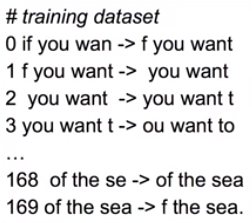

In [2]:
from IPython.display import Image
Image('D:/jupyter/idea.png')

## 1. Making dataset

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

# parameter setting
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10 # Any arbitrary number
batch_size = len(sentence)-sequence_length

x_data = []
y_data = []
for i in range(0, len(sentence)-sequence_length):
    x_str = sentence[i:i+sequence_length]
    y_str = sentence[i+1:i+sequence_length+1]
    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]
    
    x_data.append(x)
    y_data.append(y)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [5]:
x_data[:5]

[[15, 19, 2, 16, 10, 1, 2, 5, 0, 11],
 [19, 2, 16, 10, 1, 2, 5, 0, 11, 13],
 [2, 16, 10, 1, 2, 5, 0, 11, 13, 2],
 [16, 10, 1, 2, 5, 0, 11, 13, 2, 13],
 [10, 1, 2, 5, 0, 11, 13, 2, 13, 10]]

In [6]:
X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
x_one_hot = keras.utils.to_categorical(x_data, num_classes)
x_one_hot[0] 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [7]:
import numpy as np
a = np.array([[[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]])
print(a.shape)
print(a)
a = np.reshape(a, [-1, 3])
print(a.shape)
print(a)

(2, 3, 3)
[[[1 2 3]
  [1 2 3]
  [1 2 3]]

 [[1 2 3]
  [1 2 3]
  [1 2 3]]]
(6, 3)
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


## 2. Stacked RNN Model generation

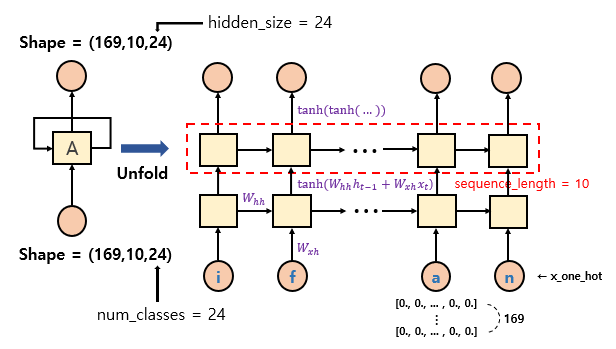

In [8]:
from IPython.display import Image
Image('D:/jupyter/stacked+sotfmax_RNN_fromTensorflow(2).png')

In [9]:
# cell generation
cell = tf.contrib.rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
cell = tf.contrib.rnn.MultiRNNCell([cell]*2, state_is_tuple=True)

# dynamic function generation
outputs, _states = tf.nn.dynamic_rnn(cell, x_one_hot, dtype=tf.float32)

W1017 15:08:49.152189  5444 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1017 15:08:49.154132  5444 deprecation.py:323] From <ipython-input-9-0df6c4ec3cf2>:2: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1017 15:08:49.156124  5444 deprecation.py:323] From <ipython-input-9-0df6c4ec3cf2>:3: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equ

## 3. Sotfmax Layer setting

sotfmax 층을 만들어주는 이유는 무엇일까?\
output에서 max값을 찾는 것보다 평균값을 찾는게 더 나은 성능을 보여서인가?

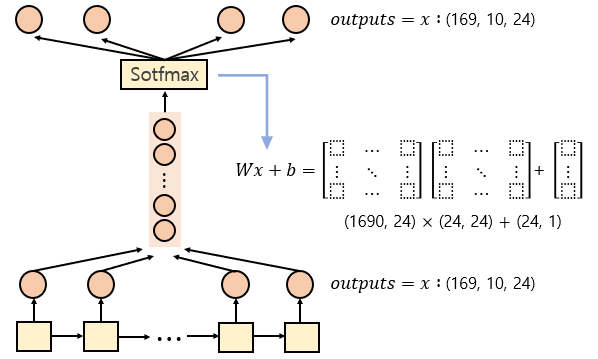

In [10]:
from IPython.display import Image
Image('D:/jupyter/stacked+sotfmax_RNN_fromTensorflow(3).png')

In [11]:
# Sotfmax Layer setting
x_for_softmax = tf.reshape(outputs, [-1, hidden_size])
softmax_w = tf.get_variable('sotfmax_w', [hidden_size, num_classes])
softmax_b = tf.get_variable('sotfmax_b', [num_classes])
outputs = tf.matmul(x_for_softmax, softmax_w) + softmax_b
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

## 4. Cost function setting

In [12]:
# Cost function setting
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=0.1).minimize(mean_loss)

## 5. Training and print results

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, loss, results = sess.run([train_op, mean_loss, outputs], feed_dict={X: x_data, Y: y_data})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        if j % 10 == 0:
            print(i, j, ''.join([char_set[t] for t in index]), loss)

0 0 oooooooooo 3.1830227
0 10 oooooooooo 3.1830227
0 20 oooooooooo 3.1830227
0 30 oooooooooo 3.1830227
0 40 oooooooooo 3.1830227
0 50 ooo,,,,,,, 3.1830227
0 60 oooooooooo 3.1830227
0 70 oooooooooo 3.1830227
0 80 oooooooooo 3.1830227
0 90 oooo,ooo,, 3.1830227
0 100 oooooooooo 3.1830227
0 110 oooooooooo 3.1830227
0 120 ooooo,,,,, 3.1830227
0 130 oo,ooooooo 3.1830227
0 140 ooooooooo, 3.1830227
0 150 oooooo,,,o 3.1830227
0 160 oooooooooo 3.1830227
1 0            2.9906983
1 10            2.9906983
1 20            2.9906983
1 30            2.9906983
1 40            2.9906983
1 50            2.9906983
1 60            2.9906983
1 70            2.9906983
1 80            2.9906983
1 90            2.9906983
1 100 o          2.9906983
1 110 o          2.9906983
1 120            2.9906983
1 130            2.9906983
1 140            2.9906983
1 150            2.9906983
1 160 o          2.9906983
2 0     tttttt 3.1945634
2 10     tttttt 3.1945634
2 20     tttttt 3.1945634
2 30       tttt 3.1945634
2

25 10   e tt  t  2.1940246
25 20  ssimmm do 2.1940246
25 30  tt t d  t 2.1940246
25 40  eeeeeee t 2.1940246
25 50   e ee tt  2.1940246
25 60  teeeer  t 2.1940246
25 70   n dsi do 2.1940246
25 80  tt tsiimm 2.1940246
25 90 tt e  t ts 2.1940246
25 100  nsii do s 2.1940246
25 110   dsi  tt  2.1940246
25 120 e tt e eet 2.1940246
25 130  e  t  te  2.1940246
25 140 ttto tt e  2.1940246
25 150  tt  tsiim 2.1940246
25 160   nsimmma  2.1940246
26 0  tto  tots 2.126414
26 10   e ett t  2.126414
26 20  st   o do 2.126414
26 30  tt t do t 2.126414
26 40  eeeeeeeet 2.126414
26 50   e eertte 2.126414
26 60  teeeer  t 2.126414
26 70   t dst to 2.126414
26 80  tt tssimm 2.126414
26 90 tt e  t ts 2.126414
26 100  nsst to t 2.126414
26 110   ds   tto 2.126414
26 120 e tthe eet 2.126414
26 130  e  to te  2.126414
26 140 ttto ttee  2.126414
26 150  tt  tsiim 2.126414
26 160   ssi  o   2.126414
27 0  dto  tons 2.0397105
27 10  te ttt t  2.0397105
27 20 tssi  o do 2.0397105
27 30  tt t n  t 2.0397105
27 40 

49 10  ao build  0.5083579
49 20 tnship, do 0.5083579
49 30 ndt arum u 0.5083579
49 40 m people t 0.5083579
49 50   ether to 0.5083579
49 60 nfollect w 0.5083579
49 70 ord and do 0.5083579
49 80 ndt assign 0.5083579
49 90 dthem tosk 0.5083579
49 100 s and dork 0.5083579
49 110 s dut rath 0.5083579
49 120 er toach t 0.5083579
49 130  er to lon 0.5083579
49 140 d tor the  0.5083579
49 150 tndless im 0.5083579
49 160   nsity of 0.5083579
50 0 p,yof want 0.48171234
50 10  ao build  0.48171234
50 20 tnship, do 0.48171234
50 30 ndt arum u 0.48171234
50 40 m people t 0.48171234
50 50   ether to 0.48171234
50 60 nfollect w 0.48171234
50 70 ord and do 0.48171234
50 80 ndt assign 0.48171234
50 90 dthem tosk 0.48171234
50 100 s and dork 0.48171234
50 110 s dut rath 0.48171234
50 120 er teach t 0.48171234
50 130  er to lon 0.48171234
50 140 d tor the  0.48171234
50 150 tndless im 0.48171234
50 160  ensity of 0.48171234
51 0 p,yof want 0.45690274
51 10  ao build  0.45690274
51 20 tnship, do 0.45690

73 20 tnship, do 0.2727123
73 30 n't arum u 0.2727123
73 40 i people t 0.2727123
73 50 h ether to 0.2727123
73 60 nlollect w 0.2727123
73 70 ord and do 0.2727123
73 80 n't assign 0.2727123
73 90 dthem task 0.2727123
73 100 , and work 0.2727123
73 110 , but rath 0.2727123
73 120 er toach t 0.2727123
73 130 hem ta lon 0.2727123
73 140 d for the  0.2727123
73 150 tndless im 0.2727123
73 160  ensity of 0.2727123
74 0 f you want 0.27018207
74 10 hwo build  0.27018207
74 20 tnship, do 0.27018207
74 30 n't arum u 0.27018207
74 40 i people t 0.27018207
74 50 h ether to 0.27018207
74 60 nlollect w 0.27018207
74 70 ord and do 0.27018207
74 80 n't assign 0.27018207
74 90 dthem task 0.27018207
74 100 , and work 0.27018207
74 110 , but rath 0.27018207
74 120 er toach t 0.27018207
74 130 her ta lon 0.27018207
74 140 d for the  0.27018207
74 150 tndless im 0.27018207
74 160  ensity of 0.27018207
75 0 f you want 0.2678437
75 10 hwo build  0.2678437
75 20 tnship, do 0.2678437
75 30 n't drum u 0.2678437

98 0 l you want 0.24455851
98 10 hao build  0.24455851
98 20 tnship, do 0.24455851
98 30  't drum u 0.24455851
98 40 m people t 0.24455851
98 50 h ether to 0.24455851
98 60  lollect w 0.24455851
98 70 ord and do 0.24455851
98 80  't dssign 0.24455851
98 90 dthem task 0.24455851
98 100 , and work 0.24455851
98 110 , but rath 0.24455851
98 120 em teach t 0.24455851
98 130 hem to lon 0.24455851
98 140 d for the  0.24455851
98 150 tndless im 0.24455851
98 160  ensity of 0.24455851
99 0 l you want 0.24387631
99 10 hdo build  0.24387631
99 20 tnship, do 0.24387631
99 30  't arum u 0.24387631
99 40 m people t 0.24387631
99 50 h ether to 0.24387631
99 60  lollect w 0.24387631
99 70 ord and do 0.24387631
99 80  't assign 0.24387631
99 90 dthem task 0.24387631
99 100 , and work 0.24387631
99 110 , but rath 0.24387631
99 120 em teach t 0.24387631
99 130 her to lon 0.24387631
99 140 d for the  0.24387631
99 150 tndless im 0.24387631
99 160  ensity of 0.24387631
100 0 l you want 0.24330086
100 10 h

120 110 s but rath 0.23706594
120 120 er teach t 0.23706594
120 130  er ta lon 0.23706594
120 140 d for the  0.23706594
120 150 tndless im 0.23706594
120 160  ensity of 0.23706594
121 0 l you want 0.23703396
121 10  ao build  0.23703396
121 20 tnship, do 0.23703396
121 30 n't drum u 0.23703396
121 40 m people t 0.23703396
121 50   ether to 0.23703396
121 60 nlollect w 0.23703396
121 70 ord and do 0.23703396
121 80 n't dssign 0.23703396
121 90 dthem task 0.23703396
121 100 s and work 0.23703396
121 110 s but rath 0.23703396
121 120 er toach t 0.23703396
121 130  em to lon 0.23703396
121 140 d for the  0.23703396
121 150 tndless im 0.23703396
121 160  ensity of 0.23703396
122 0 p you want 0.23701248
122 10  wo build  0.23701248
122 20 tnship, do 0.23701248
122 30 n't drum u 0.23701248
122 40 m people t 0.23701248
122 50   ether to 0.23701248
122 60 nlollect w 0.23701248
122 70 ord and do 0.23701248
122 80 n't dssign 0.23701248
122 90 dthem task 0.23701248
122 100 , and work 0.23701248
12

137 60 nbollect w 0.23463033
137 70 ord and do 0.23463033
137 80 n't assign 0.23463033
137 90 dthem task 0.23463033
137 100 s and work 0.23463033
137 110 s but rath 0.23463033
137 120 er toach t 0.23463033
137 130  er to lon 0.23463033
137 140 d for the  0.23463033
137 150 tndless im 0.23463033
137 160  ensity of 0.23463033
138 0 l you want 0.2345454
138 10  wo build  0.2345454
138 20 tnship, do 0.2345454
138 30 n't drum u 0.2345454
138 40 i people t 0.2345454
138 50   ether to 0.2345454
138 60 nlollect w 0.2345454
138 70 ord and do 0.2345454
138 80 n't dssign 0.2345454
138 90 dthem task 0.2345454
138 100 s and work 0.2345454
138 110 s but rath 0.2345454
138 120 em teach t 0.2345454
138 130  er ta lon 0.2345454
138 140 d for the  0.2345454
138 150 tndless im 0.2345454
138 160  ensity of 0.2345454
139 0 l you want 0.2344178
139 10  ro build  0.2344178
139 20 tnship, do 0.2344178
139 30 n't arum u 0.2344178
139 40 i people t 0.2344178
139 50   ether to 0.2344178
139 60 nlollect w 0.23441

161 10  ao build  0.23251587
161 20 tnship, do 0.23251587
161 30 n't arum u 0.23251587
161 40 m people t 0.23251587
161 50   ether to 0.23251587
161 60 nlollect w 0.23251587
161 70 ord and do 0.23251587
161 80 n't assign 0.23251587
161 90 dthem task 0.23251587
161 100 s and work 0.23251587
161 110 s but rath 0.23251587
161 120 er teach t 0.23251587
161 130  er ta lon 0.23251587
161 140 d for the  0.23251587
161 150 tndless im 0.23251587
161 160  ensity of 0.23251587
162 0 l you want 0.2325244
162 10 hdo build  0.2325244
162 20 tnship, do 0.2325244
162 30 n't drum u 0.2325244
162 40   people t 0.2325244
162 50 h ether to 0.2325244
162 60 nlollect w 0.2325244
162 70 ord and do 0.2325244
162 80 n't dssign 0.2325244
162 90 dthem task 0.2325244
162 100 , and work 0.2325244
162 110 , but rath 0.2325244
162 120 em teach t 0.2325244
162 130 hem ta lon 0.2325244
162 140 d for the  0.2325244
162 150 tndless im 0.2325244
162 160  ensity of 0.2325244
163 0 l you want 0.23247916
163 10  do build  0

177 100 , and work 0.23172528
177 110 , but rath 0.23172528
177 120 em toach t 0.23172528
177 130 hem to lon 0.23172528
177 140 d for the  0.23172528
177 150 tndless im 0.23172528
177 160  ensity of 0.23172528
178 0 l you want 0.23162682
178 10  wo build  0.23162682
178 20 tnship, do 0.23162682
178 30 n't drum u 0.23162682
178 40 m people t 0.23162682
178 50   ether to 0.23162682
178 60 nlollect w 0.23162682
178 70 ord and do 0.23162682
178 80 n't dssign 0.23162682
178 90 dthem task 0.23162682
178 100 , and work 0.23162682
178 110 , but rath 0.23162682
178 120 em teach t 0.23162682
178 130  em ta lon 0.23162682
178 140 d for the  0.23162682
178 150 tndless im 0.23162682
178 160  ensity of 0.23162682
179 0 l you want 0.23153757
179 10  ao build  0.23153757
179 20 tnship, do 0.23153757
179 30 n't arum u 0.23153757
179 40 m people t 0.23153757
179 50   ether to 0.23153757
179 60 nbollect w 0.23153757
179 70 ord and do 0.23153757
179 80 n't assign 0.23153757
179 90 dthem task 0.23153757
17

194 50   ether to 0.23125309
194 60 ncollect w 0.23125309
194 70 ord and do 0.23125309
194 80 n't dssign 0.23125309
194 90 dthem task 0.23125309
194 100 , and work 0.23125309
194 110 , but rath 0.23125309
194 120 em teach t 0.23125309
194 130  er to lon 0.23125309
194 140 d for the  0.23125309
194 150 tndless im 0.23125309
194 160  ensity of 0.23125309
195 0 p you want 0.2312353
195 10 hdo build  0.2312353
195 20 tnship, do 0.2312353
195 30  't drum u 0.2312353
195 40 m people t 0.2312353
195 50 h ether to 0.2312353
195 60  bollect w 0.2312353
195 70 ord and do 0.2312353
195 80  't dssign 0.2312353
195 90 dthem task 0.2312353
195 100 , and work 0.2312353
195 110 , but rath 0.2312353
195 120 em toach t 0.2312353
195 130 hem to lon 0.2312353
195 140 d for the  0.2312353
195 150 tndless im 0.2312353
195 160  ensity of 0.2312353
196 0 l you want 0.23146282
196 10 hro build  0.23146282
196 20 tnship, do 0.23146282
196 30  't drum u 0.23146282
196 40 p people t 0.23146282
196 50 h ether to 0

211 40 m people t 0.23056173
211 50 h ether to 0.23056173
211 60 ncollect w 0.23056173
211 70 ood and do 0.23056173
211 80 n't dssign 0.23056173
211 90 dthem task 0.23056173
211 100 s and work 0.23056173
211 110 s but rath 0.23056173
211 120 em teach t 0.23056173
211 130 hem to lon 0.23056173
211 140 d for the  0.23056173
211 150 tndless im 0.23056173
211 160  ensity of 0.23056173
212 0 f you want 0.23048523
212 10 hdo build  0.23048523
212 20 tnship, do 0.23048523
212 30 n't arum u 0.23048523
212 40 m people t 0.23048523
212 50 h ether to 0.23048523
212 60 nbollect w 0.23048523
212 70 ood and do 0.23048523
212 80 n't assign 0.23048523
212 90 dthem task 0.23048523
212 100 s and work 0.23048523
212 110 s but rath 0.23048523
212 120 er toach t 0.23048523
212 130 her to lon 0.23048523
212 140 d for the  0.23048523
212 150 tndless im 0.23048523
212 160  ensity of 0.23048523
213 0 l you want 0.23046528
213 10  ao build  0.23046528
213 20 tnship, do 0.23046528
213 30  't arum u 0.23046528
21

229 0 p you want 0.23038834
229 10 hao build  0.23038834
229 20 tnship, do 0.23038834
229 30 n't arum u 0.23038834
229 40 m people t 0.23038834
229 50 h ether to 0.23038834
229 60 nbollect w 0.23038834
229 70 ood and do 0.23038834
229 80 n't assign 0.23038834
229 90 dthem task 0.23038834
229 100 s and work 0.23038834
229 110 s but rath 0.23038834
229 120 er toach t 0.23038834
229 130 hem to lon 0.23038834
229 140 d for the  0.23038834
229 150 tndless im 0.23038834
229 160  ensity of 0.23038834
230 0 p you want 0.23031338
230 10 hdo build  0.23031338
230 20 tnship, do 0.23031338
230 30 n't drum u 0.23031338
230 40 m people t 0.23031338
230 50 h ether to 0.23031338
230 60 nbollect w 0.23031338
230 70 ord and do 0.23031338
230 80 n't dssign 0.23031338
230 90 dthem task 0.23031338
230 100 s and work 0.23031338
230 110 s but rath 0.23031338
230 120 er toach t 0.23031338
230 130 hem to lon 0.23031338
230 140 d for the  0.23031338
230 150 tndless im 0.23031338
230 160  ensity of 0.23031338
23

246 10  ao build  0.22987394
246 20 tnship, do 0.22987394
246 30 n't arum u 0.22987394
246 40 m people t 0.22987394
246 50   ether to 0.22987394
246 60 nbollect w 0.22987394
246 70 ord and do 0.22987394
246 80 n't assign 0.22987394
246 90 dthem task 0.22987394
246 100 , and work 0.22987394
246 110 , but rath 0.22987394
246 120 er toach t 0.22987394
246 130  em to lon 0.22987394
246 140 d for the  0.22987394
246 150 tndless im 0.22987394
246 160  ensity of 0.22987394
247 0 p you want 0.22991006
247 10 hto build  0.22991006
247 20 tnship, do 0.22991006
247 30 n't drum u 0.22991006
247 40 p people t 0.22991006
247 50 h ether to 0.22991006
247 60 nbollect w 0.22991006
247 70 ord and do 0.22991006
247 80 n't dssign 0.22991006
247 90 dthem task 0.22991006
247 100 , and work 0.22991006
247 110 , but rath 0.22991006
247 120 em teach t 0.22991006
247 130 hem ta lon 0.22991006
247 140 d for the  0.22991006
247 150 tndless im 0.22991006
247 160  ensity of 0.22991006
248 0 f you want 0.2298588
248

270 0 p you want 0.22970273
270 10 hdo build  0.22970273
270 20 tnship, do 0.22970273
270 30 n't drum u 0.22970273
270 40 m people t 0.22970273
270 50 h ether to 0.22970273
270 60 nbollect w 0.22970273
270 70 ood and do 0.22970273
270 80 n't dssign 0.22970273
270 90 dthem task 0.22970273
270 100 , and work 0.22970273
270 110 , but rath 0.22970273
270 120 er toach t 0.22970273
270 130 hem to lon 0.22970273
270 140 d for the  0.22970273
270 150 tndless im 0.22970273
270 160  ensity of 0.22970273
271 0 p you want 0.22973542
271 10  to build  0.22973542
271 20 tnship, do 0.22973542
271 30 n't arum u 0.22973542
271 40   people t 0.22973542
271 50   ether to 0.22973542
271 60 nlollect w 0.22973542
271 70 ord and do 0.22973542
271 80 n't assign 0.22973542
271 90 dthem task 0.22973542
271 100 , and work 0.22973542
271 110 , but rath 0.22973542
271 120 em teach t 0.22973542
271 130  em ta lon 0.22973542
271 140 d for the  0.22973542
271 150 tndless im 0.22973542
271 160  ensity of 0.22973542
27

294 20 tnship, do 0.22953086
294 30 n't arum u 0.22953086
294 40 m people t 0.22953086
294 50   ether to 0.22953086
294 60 nbollect w 0.22953086
294 70 ood and do 0.22953086
294 80 n't assign 0.22953086
294 90 dthem task 0.22953086
294 100 s and work 0.22953086
294 110 s but rath 0.22953086
294 120 er toach t 0.22953086
294 130  em to lon 0.22953086
294 140 d for the  0.22953086
294 150 tndless im 0.22953086
294 160  ensity of 0.22953086
295 0 p you want 0.22924444
295 10 hwo build  0.22924444
295 20 tnship, do 0.22924444
295 30 n't drum u 0.22924444
295 40   people t 0.22924444
295 50 h ether to 0.22924444
295 60 nlollect w 0.22924444
295 70 ord and do 0.22924444
295 80 n't dssign 0.22924444
295 90 dthem task 0.22924444
295 100 s and work 0.22924444
295 110 s but rath 0.22924444
295 120 em teach t 0.22924444
295 130 hem ta lon 0.22924444
295 140 d for the  0.22924444
295 150 tndless im 0.22924444
295 160  ensity of 0.22924444
296 0 g you want 0.22919837
296 10  do build  0.22919837
29

318 0 p you want 0.22920386
318 10 hdo build  0.22920386
318 20 tnship, do 0.22920386
318 30 n't arum u 0.22920386
318 40 i people t 0.22920386
318 50 h ether to 0.22920386
318 60 ncollect w 0.22920386
318 70 ood and do 0.22920386
318 80 n't assign 0.22920386
318 90 dthem task 0.22920386
318 100 s and work 0.22920386
318 110 s but rath 0.22920386
318 120 em toach t 0.22920386
318 130 her to lon 0.22920386
318 140 d for the  0.22920386
318 150 tndless im 0.22920386
318 160  ensity of 0.22920386
319 0 f you want 0.22916912
319 10  to build  0.22916912
319 20 tnship, do 0.22916912
319 30 n't arum u 0.22916912
319 40 p people t 0.22916912
319 50   ether to 0.22916912
319 60 nlollect w 0.22916912
319 70 ord and do 0.22916912
319 80 n't assign 0.22916912
319 90 dthem task 0.22916912
319 100 , and work 0.22916912
319 110 , but rath 0.22916912
319 120 er teach t 0.22916912
319 130  em ta lon 0.22916912
319 140 d for the  0.22916912
319 150 tndless im 0.22916912
319 160  ensity of 0.22916912
32

335 10  do build  0.22889425
335 20 tnship, do 0.22889425
335 30 n't arum u 0.22889425
335 40 m people t 0.22889425
335 50   ether to 0.22889425
335 60 ncollect w 0.22889425
335 70 ord and do 0.22889425
335 80 n't assign 0.22889425
335 90 dthem task 0.22889425
335 100 s and work 0.22889425
335 110 s but rath 0.22889425
335 120 er teach t 0.22889425
335 130  er ta lon 0.22889425
335 140 d for the  0.22889425
335 150 tndless im 0.22889425
335 160  ensity of 0.22889425
336 0 l you want 0.22890116
336 10  to build  0.22890116
336 20 tnship, do 0.22890116
336 30 n't drum u 0.22890116
336 40 m people t 0.22890116
336 50   ether to 0.22890116
336 60 ncollect w 0.22890116
336 70 ood and do 0.22890116
336 80 n't dssign 0.22890116
336 90 dthem task 0.22890116
336 100 s and work 0.22890116
336 110 s but rath 0.22890116
336 120 em teach t 0.22890116
336 130  em to lon 0.22890116
336 140 d for the  0.22890116
336 150 tndless im 0.22890116
336 160  ensity of 0.22890116
337 0 m you want 0.22891219
33

353 10 hdo build  0.22885382
353 20 tnship, do 0.22885382
353 30 n't arum u 0.22885382
353 40 m people t 0.22885382
353 50 h ether to 0.22885382
353 60 nbollect w 0.22885382
353 70 ood and do 0.22885382
353 80 n't assign 0.22885382
353 90 dthem task 0.22885382
353 100 s and work 0.22885382
353 110 s but rath 0.22885382
353 120 er toach t 0.22885382
353 130 her to lon 0.22885382
353 140 d for the  0.22885382
353 150 tndless im 0.22885382
353 160  ensity of 0.22885382
354 0 p you want 0.2289059
354 10  to build  0.2289059
354 20 tnship, do 0.2289059
354 30 n't arum u 0.2289059
354 40 p people t 0.2289059
354 50   ether to 0.2289059
354 60 nlollect w 0.2289059
354 70 ord and do 0.2289059
354 80 n't assign 0.2289059
354 90 dthem task 0.2289059
354 100 , and work 0.2289059
354 110 , but rath 0.2289059
354 120 em teach t 0.2289059
354 130  em ta lon 0.2289059
354 140 d for the  0.2289059
354 150 tndless im 0.2289059
354 160  ensity of 0.2289059
355 0 g you want 0.22902746
355 10 hdo build  0

377 20 tnship, do 0.22880083
377 30  't drum u 0.22880083
377 40 i people t 0.22880083
377 50 h ether to 0.22880083
377 60  lollect w 0.22880083
377 70 ord and do 0.22880083
377 80  't dssign 0.22880083
377 90 dthem task 0.22880083
377 100 , and work 0.22880083
377 110 , but rath 0.22880083
377 120 em teach t 0.22880083
377 130 her ta lon 0.22880083
377 140 d for the  0.22880083
377 150 tndless im 0.22880083
377 160  ensity of 0.22880083
378 0 f you want 0.22887763
378 10  ao build  0.22887763
378 20 tnship, do 0.22887763
378 30 n't drum u 0.22887763
378 40   people t 0.22887763
378 50   ether to 0.22887763
378 60 ncollect w 0.22887763
378 70 ood and do 0.22887763
378 80 n't dssign 0.22887763
378 90 dthem task 0.22887763
378 100 s and work 0.22887763
378 110 s but rath 0.22887763
378 120 em toach t 0.22887763
378 130  em to lon 0.22887763
378 140 d for the  0.22887763
378 150 tndless im 0.22887763
378 160  ensity of 0.22887763
379 0 p you want 0.22878051
379 10 hdo build  0.22878051
37

400 20 tnship, do 0.22856593
400 30 n't drum u 0.22856593
400 40 i people t 0.22856593
400 50   ether to 0.22856593
400 60 nlollect w 0.22856593
400 70 ood and do 0.22856593
400 80 n't dssign 0.22856593
400 90 dthem task 0.22856593
400 100 s and work 0.22856593
400 110 s but rath 0.22856593
400 120 er teach t 0.22856593
400 130  er to lon 0.22856593
400 140 d for the  0.22856593
400 150 tndless im 0.22856593
400 160  ensity of 0.22856593
401 0 l you want 0.22856548
401 10  do build  0.22856548
401 20 tnship, do 0.22856548
401 30 n't drum u 0.22856548
401 40 m people t 0.22856548
401 50   ether to 0.22856548
401 60 ncollect w 0.22856548
401 70 ood and do 0.22856548
401 80 n't dssign 0.22856548
401 90 dthem task 0.22856548
401 100 s and work 0.22856548
401 110 s but rath 0.22856548
401 120 er toach t 0.22856548
401 130  er ta lon 0.22856548
401 140 d for the  0.22856548
401 150 tndless im 0.22856548
401 160  ensity of 0.22856548
402 0 g you want 0.22856447
402 10 hto build  0.22856447
40

425 30 n't arum u 0.22864577
425 40 m people t 0.22864577
425 50 h ether to 0.22864577
425 60 nbollect w 0.22864577
425 70 ood and do 0.22864577
425 80 n't assign 0.22864577
425 90 dthem task 0.22864577
425 100 s and work 0.22864577
425 110 s but rath 0.22864577
425 120 em toach t 0.22864577
425 130 her to lon 0.22864577
425 140 d for the  0.22864577
425 150 tndless im 0.22864577
425 160  ensity of 0.22864577
426 0 l you want 0.22862501
426 10  to build  0.22862501
426 20 tnship, do 0.22862501
426 30  't drum u 0.22862501
426 40 p people t 0.22862501
426 50   ether to 0.22862501
426 60  lollect w 0.22862501
426 70 ord and do 0.22862501
426 80  't dssign 0.22862501
426 90 dthem task 0.22862501
426 100 , and work 0.22862501
426 110 , but rath 0.22862501
426 120 er teach t 0.22862501
426 130  er ta lon 0.22862501
426 140 d for the  0.22862501
426 150 tndless im 0.22862501
426 160  ensity of 0.22862501
427 0 m you want 0.228536
427 10 hdo build  0.228536
427 20 tnship, do 0.228536
427 30 n

449 60 nlollect w 0.22888705
449 70 ood and do 0.22888705
449 80 n't assign 0.22888705
449 90 dthem task 0.22888705
449 100 , and work 0.22888705
449 110 , but rath 0.22888705
449 120 em toach t 0.22888705
449 130 oem to lon 0.22888705
449 140 d for the  0.22888705
449 150 tndless im 0.22888705
449 160  ensity of 0.22888705
450 0 p you want 0.22906578
450 10 hdo build  0.22906578
450 20 tnship, do 0.22906578
450 30  't drum u 0.22906578
450 40   people t 0.22906578
450 50 h ether to 0.22906578
450 60  collect w 0.22906578
450 70 ord and do 0.22906578
450 80  't dssign 0.22906578
450 90 dthem task 0.22906578
450 100 s and work 0.22906578
450 110 s but rath 0.22906578
450 120 er teach t 0.22906578
450 130 her to lon 0.22906578
450 140 d for the  0.22906578
450 150 tndless im 0.22906578
450 160  ensity of 0.22906578
451 0 g you want 0.22925402
451 10 oto build  0.22925402
451 20 tnship, do 0.22925402
451 30 n't arum u 0.22925402
451 40 m people t 0.22925402
451 50 o ether to 0.22925402
45

466 90 dthem task 0.2285589
466 100 , and work 0.2285589
466 110 , but rath 0.2285589
466 120 er toach t 0.2285589
466 130  er ta lon 0.2285589
466 140 d for the  0.2285589
466 150 tndless im 0.2285589
466 160  ensity of 0.2285589
467 0 m you want 0.22858252
467 10  ao build  0.22858252
467 20 tnship, do 0.22858252
467 30  't arum u 0.22858252
467 40 m people t 0.22858252
467 50   ether to 0.22858252
467 60  collect w 0.22858252
467 70 ood and do 0.22858252
467 80  't assign 0.22858252
467 90 dthem task 0.22858252
467 100 s and work 0.22858252
467 110 s but rath 0.22858252
467 120 em toach t 0.22858252
467 130  em ta lon 0.22858252
467 140 d for the  0.22858252
467 150 tndless im 0.22858252
467 160  ensity of 0.22858252
468 0 g you want 0.22850429
468 10 hto build  0.22850429
468 20 tnship, do 0.22850429
468 30  't drum u 0.22850429
468 40 m people t 0.22850429
468 50 h ether to 0.22850429
468 60  lollect w 0.22850429
468 70 ord and do 0.22850429
468 80  't dssign 0.22850429
468 90 dth

491 100 , and work 0.22830193
491 110 , but rath 0.22830193
491 120 er toach t 0.22830193
491 130 her ta lon 0.22830193
491 140 d for the  0.22830193
491 150 tndless im 0.22830193
491 160  ensity of 0.22830193
492 0 p you want 0.22830188
492 10  ao build  0.22830188
492 20 tnship, do 0.22830188
492 30 n't drum u 0.22830188
492 40 m people t 0.22830188
492 50   ether to 0.22830188
492 60 ncollect w 0.22830188
492 70 ood and do 0.22830188
492 80 n't dssign 0.22830188
492 90 dthem task 0.22830188
492 100 s and work 0.22830188
492 110 s but rath 0.22830188
492 120 er teach t 0.22830188
492 130  em to lon 0.22830188
492 140 d for the  0.22830188
492 150 tndless im 0.22830188
492 160  ensity of 0.22830188
493 0 g you want 0.2282969
493 10 hwo build  0.2282969
493 20 tnship, do 0.2282969
493 30  't drum u 0.2282969
493 40   people t 0.2282969
493 50 h ether to 0.2282969
493 60  collect w 0.2282969
493 70 ord and do 0.2282969
493 80  't dssign 0.2282969
493 90 dthem task 0.2282969
493 100 s an

In [29]:
results.shape

(169, 10, 24)

In [33]:
results = sess.run(outputs, feed_dict={X:x_data})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0: 
        print(''.join([char_set[t] for t in index]), end='')
    else: 
        print(char_set[index[-1]], end='')
        # 뒤에 단어를 계속 붙이는 중

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea

### 훨씬 예측이 좋아졌다!